In [1]:

import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from src import utility as utils

In [4]:
file_names = [x for x in os.listdir() if ".xlsb" in x]
data_dict = {
    "2016": "CMI TA DB 2016 Datasheet v02 2024-06-17.xlsb",
    "2017": "CMI TA DB 2017 Datasheet v02 2024-06-17.xlsb",
    "2018": "CMI TA DB 2018 Datasheet v01 2022-05-20.xlsb",
    "2019": "CMI TA DB 2019 Datasheet v01 2022-05-20.xlsb",
    "2020": "CMI TA DB 2020 Datasheet v01 2022-05-20.xlsb",
}

In [5]:
df = utils.compile_data(
    data_dict,
    r"C:\Users\u013709\IFoA\Secure File Exchange 2024-08-28 20-00-20\CMI WP162 TA DB 2016-2020 datasheets",
)

2535449


In [6]:
df.columns

Index(['ProductCategory', 'Gender', 'SmokerStatus', 'DistributionChannel',
       'CommencementYear', 'JointLifeStatus', 'SumAssuredBand', 'Age',
       'Duration', 'LivesExposure', 'AmountsExposure', 'IncurredClaims',
       'AmountIncurred', 'ExpectedClaims', 'ExpectedAmountClaims',
       'ComparatorTable', 'CalendarYear', 'unique_id', 'holdout',
       'random_fold'],
      dtype='object')

In [7]:
combined_df = df.drop(["ComparatorTable", "unique_id"], axis=1)  # "CalendarYear",

In [8]:
combined_df["LivesExposure"] = combined_df["LivesExposure"].replace(0, 0.5)

In [9]:
combined_df["Actual_deaths"] = (
    combined_df["AmountIncurred"] / combined_df["AmountsExposure"]
)
combined_df["Actual_deaths_lives"] = (
    combined_df["IncurredClaims"] / combined_df["LivesExposure"]
)
combined_df["Expected_deaths"] = (
    combined_df["ExpectedAmountClaims"] / combined_df["AmountsExposure"]
)
combined_df["Expected_deaths_lives"] = (
    combined_df["ExpectedClaims"] / combined_df["LivesExposure"]
)

In [10]:
combined_df = combined_df[
    combined_df["LivesExposure"] != 0
]  # may be has claims can set 1/365
# combined_df.drop("ComparatorTable", axis=1, inplace=True)

In [11]:
combined_df["CommencementYear"].unique()

array(['2001', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '1999 or earlier', '2000', '2002', '2017', '2018', '2019', '2020'],
      dtype=object)

In [12]:
def CommencementYear_change(CommencementYear):
    if CommencementYear == "1999 or earlier":
        new_cy = 1
    else:
        new_cy = max(int(CommencementYear) - 1999 + 1, 0)
    return new_cy

In [13]:
def CalYear_change(CalendarYear):
    if CalendarYear == "1999 or earlier":
        new_cy = 1
    else:
        new_cy = max(int(CalendarYear) - 2016 + 1, 0)
    return new_cy

In [14]:
combined_df["CommencementYear"] = combined_df["CommencementYear"].apply(
    CommencementYear_change
)

In [15]:
combined_df["CalendarYear"] = combined_df["CalendarYear"].apply(CalYear_change)

In [16]:
def Duration_change(Duration):
    if Duration == "10+":
        dur = 10
    else:
        dur = max(int(Duration), 0)
    return dur

In [17]:
combined_df["Duration"] = combined_df["Duration"].apply(Duration_change)

In [18]:
grouped_df = combined_df.groupby(
    [
        "ProductCategory",
        "Gender",
        "SmokerStatus",
        "DistributionChannel",
        "CommencementYear",
        "JointLifeStatus",
        "SumAssuredBand",
        "Age",
        "Duration",
    ]
).mean()
grouped_df = grouped_df.reset_index()

In [19]:
# combined_df=grouped_df
combined_df.drop(
    [
        "AmountsExposure",  #'IncurredClaims',
        "AmountIncurred",
        "ExpectedClaims",
        "ExpectedAmountClaims",  # 'ComparatorTable'
    ],
    axis=1,
    inplace=True,
)

In [20]:
combined_df = combined_df[combined_df["Actual_deaths_lives"] <= 1]

In [21]:
data = (
    combined_df.copy()
    .drop(
        [
            "Expected_deaths",
            "Actual_deaths",
            "Expected_deaths_lives",
        ],  # "LivesExposure"],
        axis=1,
    )
    .copy()
)

In [22]:
import math

combined_df[combined_df["Actual_deaths"] == math.inf]

,ProductCategory,Gender,SmokerStatus,DistributionChannel,CommencementYear,JointLifeStatus,SumAssuredBand,Age,Duration,LivesExposure,IncurredClaims,CalendarYear,holdout,random_fold,Actual_deaths,Actual_deaths_lives,Expected_deaths,Expected_deaths_lives


C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\325426435.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\325426435.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\325426435.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\325426435.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), r

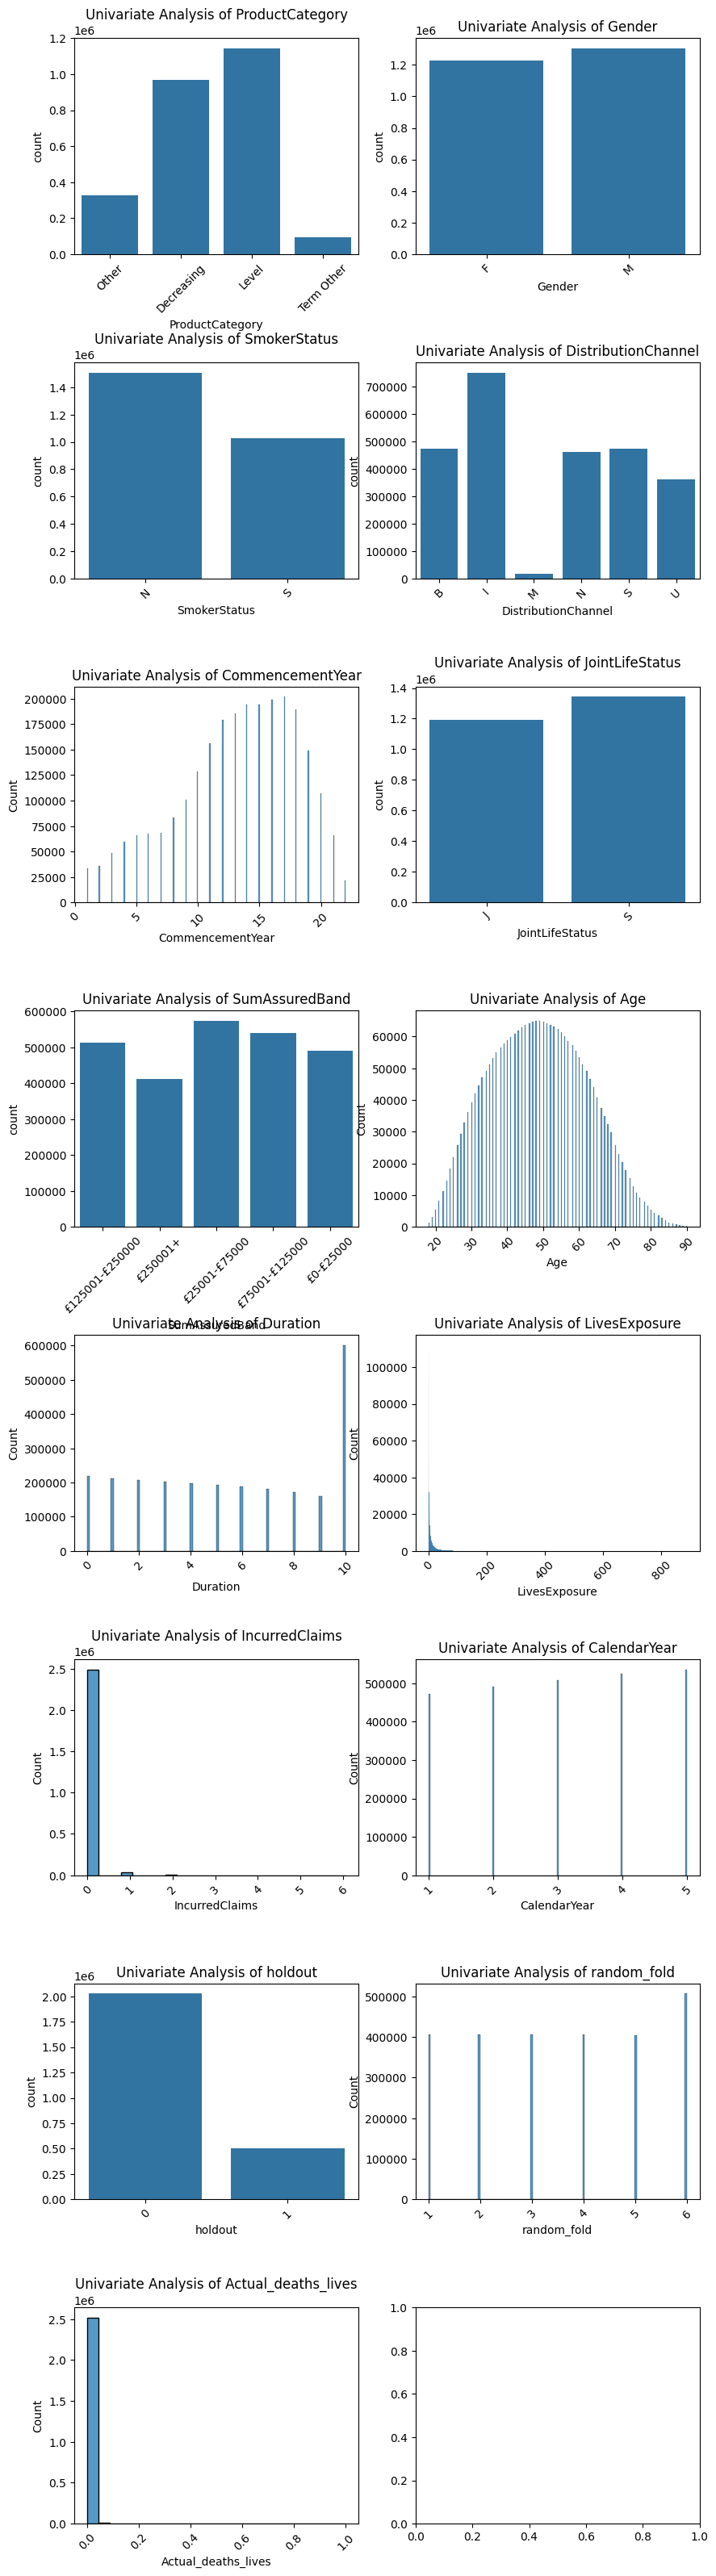

In [23]:
# Univariate plots

no_col = len(data.columns)
fig, axes = plt.subplots(nrows=(no_col // 2 + 1), ncols=2, figsize=(10, 40))
for i, column in enumerate(data.columns):
    if len(data[column].unique()) > 3 and pd.api.types.is_numeric_dtype(data[column]):
        ax = sns.histplot(data[column], ax=axes[i // 2, i % 2])
    else:
        ax = sns.countplot(x=column, data=data, ax=axes[i // 2, i % 2])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    axes[i // 2, i % 2].set_title(f"Univariate Analysis of {column}")
    plt.subplots_adjust(hspace=0.5)

plt.show()

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\2728725147.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: weighted_mean(x, Target, "LivesExposure"))
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\2728725147.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


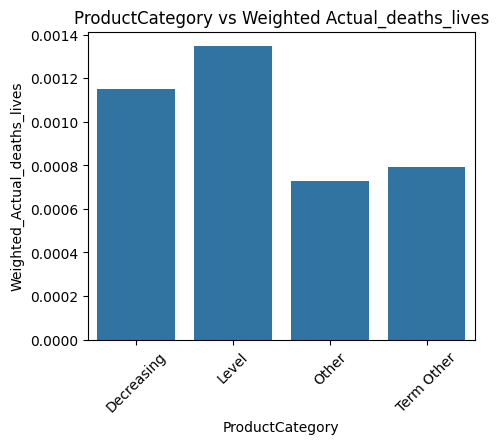

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\2728725147.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: weighted_mean(x, Target, "LivesExposure"))
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\2728725147.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


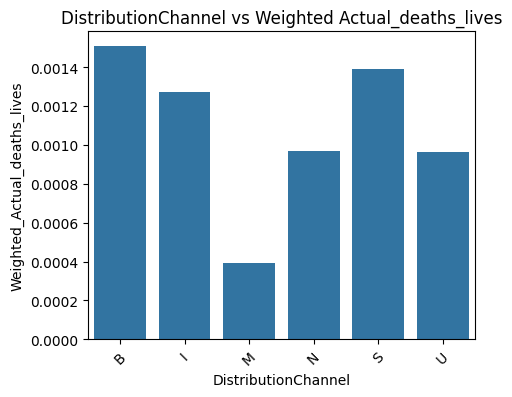

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\2728725147.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: weighted_mean(x, Target, "LivesExposure"))
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\2728725147.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


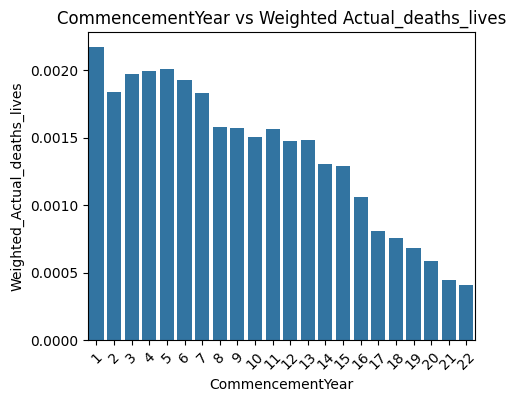

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\2728725147.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: weighted_mean(x, Target, "LivesExposure"))
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\2728725147.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


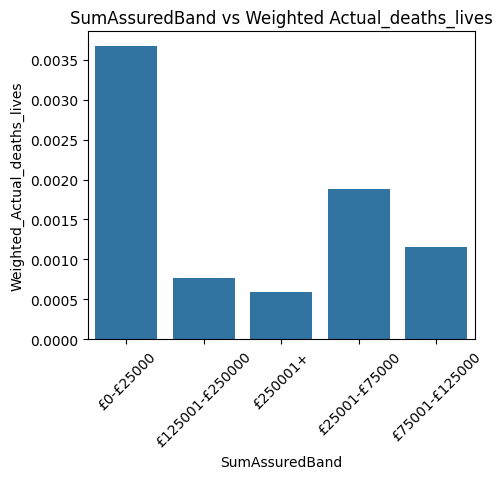

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\2728725147.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: weighted_mean(x, Target, "LivesExposure"))
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\2728725147.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


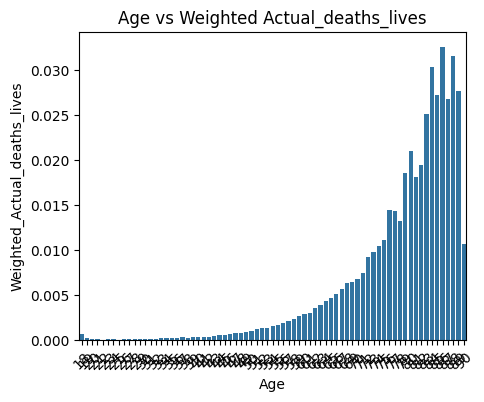

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\2728725147.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: weighted_mean(x, Target, "LivesExposure"))
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\2728725147.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


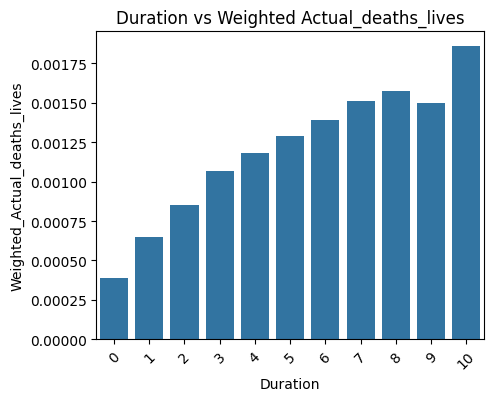

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\2728725147.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: weighted_mean(x, Target, "LivesExposure"))
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\2728725147.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


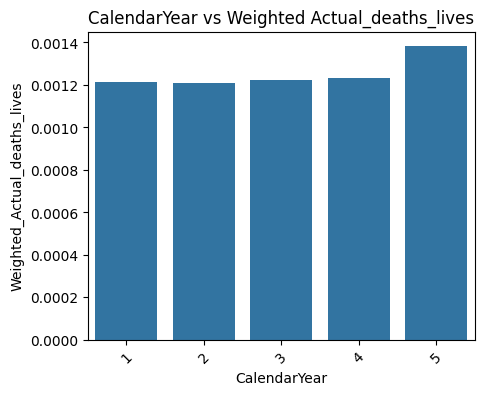

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\2728725147.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: weighted_mean(x, Target, "LivesExposure"))
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\2728725147.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


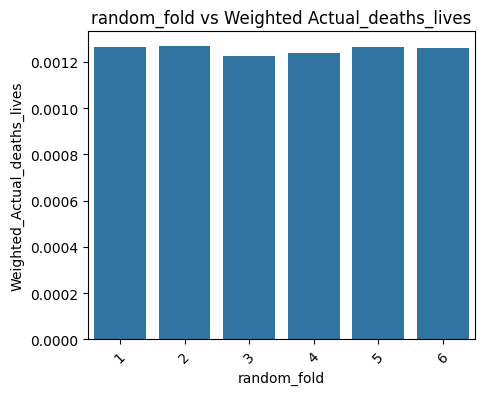

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\2728725147.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: weighted_mean(x, Target, "LivesExposure"))


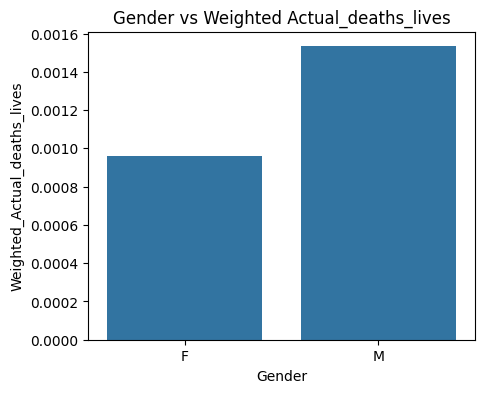

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\2728725147.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: weighted_mean(x, Target, "LivesExposure"))


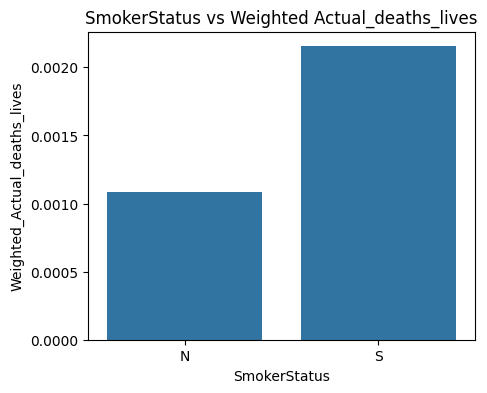

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\2728725147.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: weighted_mean(x, Target, "LivesExposure"))


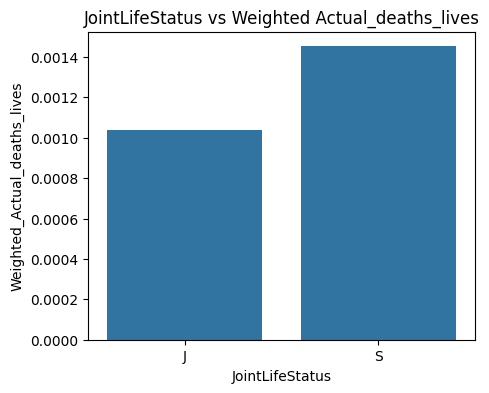

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\2728725147.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: weighted_mean(x, Target, "LivesExposure"))


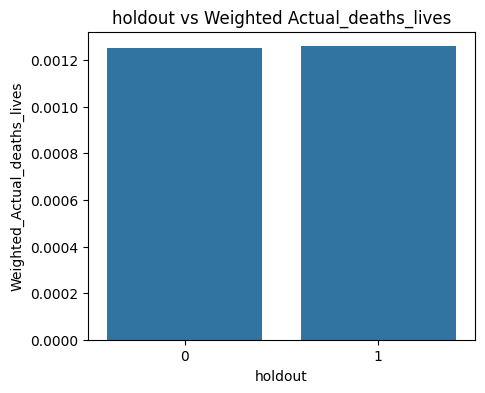

In [24]:
no_col = len(data.columns)
continuous_vars = []
categorical_vars = []
Target = "Actual_deaths_lives"
# data = data[data["Actual_deaths_lives"] <= 1]

for i, column in enumerate(data.drop([Target, "IncurredClaims"], axis=1).columns):
    if column == "LivesExposure":
        pass
    else:

        if len(data[column].unique()) > 3:
            continuous_vars.append(column)
        else:
            categorical_vars.append(column)


# Function to calculate weighted mean
def weighted_mean(df, value, weight):
    return (df[value] * df[weight]).sum() / df[weight].sum()


# Scatter plots for continuous variables vs target
for var in continuous_vars:
    plt.figure(figsize=(5, 4))
    weighted_data = (
        data[[var, Target, "LivesExposure"]]
        .groupby(var)
        .apply(lambda x: weighted_mean(x, Target, "LivesExposure"))
        .reset_index(name=f"Weighted_{Target}")
    )
    ax = sns.barplot(x=var, y=f"Weighted_{Target}", data=weighted_data)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.title(f"{var} vs Weighted {Target}")
    plt.show()

# Bar plots for categorical variables vs target
for var in categorical_vars:
    plt.figure(figsize=(5, 4))
    weighted_data = (
        data[[var, Target, "LivesExposure"]]
        .groupby(var)
        .apply(lambda x: weighted_mean(x, Target, "LivesExposure"))
        .reset_index(name=f"Weighted_{Target}")
    )
    ax = sns.barplot(x=var, y=f"Weighted_{Target}", data=weighted_data)
    plt.title(f"{var} vs Weighted {Target}")
    plt.show()

plt.show()

In [25]:
df_filtered = combined_df.drop(columns=["random_fold", "holdout"])

combined_df_encoded = pd.get_dummies(df_filtered, drop_first=True)

# Add the dropped columns back
combined_df_encoded["random_fold"] = combined_df["random_fold"]
combined_df_encoded["holdout"] = combined_df["holdout"]

In [26]:
combined_df_encoded = combined_df_encoded.apply(
    lambda x: x.astype(int) if x.dtypes == "bool" else x
)
combined_df_encoded.drop(
    ["Actual_deaths", "Expected_deaths", "Expected_deaths_lives"], axis=1, inplace=True
)

In [27]:
combined_df_encoded.dtypes

CommencementYear                    int64
Age                                 int64
Duration                            int64
LivesExposure                     float64
IncurredClaims                    float64
CalendarYear                        int64
Actual_deaths_lives               float64
ProductCategory_Level               int64
ProductCategory_Other               int64
ProductCategory_Term Other          int64
Gender_M                            int64
SmokerStatus_S                      int64
DistributionChannel_I               int64
DistributionChannel_M               int64
DistributionChannel_N               int64
DistributionChannel_S               int64
DistributionChannel_U               int64
JointLifeStatus_S                   int64
SumAssuredBand_£125001-£250000      int64
SumAssuredBand_£250001+             int64
SumAssuredBand_£25001-£75000        int64
SumAssuredBand_£75001-£125000       int64
random_fold                         int32
holdout                           

In [28]:
%pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [29]:
%pip install scikit-learn
%pip install statsmodels

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm


df = combined_df_encoded.drop("Actual_deaths_lives", axis=1).copy()
df["LivesExposure"] = df["LivesExposure"].clip(
    lower=1e-6
)  # Ensure no zero or negative values

# Split data based on holdout column
train_df = df[df["holdout"] == 0]
test_df = df[df["holdout"] == 1]


X_train = train_df.drop(
    ["IncurredClaims", "LivesExposure", "holdout", "random_fold"], axis=1
)
y_train = train_df["IncurredClaims"]
X_test = test_df.drop(
    ["IncurredClaims", "LivesExposure", "holdout", "random_fold"], axis=1
)
y_test = test_df["IncurredClaims"]

# Add a constant term for the intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the Poisson regression model with LivesExposure as an offset
poisson_model = sm.GLM(
    y_train,
    X_train,
    family=sm.families.Poisson(),
    offset=np.log(train_df["LivesExposure"]),
).fit()

# Print the summary of the model
print(poisson_model.summary())

# Predict on the test set
y_pred = poisson_model.predict(X_test, offset=np.log(test_df["LivesExposure"]))

# Show the predicted values along with the target values
predicted_vs_actual = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(predicted_vs_actual.head())

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
                 Generalized Linear Model Regression Results                  
Dep. Variable:         IncurredClaims   No. Observations:              2026643
Model:                            GLM   Df Residuals:                  2026623
Model Family:                 Poisson   Df Model:                           19
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.3232e+05
Date:                Mon, 13 Jan 2025   Deviance:                   1.9615e+05
Time:                        09:46:18   Pearson chi2:                 1.67e+06
No. Iterations:                     9   Pseudo R-squ. (CS):            0.02089
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|    

<Axes: >

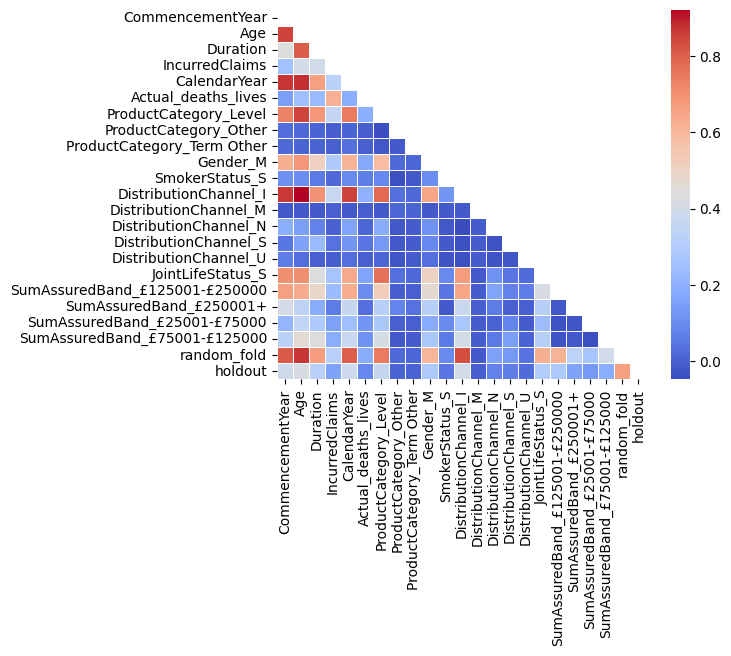

In [30]:
def weighted_corr(df, weights):
    df_weighted = df.multiply(weights, axis=0)
    corr_matrix = df_weighted.corr()
    return corr_matrix


weights = combined_df_encoded["LivesExposure"]
df_for_corr = combined_df_encoded.drop(columns=["LivesExposure"])
weighted_corr_matrix = weighted_corr(df_for_corr, weights)

mask = np.triu(np.ones_like(weighted_corr_matrix, dtype=bool))

sns.heatmap(
    weighted_corr_matrix,
    mask=mask,
    cmap="coolwarm",
    annot=False,
    square=True,
    linewidths=0.5,
)

#####  There is collinearity between distribution channels , commencement year and probaly product category

In [31]:
combined_df_encoded.columns

Index(['CommencementYear', 'Age', 'Duration', 'LivesExposure',
       'IncurredClaims', 'CalendarYear', 'Actual_deaths_lives',
       'ProductCategory_Level', 'ProductCategory_Other',
       'ProductCategory_Term Other', 'Gender_M', 'SmokerStatus_S',
       'DistributionChannel_I', 'DistributionChannel_M',
       'DistributionChannel_N', 'DistributionChannel_S',
       'DistributionChannel_U', 'JointLifeStatus_S',
       'SumAssuredBand_£125001-£250000', 'SumAssuredBand_£250001+',
       'SumAssuredBand_£25001-£75000', 'SumAssuredBand_£75001-£125000',
       'random_fold', 'holdout'],
      dtype='object')

### Poisson distribution modelling

Input Layer
    |
    v
+---------------------+
| Original Features   |
+---------------------+
    |
    v
+---------------------+
| Interaction Terms   |
| (age, duration*,    |
|  calendar_year*)|
+---------------------+
    |
    v
+---------------------+
| Concatenation Layer |
+---------------------+
    |
    v
+---------------------+
| Fully Connected     |
| Layer               |
+---------------------+
    |
    v
+---------------------+
| Exp transform       |
+---------------------+
    |
    v
Output Layer


In [32]:
!pip install torch 
#-i https://pypi.org/simple

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np


# combined_df_encoded = combined_df_encoded.drop("CommencementYear", axis=1)
df = combined_df_encoded.copy()
override = 1
if override == 1:
    Best_trial_params = {
        "lr": 0.18966738894449656,
        "weight_decay": 1.101170064867826e-05,
        "num_epochs": 987,
        "lambda_l1": 0.0001660810158279043,
        "age_cut": 47,
        "age_power": 2.640581163913133,
        "age_multiplier": 1,
    }
    lr = Best_trial_params["lr"]
    weight_decay = Best_trial_params["weight_decay"]
    num_epochs = Best_trial_params["num_epochs"]
    lambda_l1 = Best_trial_params["lambda_l1"]
    age_cut = Best_trial_params["age_cut"]
    age_power = Best_trial_params["age_power"]
    age_multiplier = Best_trial_params["age_multiplier"]
else:
    try:
        age_cut = study.best_params["age_cut"]  # 50
        age_power = study.best_params["age_power"]  # - 2  # 4.133448889716881  #
        weight_decay = study.best_params["weight_decay"]  # 1.0441166112064366e-05
        num_epochs = study.best_params["num_epochs"]  # 680
        lambda_l1 = study.best_params["lambda_l1"]
        lr = study.best_params["lr"]
        age_multiplier = study.best_params["age_multiplier"]
        print(f"read best params{study.best_params}")
    except:
        age_cut = 35  # study.best_params["age_cut"]  # 50
        age_power = 1.3  # study.best_params["age_power"]  # 4.133448889716881  #
        weight_decay = (
            0.0002  # study.best_params["weight_decay"]  # 1.0441166112064366e-05
        )
        num_epochs = 650  # study.best_params["num_epochs"]  # 680
        lambda_l1 = 0.00005  # study.best_params["lambda_l1"]
        lr = 0.1  # study.best_params["lr"]
        print("read other params")


df["Age2"] = (
    age_multiplier * np.maximum(df["Age"] - age_cut, 0) ** age_power
)  # np.exp(df['Age'])
df["LivesExposure"] = df["LivesExposure"].clip(
    lower=1e-6
)  # Ensure no zero or negative values;w we did filter out few cases earlier
train_df = df[df["holdout"] == 0]
test_df = df[df["holdout"] == 1]
train_lives_exposure = train_df["LivesExposure"]
test_lives_exposure = test_df["LivesExposure"]
X_train = train_df.drop(
    [
        "IncurredClaims",
        "LivesExposure",
        "Actual_deaths_lives",
        "holdout",
        "random_fold",
        "CommencementYear",
    ],
    axis=1,
)
y_train = train_df["IncurredClaims"]
X_test = test_df.drop(
    [
        "IncurredClaims",
        "LivesExposure",
        "Actual_deaths_lives",
        "holdout",
        "random_fold",
        "CommencementYear",
    ],
    axis=1,
)
y_test = test_df["IncurredClaims"]
age_test_tensor = torch.tensor(X_test["Age"].values, dtype=torch.float32)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# Convert data to tensors
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)

# Convert LivesExposure to tensors
lives_exposure_train_tensor = torch.tensor(
    train_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
)
lives_exposure_test_tensor = torch.tensor(
    test_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
)


# NN with custom interaction layer and offset
class Mort_Net(nn.Module):
    def __init__(self):
        super(Mort_Net, self).__init__()

        # Identify the indices of the specific columns
        self.age_idx = X_train_scaled.columns.get_loc("Age")
        self.duration_indices = [
            i
            for i, col in enumerate(X_train_scaled.columns)
            if col.startswith("Duration")
        ]
        self.commencement_year_indices = [
            i
            for i, col in enumerate(X_train_scaled.columns)
            if col.startswith("CalendarYear")
        ]
        # Define the fully connected layer
        interaction_input_size = len(self.duration_indices) + len(
            self.commencement_year_indices
        )
        self.fc2 = nn.Linear(
            len(X_train_scaled.columns) + interaction_input_size, 1
        )  # Include original features and interaction terms

    def forward(self, x, exposure):
        # Create interaction terms
        age_feature = x[:, self.age_idx].unsqueeze(1)
        interaction_terms = []  # torch.tensor(data=[], dtype=torch.float32)
        for idx in (
            self.duration_indices + self.commencement_year_indices  # + [self.age_idx]
        ):
            interaction_term = age_feature * x[:, idx].unsqueeze(1)
            interaction_terms.append(interaction_term)
            # print(interaction_term)

            # interaction_terms= torch.tensor(data=[], dtype=torch.float32)
            interaction_terms1 = torch.cat(interaction_terms, dim=1)
        # Concatenate the original features with interaction terms

        x_combined = torch.cat((x, interaction_terms1), dim=1)
        # print(f"x shape: {x.shape}")
        # print(f"interaction_terms1 shape: {interaction_terms1.shape}")
        # print(f"x_combined shape: {x_combined.shape}")

        # Final fully connected layer
        linear_output = self.fc2(x_combined)

        # Adding the log of the exposure as an offset
        offset_output = linear_output + torch.log(exposure)

        # Apply exponential activation for the poisson
        output = torch.exp(offset_output)

        return output


model = Mort_Net()
criterion = nn.PoissonNLLLoss(log_input=False)  # nn.MSELoss()#
optimizer = optim.Adam(
    model.parameters(), lr=lr, weight_decay=weight_decay
)  # Lower learning rate; weight decay acts to mimimise large weights like L2 regularisation


def l1_loss(model, lambda_l1):
    l1 = 0
    for param in model.parameters():
        l1 += torch.sum(torch.abs(param))
    return lambda_l1 * l1


for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor, lives_exposure_train_tensor)
    loss = criterion(outputs, y_train_tensor)  # + l1_loss(model, lambda_l1=0.00008)
    if torch.isnan(loss):
        print(f"Epoch {epoch+1}, Loss: NaN detected")
        break
    l1_reg = l1_loss(model, lambda_l1=lambda_l1)
    total_loss = loss + l1_reg
    total_loss.backward()
    optimizer.step()
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")

model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor, lives_exposure_test_tensor)
    loss = criterion(outputs, y_test_tensor)
    print(f"Test Loss: {loss.item()}")

Epoch 20, Loss: 0.8184047341346741
Epoch 40, Loss: 0.2989565432071686
Epoch 60, Loss: 0.20702733099460602
Epoch 80, Loss: 0.17220783233642578
Epoch 100, Loss: 0.1508251577615738
Epoch 120, Loss: 0.13534057140350342
Epoch 140, Loss: 0.12352190166711807
Epoch 160, Loss: 0.11429037153720856
Epoch 180, Loss: 0.10696142911911011
Epoch 200, Loss: 0.101060651242733
Epoch 220, Loss: 0.09624849259853363
Epoch 240, Loss: 0.09227746725082397
Epoch 260, Loss: 0.08896499872207642
Epoch 280, Loss: 0.08617427945137024
Epoch 300, Loss: 0.08380500227212906
Epoch 320, Loss: 0.08177759498357773
Epoch 340, Loss: 0.08002734184265137
Epoch 360, Loss: 0.07850567251443863
Epoch 380, Loss: 0.07717438787221909
Epoch 400, Loss: 0.07600302249193192
Epoch 420, Loss: 0.07496698945760727
Epoch 440, Loss: 0.07404627650976181
Epoch 460, Loss: 0.07322446256875992
Epoch 480, Loss: 0.07248802483081818
Epoch 500, Loss: 0.0718257874250412
Epoch 520, Loss: 0.07122847437858582
Epoch 540, Loss: 0.07068803161382675
Epoch 560, 

<Axes: >

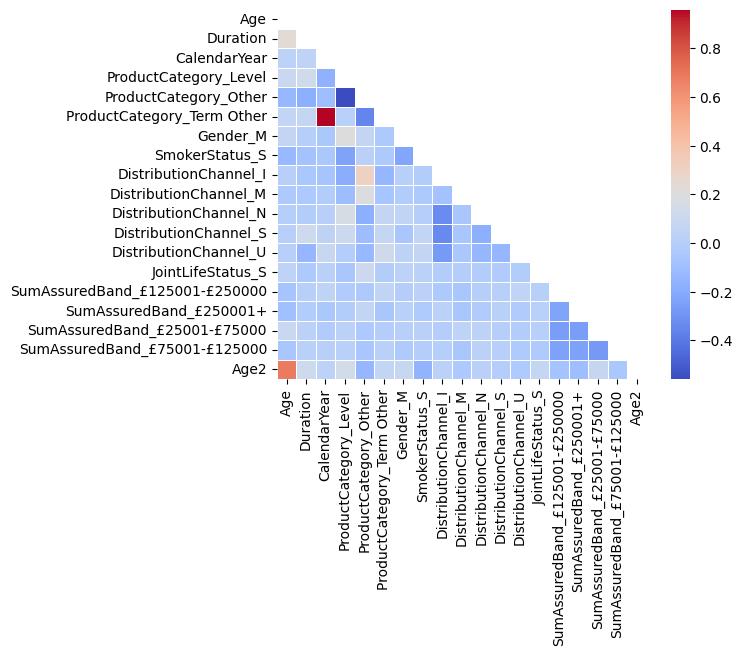

In [35]:
def weighted_corr(df, weights):
    df_weighted = df.multiply(weights, axis=0)
    corr_matrix = df_weighted.corr()
    return corr_matrix


weights = train_lives_exposure
df_for_corr = X_train_scaled
weighted_corr_matrix = weighted_corr(df_for_corr, weights)

mask = np.triu(np.ones_like(weighted_corr_matrix, dtype=bool))

sns.heatmap(
    weighted_corr_matrix,
    mask=mask,
    cmap="coolwarm",
    annot=False,
    square=True,
    linewidths=0.5,
)

[I 2024-11-09 20:34:45,982] A new study created in memory with name: no-name-7cc95d96-e8ef-4e8f-a43a-bfe64d84a41b
[I 2024-11-09 20:41:02,677] Trial 0 finished with value: 781537.725 and parameters: {}. Best is trial 0 with value: 781537.725.
[I 2024-11-09 20:41:02,889] A new study created in memory with name: no-name-e86d11db-34bb-488f-ba21-3a49b8d12064


Mean Pseudo_R2: 781537.7250


[I 2024-11-09 20:47:35,409] Trial 0 finished with value: 561375.25 and parameters: {}. Best is trial 0 with value: 561375.25.
[I 2024-11-09 20:47:35,584] A new study created in memory with name: no-name-558821f5-973a-47ee-824a-cba9403cc829


Mean Pseudo_R2: 561375.2500


[I 2024-11-09 20:54:16,352] Trial 0 finished with value: 752426.35 and parameters: {}. Best is trial 0 with value: 752426.35.


Mean Pseudo_R2: 752426.3500


[I 2024-11-09 20:54:17,060] A new study created in memory with name: no-name-d0bd6fd7-cae4-4133-bdc7-723771ee3091
[I 2024-11-09 21:04:43,421] Trial 0 finished with value: 779553.45 and parameters: {}. Best is trial 0 with value: 779553.45.
[I 2024-11-09 21:04:43,611] A new study created in memory with name: no-name-f2d44df7-f38f-44e2-bc48-19a3c510f98f


Mean Pseudo_R2: 779553.4500


[I 2024-11-09 21:11:18,592] Trial 0 finished with value: 766757.7 and parameters: {}. Best is trial 0 with value: 766757.7.


Mean Pseudo_R2: 766757.7000


[I 2024-11-09 21:11:18,822] A new study created in memory with name: no-name-54c3ed19-267b-42fa-b4ee-aec8a1a2675a
[I 2024-11-09 21:22:38,359] Trial 0 finished with value: 778349.05 and parameters: {}. Best is trial 0 with value: 778349.05.
[I 2024-11-09 21:22:38,552] A new study created in memory with name: no-name-4459bdc5-bab9-4922-99c7-b58b791575c3


Mean Pseudo_R2: 778349.0500


[I 2024-11-09 21:29:04,810] Trial 0 finished with value: 780802.95 and parameters: {}. Best is trial 0 with value: 780802.95.


Mean Pseudo_R2: 780802.9500


[I 2024-11-09 21:29:05,020] A new study created in memory with name: no-name-12a5b13d-42ba-418c-86f6-4b5295b15e32
[I 2024-11-09 21:40:32,558] Trial 0 finished with value: 772771.85 and parameters: {}. Best is trial 0 with value: 772771.85.


Mean Pseudo_R2: 772771.8500


[I 2024-11-09 21:40:32,764] A new study created in memory with name: no-name-112cacf7-8690-44ca-ac89-8a67573f2ba9
[I 2024-11-09 21:46:56,361] Trial 0 finished with value: 718910.55 and parameters: {}. Best is trial 0 with value: 718910.55.
[I 2024-11-09 21:46:56,528] A new study created in memory with name: no-name-a591abef-0275-423d-b3f4-1de23ae4245f


Mean Pseudo_R2: 718910.5500


[I 2024-11-09 21:56:31,114] Trial 0 finished with value: 776644.95 and parameters: {}. Best is trial 0 with value: 776644.95.


Mean Pseudo_R2: 776644.9500


[I 2024-11-09 21:56:31,978] A new study created in memory with name: no-name-af7f2c86-5105-4231-8c17-16613020b41a
[I 2024-11-09 22:04:26,093] Trial 0 finished with value: 771276.85 and parameters: {}. Best is trial 0 with value: 771276.85.


Mean Pseudo_R2: 771276.8500


[I 2024-11-09 22:04:26,325] A new study created in memory with name: no-name-075c1767-a096-4337-9acc-668810be2e30
[I 2024-11-09 22:11:17,199] Trial 0 finished with value: 765406.0 and parameters: {}. Best is trial 0 with value: 765406.0.


Mean Pseudo_R2: 765406.0000


[I 2024-11-09 22:11:17,471] A new study created in memory with name: no-name-50de14ea-1224-47be-993e-dc2fcc3e9dab
[I 2024-11-09 22:24:20,952] Trial 0 finished with value: 777350.2 and parameters: {}. Best is trial 0 with value: 777350.2.


Mean Pseudo_R2: 777350.2000


[I 2024-11-09 22:24:21,631] A new study created in memory with name: no-name-ff61f78d-4a95-43bb-aae0-22d906bcf50f
[I 2024-11-09 22:41:58,270] Trial 0 finished with value: 770102.5 and parameters: {}. Best is trial 0 with value: 770102.5.


Mean Pseudo_R2: 770102.5000


[I 2024-11-09 22:41:58,606] A new study created in memory with name: no-name-74664da6-81ba-4940-bfd1-658e6ec873d8
[I 2024-11-09 22:56:01,672] Trial 0 finished with value: 775345.65 and parameters: {}. Best is trial 0 with value: 775345.65.


Mean Pseudo_R2: 775345.6500


[I 2024-11-09 22:56:02,690] A new study created in memory with name: no-name-507bf5e4-9584-40b5-8190-6d9ea6679418
[I 2024-11-09 23:02:54,023] Trial 0 finished with value: 775470.8 and parameters: {}. Best is trial 0 with value: 775470.8.
[I 2024-11-09 23:02:54,229] A new study created in memory with name: no-name-aa1ebcea-42ac-4b1f-bd09-d881cceae4ed


Mean Pseudo_R2: 775470.8000


[I 2024-11-09 23:09:39,144] Trial 0 finished with value: 780575.25 and parameters: {}. Best is trial 0 with value: 780575.25.


Mean Pseudo_R2: 780575.2500


[I 2024-11-09 23:09:39,371] A new study created in memory with name: no-name-2170be35-4024-4e8a-b205-2cb1c7e18f5e
[I 2024-11-09 23:16:15,200] Trial 0 finished with value: 777613.4 and parameters: {}. Best is trial 0 with value: 777613.4.


Mean Pseudo_R2: 777613.4000


[I 2024-11-09 23:16:15,462] A new study created in memory with name: no-name-be8a27d0-8eb6-48a8-9ec6-299a3fc75b38
[I 2024-11-09 23:23:15,431] Trial 0 finished with value: 779318.55 and parameters: {}. Best is trial 0 with value: 779318.55.


Mean Pseudo_R2: 779318.5500


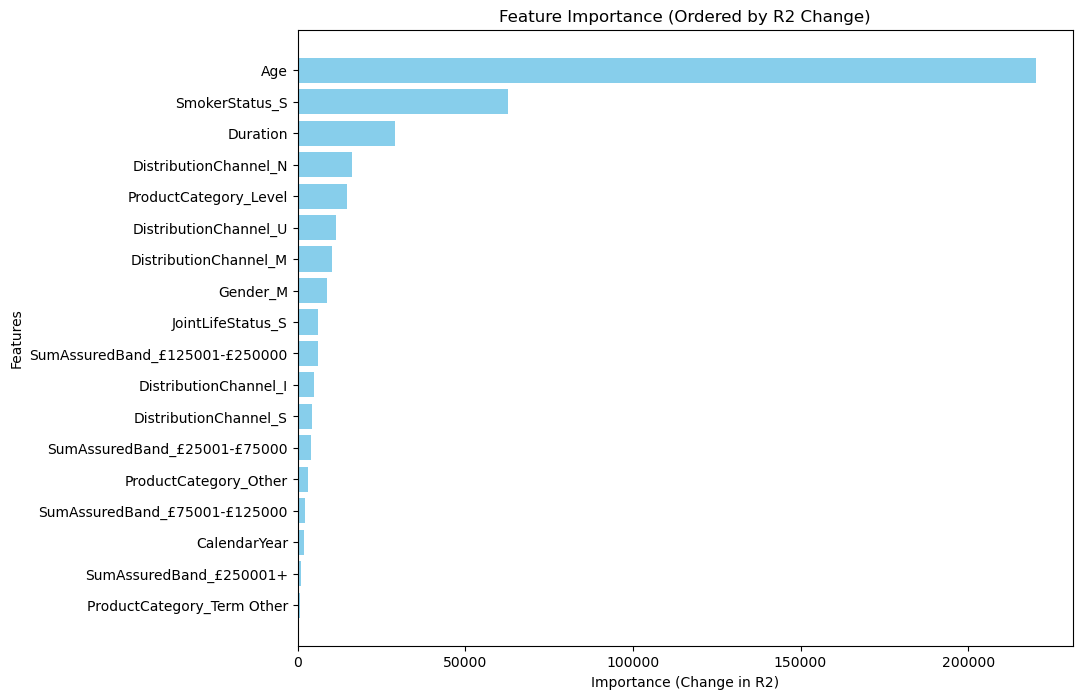

In [ ]:
import optuna

Best_trial_params = {
    "lr": 0.18966738894449656,
    "weight_decay": 1.101170064867826e-05,
    "num_epochs": 987,
    "lambda_l1": 0.0001660810158279043,
    "age_cut": 47,
    "age_power": 2.640581163913133,
    "age_multiplier": 1,
}


def objective(trial, features, df):
    global y_test_tensor
    global age_cut
    global age_power
    lr = Best_trial_params["lr"]  # trial.suggest_float("lr", 9e-2, 2e-1, log=True)
    weight_decay = Best_trial_params["weight_decay"]  # trial.suggest_float(
    #  "weight_decay", 1e-5, 1e-4, log=True
    # )  #
    num_epochs = Best_trial_params["num_epochs"]  # trial.suggest_int(
    #   "num_epochs", 900, 1200
    # )
    lambda_l1 = Best_trial_params[
        "lambda_l1"
    ]  # trial.suggest_float(   "lambda_l1", 1e-5, 1e-3, log=True    )  #
    age_cut = Best_trial_params["age_cut"]  # trial.suggest_int("age_cut", 20, 90)
    age_power = Best_trial_params[
        "age_power"
    ]  # trial.suggest_float("age_power", 1.3, 5)
    age_multiplier = Best_trial_params[
        "age_multiplier"
    ]  # trial.suggest_int("age_multiplier", 0, 1)
    pseudo_r2_scores = []

    # df = combined_df_encoded.copy()
    df = df[df["holdout"] == 0].copy()

    for fold in range(1, 6):  # only do 1 fold to speed up

        df.loc[:, "Age2"] = age_multiplier * (
            np.maximum(df["Age"] - age_cut, 0) ** age_power
        )
        df["LivesExposure"] = df["LivesExposure"].clip(
            lower=1e-6
        )  # Ensure no zero or negative values
        train_df = df[df["random_fold"] != fold]
        test_df = df[df["random_fold"] == fold]
        # print(df.columns)
        # Extract LivesExposure
        train_lives_exposure = train_df["LivesExposure"]
        test_lives_exposure = test_df["LivesExposure"]
        # Define features and target
        if "Age2" not in features:
            features.append("Age2")

        # print(f"features inside:{features}")
        X_train = train_df[features]
        y_train = train_df["IncurredClaims"]
        X_test = test_df[features]
        y_test = test_df["IncurredClaims"]
        # print(f"coliumns in objective:{X_train.columns}")
        # Scale the data
        scaler = StandardScaler()
        X_train_scaled = pd.DataFrame(
            scaler.fit_transform(X_train), columns=X_train.columns
        )
        X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

        # Convert data to tensors
        X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
        X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
        y_train_tensor = torch.tensor(
            y_train.values.reshape(-1, 1), dtype=torch.float32
        )
        y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)

        # Convert LivesExposure to tensors
        lives_exposure_train_tensor = torch.tensor(
            train_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
        )
        lives_exposure_test_tensor = torch.tensor(
            test_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
        )

        model = Mort_Net()
        criterion = nn.PoissonNLLLoss(log_input=False)
        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

        # Training loop
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()
            outputs = model(X_train_tensor, lives_exposure_train_tensor)
            loss = criterion(outputs, y_train_tensor)
            l1_reg = l1_loss(model, lambda_l1=lambda_l1)
            total_loss = loss + l1_reg
            total_loss.backward()
            optimizer.step()

        # Evaluation
        model.eval()
        with torch.no_grad():
            outputs = model(X_test_tensor, lives_exposure_test_tensor)
            y_test_tensor = y_test_tensor + 1e-8
            weighted_mean_target = torch.sum(
                y_test_tensor * lives_exposure_test_tensor
            ) / torch.sum(lives_exposure_test_tensor)
            null_deviance = 2 * torch.sum(
                lives_exposure_test_tensor
                * (
                    y_test_tensor * torch.log(y_test_tensor / weighted_mean_target)
                    - (y_test_tensor - weighted_mean_target)
                )
            )

            # Weighted model deviance
            model_deviance = 2 * torch.sum(
                lives_exposure_test_tensor
                * (
                    y_test_tensor * torch.log(y_test_tensor / outputs)
                    - (y_test_tensor - outputs)
                )
            )
            pseudo_r2 = -model_deviance + null_deviance
            pseudo_r2_scores.append(pseudo_r2.item())

    mean_pseudo_r2 = np.mean(pseudo_r2_scores)
    print(f"Mean Pseudo_R2: {mean_pseudo_r2:.4f}")
    return mean_pseudo_r2


def evaluate_feature_importance(df, features):
    study = optuna.create_study(direction="maximize")
    study.optimize(lambda trial: objective(trial, features, df), n_trials=1)
    best_trial = study.best_trial
    saturated_r2 = best_trial.value

    feature_importances = {}

    # Define one-hot encoded groups
    one_hot_groups = {
        "ProductCategory": [
            "ProductCategory_Level",
            "ProductCategory_Other",
            "ProductCategory_Term Other",
        ],
        "Gender": ["Gender_M"],
        "SmokerStatus": ["SmokerStatus_S"],
        "DistributionChannel": [
            "DistributionChannel_I",
            "DistributionChannel_M",
            "DistributionChannel_N",
            "DistributionChannel_S",
            "DistributionChannel_U",
        ],
        "JointLifeStatus": ["JointLifeStatus_S"],
        "SumAssuredBand": [
            "SumAssuredBand_£125001-£250000",
            "SumAssuredBand_£250001+",
            "SumAssuredBand_£25001-£75000",
            "SumAssuredBand_£75001-£125000",
        ],
    }

    for feature in features:
        if feature == "Age2":
            continue

        df_copy = df.copy()

        # Check if the feature is part of a one-hot encoded group
        group_found = False
        for group, group_features in one_hot_groups.items():
            if feature in group_features:
                group_found = True
                for gf in group_features:
                    if gf == feature:
                        df_copy[gf] = 1  # Set the current feature to 1
                    else:
                        df_copy[gf] = 0  # Set the other features in the group to 0
                break

        if not group_found:
            if feature not in (
                "Age",
                "Duration",
                "CalendarYear",
            ):  # Check if the feature is categorical
                df_copy[feature] = df_copy[feature].mode()[0]  # Replace with mode
            else:
                df_copy[feature] = df_copy[
                    feature
                ].mean()  # Replace with mean for numerical features

        study = optuna.create_study(direction="maximize")
        study.optimize(lambda trial: objective(trial, features, df_copy), n_trials=1)

        best_trial = study.best_trial
        current_r2 = best_trial.value

        feature_importances[feature] = saturated_r2 - current_r2

    return feature_importances


# Initial set of features
features = combined_df_encoded.columns.tolist()
features.remove("IncurredClaims")
features.remove("LivesExposure")
features.remove("Actual_deaths_lives")
features.remove("holdout")
features.remove("random_fold")
features.remove("CommencementYear")
data = combined_df_encoded  # .drop("CommencementYear", axis=1)
# Evaluate feature importance
features = [feature for feature in features if feature is not None]
feature_importances = evaluate_feature_importance(combined_df_encoded, features)

# Plotting the feature importances
sorted_features = sorted(feature_importances, key=feature_importances.get, reverse=True)
sorted_importances = [feature_importances[feature] for feature in sorted_features]

plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importances, color="skyblue")
plt.xlabel("Importance (Change in R2)")
plt.ylabel("Features")
plt.title("Feature Importance (Ordered by R2 Change)")
plt.gca().invert_yaxis()
plt.show()

#might be better to aggregate

In [36]:
y_test_tensor = y_test_tensor + 1e-8
mean_target = torch.mean(y_test_tensor)
null_deviance = 2 * torch.sum(
    y_test_tensor * torch.log(y_test_tensor / mean_target)
    - (y_test_tensor - mean_target)
)
model_deviance = 2 * torch.sum(
    y_test_tensor * torch.log(y_test_tensor / outputs) - (y_test_tensor - outputs)
)
poisson_deviance = null_deviance - model_deviance
print(
    f"poisson deviance: {poisson_deviance}  psuedo R2 ={ 1- model_deviance/null_deviance}"
)
y_pred = outputs.numpy().flatten()

poisson deviance: 25641.0546875  psuedo R2 =0.33960461616516113


In [37]:
test_df["Predicted_Claims"] = y_pred
filtered_combined_df = test_df  # combined_df.loc[combined_df.index.isin(test_df.index)]
# filtered_combined_df = filtered_combined_df.assign(
#    Predicted_Claims=test_df["Predicted_Claims"].values
# )
filtered_combined_df["Predicted_Claims_rate"] = (
    filtered_combined_df["Predicted_Claims"] / filtered_combined_df["LivesExposure"]
)

C:\Users\u013709\AppData\Local\Temp\ipykernel_19660\2573851172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["Predicted_Claims"] = y_pred
C:\Users\u013709\AppData\Local\Temp\ipykernel_19660\2573851172.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_combined_df["Predicted_Claims_rate"] = (


In [38]:
filtered_combined_df["Predicted_Claims_rate"] = (
    filtered_combined_df["Predicted_Claims"] / filtered_combined_df["LivesExposure"]
)

C:\Users\u013709\AppData\Local\Temp\ipykernel_19660\2474485303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_combined_df["Predicted_Claims_rate"] = (


##### plot of high level trends for predicted  followed by partial dependence plots( to be developed)

C:\Users\u013709\AppData\Local\Temp\ipykernel_19660\495353009.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  decile_summary = df_lift.groupby("decile").apply(weighted_mean)


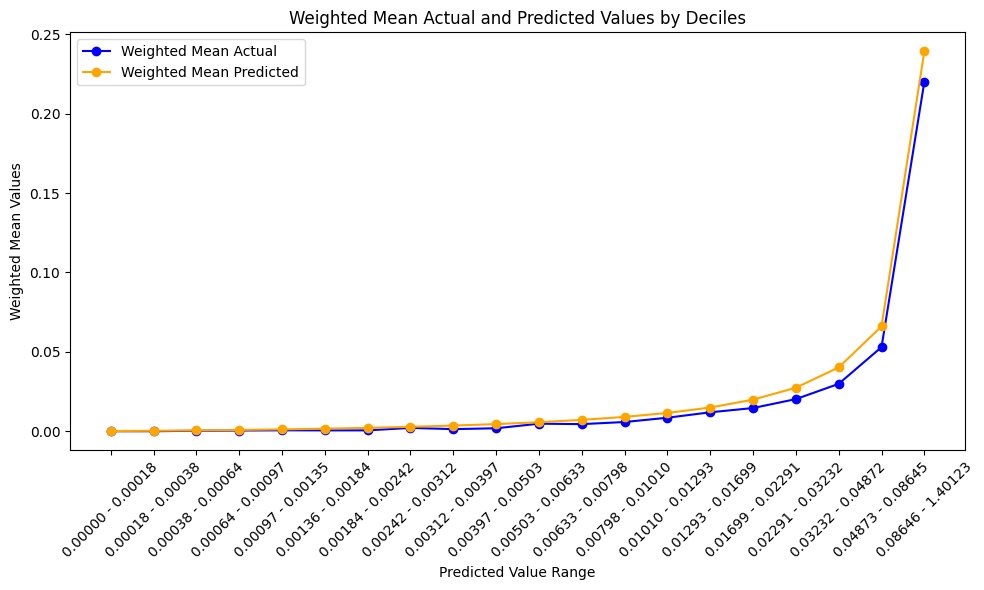

In [39]:
actual = y_test_tensor.numpy().flatten()
predicted = np.round(y_pred, 10)
weights2 = lives_exposure_test_tensor.numpy().flatten()

df_lift = pd.DataFrame({"actual": actual, "predicted": predicted, "weights": weights2})
df_lift = df_lift.sort_values(by="predicted", ascending=False)
# df_lift["Age"] = test_df["Age"]
# Create deciles
df_lift["decile"] = pd.qcut(df_lift["predicted"], 20, labels=False)


def weighted_mean(group):
    return pd.Series(
        {
            "weighted_actual": np.average(group["actual"], weights=group["weights"]),
            "weighted_predicted": np.average(
                group["predicted"], weights=group["weights"]
            ),
            "range": f"{group['predicted'].min():.5f} - {group['predicted'].max():.5f}",
        }
    )


decile_summary = df_lift.groupby("decile").apply(weighted_mean)

# Plot the weighted mean actual and predicted values for each decile
plt.figure(figsize=(10, 6))
plt.plot(
    decile_summary["weighted_actual"],
    label="Weighted Mean Actual",
    color="blue",
    marker="o",
)
plt.plot(
    decile_summary["weighted_predicted"],
    label="Weighted Mean Predicted",
    color="orange",
    marker="o",
)
plt.xlabel("Predicted Value Range")
plt.ylabel("Weighted Mean Values")
plt.title("Weighted Mean Actual and Predicted Values by Deciles")
plt.xticks(ticks=range(20), labels=decile_summary["range"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
plt.show()

C:\Users\u013709\AppData\Local\Temp\ipykernel_19660\3979132684.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  decile_summary = df_lift.groupby("decile").apply(weighted_mean)


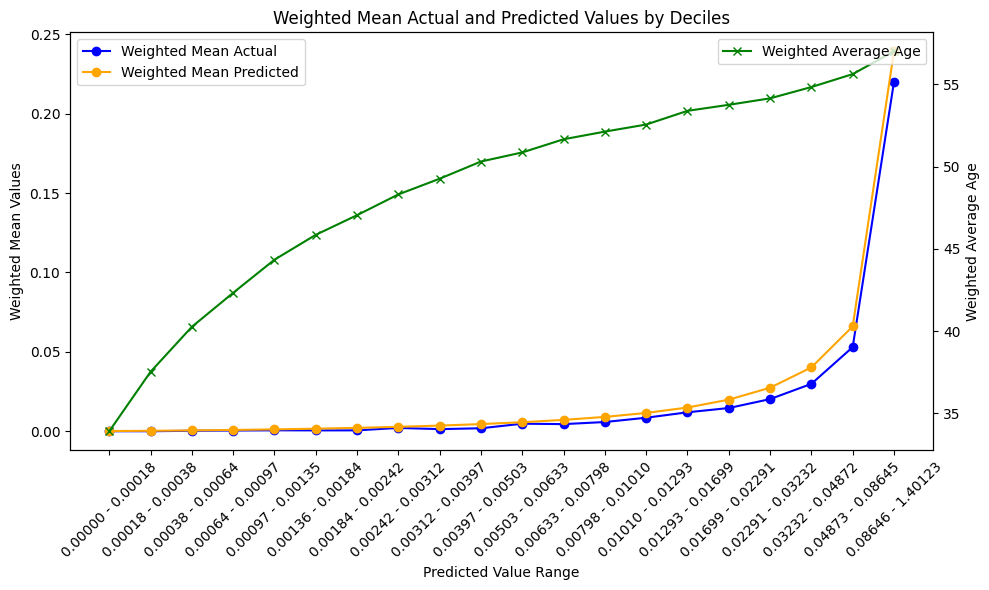

In [40]:
ages_original = age_test_tensor.numpy().flatten()
actual = y_test_tensor.numpy().flatten()
predicted = np.round(y_pred, 10)
weights2 = lives_exposure_test_tensor.numpy().flatten()

df_lift = pd.DataFrame(
    {
        "actual": actual,
        "predicted": predicted,
        "weights": weights2,
        "Age": ages_original,
    }
)
df_lift = df_lift.sort_values(by="predicted", ascending=False)


df_lift["decile"] = pd.qcut(df_lift["predicted"], 20, labels=False)


def weighted_mean(group):
    return pd.Series(
        {
            "weighted_actual": np.average(group["actual"], weights=group["weights"]),
            "weighted_predicted": np.average(
                group["predicted"], weights=group["weights"]
            ),
            "weighted_age": np.average(group["Age"]),  # , weights=group["weights"]),
            "range": f"{group['predicted'].min():.5f} - {group['predicted'].max():.5f}",
        }
    )


# Calculate weighted means for each decile
decile_summary = df_lift.groupby("decile").apply(weighted_mean)

# Plot the weighted mean actual and predicted values for each decile
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(
    decile_summary["weighted_actual"],
    label="Weighted Mean Actual",
    color="blue",
    marker="o",
)
ax1.plot(
    decile_summary["weighted_predicted"],
    label="Weighted Mean Predicted",
    color="orange",
    marker="o",
)
ax1.set_xlabel("Predicted Value Range")
ax1.set_ylabel("Weighted Mean Values")
ax1.set_title("Weighted Mean Actual and Predicted Values by Deciles")
ax1.set_xticks(ticks=range(20))
ax1.set_xticklabels(decile_summary["range"], rotation=45)
ax1.legend(loc="upper left")

# Create a secondary y-axis to plot the weighted average age
ax2 = ax1.twinx()
ax2.plot(
    decile_summary["weighted_age"],
    label="Weighted Average Age",
    color="green",
    marker="x",
)
ax2.set_ylabel("Weighted Average Age")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()

In [41]:
weights_coeff = model.state_dict()
for layer_name, weights_coeff in weights_coeff.items():
    print(f"{layer_name}: {weights_coeff}")

fc2.weight: tensor([[ 8.7296e-01,  1.8398e-01, -2.2919e-05, -6.2081e-03,  5.3201e-02,
          8.4108e-03,  1.2858e-01,  3.8946e-01, -6.4850e-02,  2.2995e-02,
         -2.0827e-02, -8.8231e-05,  2.9198e-02,  2.6278e-02, -1.2674e-01,
         -1.2076e-01, -3.4287e-02, -8.5298e-02,  1.7424e-01, -2.4734e-02,
          1.0425e-04]])
fc2.bias: tensor([-6.4923])


C:\Users\u013709\AppData\Local\Temp\ipykernel_19660\1373237538.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '18.727272727272727' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_temp.iloc[:, feature_index] = val
C:\Users\u013709\AppData\Local\Temp\ipykernel_19660\1373237538.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '19.454545454545453' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_temp.iloc[:, feature_index] = val
C:\Users\u013709\AppData\Local\Temp\ipykernel_19660\1373237538.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '20.18181818181818' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_temp.iloc[:, feature_index] = val
C:

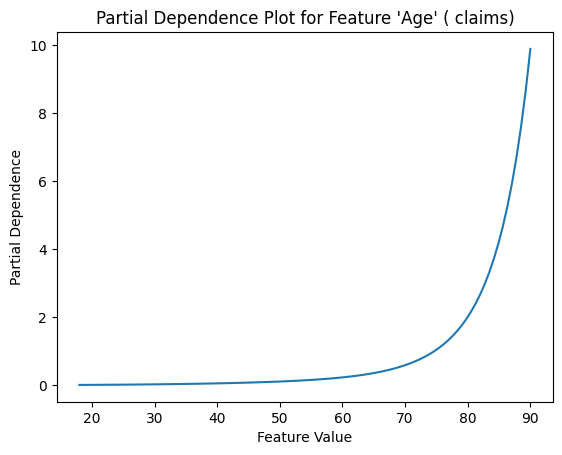

In [42]:
feature_index = X_train.columns.get_loc("Age")
feature_index2 = X_train.columns.get_loc("Age2")
grid_values = np.linspace(
    X_train.iloc[:, feature_index].min(), X_train.iloc[:, feature_index].max(), 100
)

partial_dependence = []
for val in grid_values:
    X_temp = X_train.copy()
    X_temp.iloc[:, feature_index] = val
    X_temp.iloc[:, feature_index2] = (
        age_multiplier * np.maximum(val - age_cut, 0) ** age_power
    )
    X_temp_scaled = scaler.transform(X_temp)

    model.eval()
    with torch.no_grad():
        preds = model(
            torch.tensor(X_temp_scaled, dtype=torch.float32),
            lives_exposure_train_tensor,
        )
        # pred_rate = preds / lives_exposure_train_tensor
        weighted_avg = torch.sum(preds * lives_exposure_train_tensor) / torch.sum(
            lives_exposure_train_tensor
        )
        partial_dependence.append(weighted_avg.item())

# Plot the partial dependence
plt.plot(grid_values, partial_dependence)
plt.xlabel("Feature Value")
plt.ylabel("Partial Dependence")
plt.title("Partial Dependence Plot for Feature 'Age' ( claims)")
plt.show()

In [ ]:
feature_index_duration = X_train.columns.get_loc("Duration")
feature_index_age = X_train.columns.get_loc("Age")
feature_index_age2 = X_train.columns.get_loc("Age2")

# Create a grid of values for Duration and Age
grid_values_duration = np.linspace(
    X_train.iloc[:, feature_index_duration].min(),
    X_train.iloc[:, feature_index_duration].max(),
    20,
)
grid_values_age = np.linspace(
    X_train.iloc[:, feature_index_age].min(),
    X_train.iloc[:, feature_index_age].max(),
    20,
)

# Initialize an array to store partial dependence values
partial_dependence = np.zeros((len(grid_values_duration), len(grid_values_age)))

# Compute partial dependence values
for i, val_duration in enumerate(grid_values_duration):
    for j, val_age in enumerate(grid_values_age):
        X_temp = X_train.copy()
        X_temp.iloc[:, feature_index_duration] = val_duration
        X_temp.iloc[:, feature_index_age] = val_age
        X_temp.iloc[:, feature_index_age2] = age_multiplier * (
            np.maximum(val_age - age_cut, 0) ** age_power
        )
        X_temp_scaled = scaler.transform(X_temp)

        model.eval()
        with torch.no_grad():
            y_pred = model(
                torch.tensor(X_temp_scaled, dtype=torch.float32),
                lives_exposure_train_tensor,
            )
            y_pred_log = np.log(y_pred)
            weights = lives_exposure_train_tensor.numpy().flatten()
            weighted_avg = np.sum(y_pred_log.numpy().flatten() * weights) / np.sum(
                weights
            )
            partial_dependence[i, j] = weighted_avg

# Plot the partial dependence
X, Y = np.meshgrid(grid_values_duration, grid_values_age)
plt.contourf(X, Y, partial_dependence.T, levels=20, cmap="viridis")
plt.colorbar()
plt.xlabel("Duration")
plt.ylabel("Age")
plt.title("Partial Dependence Plot for Duration and Age Interaction  (log claims)")
plt.show()

Other high level trends

In [ ]:
data = filtered_combined_df.drop(
    [
        # "LivesExposure",
        "IncurredClaims",
        "Actual_deaths_lives",
        "holdout",
        "random_fold",
        "CommencementYear",
    ],
    axis=1,
).copy()


no_col = len(data.columns)
continuous_vars = []
categorical_vars = []
Target = "Predicted_Claims_rate"
for i, column in enumerate(data.drop([Target, "LivesExposure"], axis=1).columns):
    if len(data[column].unique()) > 6:
        continuous_vars.append(column)
    else:
        categorical_vars.append(column)


def weighted_mean(df, value, weight):
    return (df[value] * df[weight]).sum() / df[weight].sum()


for var in continuous_vars:
    plt.figure(figsize=(5, 4))
    weighted_data = (
        data[[var, Target, "LivesExposure"]]
        .groupby(var)
        .apply(lambda x: weighted_mean(x, Target, "LivesExposure"))
        .reset_index(name=f"Weighted_{Target}")
    )
    ax = sns.barplot(x=var, y=f"Weighted_{Target}", data=weighted_data)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.title(f"{var} vs Weighted {Target}")
    plt.show()

# Bar plots for categorical variables vs target
for var in categorical_vars:
    plt.figure(figsize=(5, 4))
    weighted_data = (
        data[[var, Target, "LivesExposure"]]
        .groupby(var)
        .apply(lambda x: weighted_mean(x, Target, "LivesExposure"))
        .reset_index(name=f"Weighted_{Target}")
    )
    ax = sns.barplot(x=var, y=f"Weighted_{Target}", data=weighted_data)
    plt.title(f"{var} vs Weighted {Target}")
    plt.show()

#### Model 2 : Zero inflation Poisson

###### didnt use indipendence check

In [36]:
from scipy.stats import chi2_contingency

# Not used 
def check_independence(df):
    # Create a contingency table
    contingency_table = pd.crosstab(df["IncurredClaims"] == 0, df["IncurredClaims"] > 0)
    print(f"contingency_table : {contingency_table}")
    # Perform chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    print(f"Chi-squared statistic: {chi2:.4f}")
    print(f"P-value: {p:.4f}")

    if p < 0.05:
        print(
            "The zero-inflation and Poisson processes are not independent (p < 0.05)."
        )
    else:
        print("The zero-inflation and Poisson processes are independent (p >= 0.05).")

In [37]:
df = combined_df_encoded.copy()
check_independence(df)

other_best_params = {
    "lr": 0.18636853215485796,
    "weight_decay": 1.178832278553321e-05,
    "num_epochs": 938,
    "lambda_l1": 0.09532607373570341,
    "age_cut": 89,
    "age_power": 4.012759717541797,
    "age_multiplier": 0,
}

age_cut = other_best_params["age_cut"]  # 50
age_power = other_best_params["age_power"]  # 4.133448889716881  #
weight_decay = other_best_params["weight_decay"]  # 1.0441166112064366e-05
num_epochs = other_best_params["num_epochs"]  # 680
lambda_l1 = other_best_params["lambda_l1"]
lr = other_best_params["lr"]
age_multiplier = other_best_params["age_multiplier"]
print("using other params")

exclude_features = [
    "DistributionChannel_I",
    "DistributionChannel_M",
    "DistributionChannel_N",
    "DistributionChannel_S",
    # "DistributionChannel_U",
    "SumAssuredBand_£125001-£250000",
    "SumAssuredBand_£250001+",
    # "SumAssuredBand_£25001-£75000",
    # "SumAssuredBand_£75001-£125000",
    # "Duration",
    "ProductCategory_Level",
    # "ProductCategory_Other",
    "ProductCategory_Term Other",
]
exclude_features1 = []
df = df.drop(columns=exclude_features)
df["Age2"] = (
    age_multiplier * np.maximum(df["Age"] - age_cut, 0) ** age_power
)  # np.exp(df['Age'])
df["LivesExposure"] = df["LivesExposure"].clip(
    lower=1e-6
)  # Ensure no zero or negative values;w we did filter out few cases earlier
train_df = df[df["holdout"] == 0]
test_df = df[df["holdout"] == 1]
train_lives_exposure = train_df["LivesExposure"]
test_lives_exposure = test_df["LivesExposure"]
X_train = train_df.drop(
    [
        "IncurredClaims",
        "LivesExposure",
        "Actual_deaths_lives",
        "holdout",
        "random_fold",
        "CommencementYear",
    ],
    axis=1,
)
y_train = train_df["IncurredClaims"]
X_test = test_df.drop(
    [
        "IncurredClaims",
        "LivesExposure",
        "Actual_deaths_lives",
        "holdout",
        "random_fold",
        "CommencementYear",
    ],
    axis=1,
)
y_test = test_df["IncurredClaims"]

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# Convert data to tensors
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)
age_test_tensor = torch.tensor(X_test["Age"].values, dtype=torch.float32)
# Convert LivesExposure to tensors
lives_exposure_train_tensor = torch.tensor(
    train_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
)
lives_exposure_test_tensor = torch.tensor(
    test_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
)


class Mort_Net_ZIP(nn.Module):
    def __init__(self):
        super(Mort_Net_ZIP, self).__init__()

        # Identify the indices of the specific columns
        self.age_idx = X_train_scaled.columns.get_loc("Age")
        self.duration_indices = [
            i
            for i, col in enumerate(X_train_scaled.columns)
            if col.startswith("Duration")
        ]
        self.commencement_year_indices = [
            i
            for i, col in enumerate(X_train_scaled.columns)
            if col.startswith("CalendarYear")
        ]

        # Define the fully connected layers
        interaction_input_size = len(self.duration_indices) + len(
            self.commencement_year_indices
        )
        self.fc2 = nn.Linear(
            len(X_train_scaled.columns) + interaction_input_size, 1
        )  # Include original features and interaction terms

        # Additional layer for zero inflation
        self.fc_zero_inflation = nn.Linear(
            len(X_train_scaled.columns) + interaction_input_size, 1
        )

    def forward(self, x, exposure):
        # Create interaction terms
        age_feature = x[:, self.age_idx].unsqueeze(1)
        interaction_terms = []
        for idx in self.duration_indices + self.commencement_year_indices:
            interaction_term = age_feature * x[:, idx].unsqueeze(1)
            interaction_terms.append(interaction_term)
        interaction_terms1 = torch.cat(interaction_terms, dim=1)

        # Concatenate the original features with interaction terms
        x_combined = torch.cat((x, interaction_terms1), dim=1)

        # Final fully connected layer for Poisson part
        linear_output = self.fc2(x_combined)

        # Adding the log of the exposure as an offset
        offset_output = linear_output + torch.log(exposure)

        # Apply exponential activation for the Poisson part
        poisson_output = torch.exp(offset_output)

        # Zero inflation part
        zero_inflation_output = torch.sigmoid(self.fc_zero_inflation(x_combined))

        return poisson_output, zero_inflation_output


model = Mort_Net_ZIP()


def joint_loss(poisson_output, zero_inflation_output, y_true, exposure):
    # Poisson log-likelihood
    poisson_log_likelihood = (
        y_true * torch.log(poisson_output + 1e-8)
        - poisson_output
        - torch.lgamma(y_true + 1)
    )

    # Bernoulli log-likelihood for zero-inflation
    bernoulli_log_likelihood = y_true * torch.log(1 - zero_inflation_output + 1e-8) + (
        1 - y_true
    ) * torch.log(zero_inflation_output + 1e-8)

    # Joint log-likelihood
    joint_log_likelihood = poisson_log_likelihood + bernoulli_log_likelihood

    # Apply weights (LivesExposure) to the log-likelihoods
    weighted_log_likelihood = joint_log_likelihood * exposure

    # Negative weighted log-likelihood
    neg_weighted_log_likelihood = -torch.sum(weighted_log_likelihood) / torch.sum(
        exposure
    )

    return neg_weighted_log_likelihood


optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)


def l1_loss(model, lambda_l1):
    l1 = 0
    for param in model.parameters():
        l1 += torch.sum(torch.abs(param))
    return lambda_l1 * l1


def weighted_poisson_loss(poisson_output, y_true, exposure):
    poisson_log_likelihood = (
        y_true * torch.log(poisson_output + 1e-8)
        - poisson_output
        - torch.lgamma(y_true + 1)
    )
    weighted_poisson_log_likelihood = poisson_log_likelihood * exposure
    neg_weighted_poisson_log_likelihood = -torch.mean(weighted_poisson_log_likelihood)
    return neg_weighted_poisson_log_likelihood


def weighted_bernoulli_loss(zero_inflation_output, y_true, exposure):
    bernoulli_log_likelihood = y_true * torch.log(1 - zero_inflation_output + 1e-8) + (
        1 - y_true
    ) * torch.log(zero_inflation_output + 1e-8)
    weighted_bernoulli_log_likelihood = bernoulli_log_likelihood * exposure
    neg_weighted_bernoulli_log_likelihood = -torch.mean(
        weighted_bernoulli_log_likelihood
    )
    return neg_weighted_bernoulli_log_likelihood


# Training loop
for epoch in range(num_epochs):
    optimizer.zero_grad()
    poisson_outputs, zero_inflation_outputs = model(
        X_train_tensor, lives_exposure_train_tensor
    )

    # Calculate losses
    loss = joint_loss(
        poisson_outputs,
        zero_inflation_outputs,
        y_train_tensor,
        lives_exposure_train_tensor,
    )
    l1_reg = l1_loss(model, lambda_l1=lambda_l1)
    poisson_loss = weighted_poisson_loss(
        poisson_outputs, y_train_tensor, lives_exposure_train_tensor
    )
    bernoulli_loss = weighted_bernoulli_loss(
        zero_inflation_outputs,
        (y_train_tensor == 0).float(),
        lives_exposure_train_tensor,
    )
    total_loss = poisson_loss + bernoulli_loss + l1_reg
    #    total_loss = loss + l1_reg
    total_loss.backward()
    optimizer.step()

    if (epoch + 1) % 20 == 0:
        print(
            f"Epoch {epoch+1}, Joint Loss: {loss.item()}, Total Loss: {total_loss.item()}"
        )

model.eval()
with torch.no_grad():
    poisson_outputs, zero_inflation_outputs = model(
        X_test_tensor, lives_exposure_test_tensor
    )
    loss = joint_loss(
        poisson_outputs,
        zero_inflation_outputs,
        y_test_tensor,
        lives_exposure_test_tensor,
    )
    l1_reg = l1_loss(model, lambda_l1=lambda_l1)
    poisson_loss = weighted_poisson_loss(
        poisson_outputs, y_test_tensor, lives_exposure_test_tensor
    )
    bernoulli_loss = weighted_bernoulli_loss(
        zero_inflation_outputs,
        (y_test_tensor == 0).float(),
        lives_exposure_test_tensor,
    )
    total_loss = poisson_loss + bernoulli_loss + l1_reg

    # total_loss = loss + l1_reg
    print(
        f"Test Poisson Loss: Joint Loss: {loss.item()}, Total Loss: {total_loss.item()}"
    )

contingency_table : IncurredClaims    False  True 
IncurredClaims                
False                 0  41735
True            2491613      0
Chi-squared statistic: 2533286.2828
P-value: 0.0000
The zero-inflation and Poisson processes are not independent (p < 0.05).
using other params
Epoch 20, Joint Loss: 6.915261745452881, Total Loss: 69.74909210205078
Epoch 40, Joint Loss: 4.271115303039551, Total Loss: 30.17168617248535
Epoch 60, Joint Loss: 3.4392287731170654, Total Loss: 20.736440658569336
Epoch 80, Joint Loss: 3.1186745166778564, Total Loss: 17.49671745300293
Epoch 100, Joint Loss: 3.026383876800537, Total Loss: 15.6696195602417
Epoch 120, Joint Loss: 2.9299914836883545, Total Loss: 14.42136287689209
Epoch 140, Joint Loss: 2.8666250705718994, Total Loss: 13.496374130249023
Epoch 160, Joint Loss: 2.822880268096924, Total Loss: 12.79184341430664
Epoch 180, Joint Loss: 2.7751665115356445, Total Loss: 12.24159049987793
Epoch 200, Joint Loss: 2.757577419281006, Total Loss: 11.79909

In [ ]:
%pip install copulas

from scipy.stats import norm
from copulas.bivariate import Clayton, Gumbel, Frank
from copulas.multivariate import GaussianMultivariate
from copulas.visualization import scatter_2d
from scipy.stats import poisson, bernoulli
from scipy.stats import multivariate_normal

In [40]:
model.eval()
with torch.no_grad():
    poisson_outputs, zero_inflation_outputs = model(
        X_train_tensor, lives_exposure_train_tensor
    )
    predicted_claims = poisson_outputs * (1 - zero_inflation_outputs)
    predicted_claims = predicted_claims.numpy()

# Calculate residuals
residuals = y_train_tensor.numpy().flatten() - predicted_claims.flatten()

# Transform residuals to uniform marginals for copula fitting
uniform_residuals = norm.cdf(residuals)

# Transform Poisson outputs to uniform marginals using Poisson CDF
uniform_poisson = poisson.cdf(poisson_outputs, mu=poisson_outputs)

# Transform Bernoulli outputs to uniform marginals using Bernoulli CDF
uniform_bernoulli = bernoulli.cdf(zero_inflation_outputs, p=zero_inflation_outputs)

# Create a two-dimensional dataset
copula_data = np.column_stack((uniform_poisson, uniform_bernoulli))

# Fit different copulas using the residuals from Mort_Net_ZIP model
gaussian_copula = GaussianMultivariate()
gaussian_copula.fit(copula_data)

frank_copula = Frank()
frank_copula.fit(copula_data)
# Compute log-likelihood for Gaussian copula
# mean = gaussian_copula.distribution.mean
# covariance = gaussian_copula.distribution.covariance
# gaussian_log_likelihood = np.sum(multivariate_normal.logpdf(copula_data, mean=mean, cov=covariance))
# gaussian_aic = 2 * len(mean) - 2 * gaussian_log_likelihood

c:\Users\u013709\.conda\envs\CancerRisk\lib\site-packages\scipy\stats\_continuous_distns.py:795: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\Users\u013709\.conda\envs\CancerRisk\lib\site-packages\scipy\stats\_continuous_distns.py:800: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))
c:\Users\u013709\.conda\envs\CancerRisk\lib\site-packages\scipy\stats\_continuous_distns.py:795: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\Users\u013709\.conda\envs\CancerRisk\lib\site-packages\scipy\stats\_continuous_distns.py:800: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))
c:\Users\u013709\.conda\envs\CancerRisk\lib\site-package

In [41]:
# Extract the theta parameter
theta_frank = frank_copula.theta
print(f"Frank copula theta: {theta_frank}")

# Interpretation
if theta_frank == 0:
    print("The variables are independent.")
elif theta_frank > 0:
    print("There is positive dependence between the variables.")
else:
    print("There is negative dependence between the variables.")

Frank copula theta: 2.3970073990372627
There is positive dependence between the variables.


In [42]:
other_best_params = {
    "lr": 0.18636853215485796,
    "weight_decay": 1.178832278553321e-05,
    "num_epochs": 938,
    "lambda_l1": 0.09532607373570341,
    "age_cut": 89,
    "age_power": 4.012759717541797,
    "age_multiplier": 0,
}
df = combined_df_encoded[combined_df_encoded["Age"] <= 85].copy()
age_cut = other_best_params["age_cut"]  # 50
age_power = other_best_params["age_power"]  # 4.133448889716881  #
weight_decay = other_best_params["weight_decay"]  # 1.0441166112064366e-05
num_epochs = other_best_params["num_epochs"]  # 680
lambda_l1 = other_best_params["lambda_l1"]
lr = other_best_params["lr"]
age_multiplier = other_best_params["age_multiplier"]

exclude_features1 = []
exclude_features = [
    "DistributionChannel_I",
    "DistributionChannel_M",
    "DistributionChannel_N",
    "DistributionChannel_S",
    # "DistributionChannel_U",
    "SumAssuredBand_£125001-£250000",
    "SumAssuredBand_£250001+",
    # "SumAssuredBand_£25001-£75000",
    # "SumAssuredBand_£75001-£125000",
    # "Duration",
    "ProductCategory_Level",
    # "ProductCategory_Other",
    "ProductCategory_Term Other",
]
df = df.drop(columns=exclude_features)
df["Age2"] = (
    age_multiplier * np.maximum(df["Age"] - age_cut, 0) ** age_power
)  # np.exp(df['Age'])
df["LivesExposure"] = df["LivesExposure"].clip(
    lower=1e-6
)  # Ensure no zero or negative values;w we did filter out few cases earlier
train_df = df[df["holdout"] == 0]
test_df = df[df["holdout"] == 1]
train_lives_exposure = train_df["LivesExposure"]
test_lives_exposure = test_df["LivesExposure"]
X_train = train_df.drop(
    [
        "IncurredClaims",
        "LivesExposure",
        "Actual_deaths_lives",
        "holdout",
        "random_fold",
        "CommencementYear",
    ],
    axis=1,
)
y_train = train_df["IncurredClaims"]
X_test = test_df.drop(
    [
        "IncurredClaims",
        "LivesExposure",
        "Actual_deaths_lives",
        "holdout",
        "random_fold",
        "CommencementYear",
    ],
    axis=1,
)
y_test = test_df["IncurredClaims"]

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# Convert data to tensors
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)
age_test_tensor = torch.tensor(X_test["Age"].values, dtype=torch.float32)
# Convert LivesExposure to tensors
lives_exposure_train_tensor = torch.tensor(
    train_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
)
lives_exposure_test_tensor = torch.tensor(
    test_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
)


class Poisson_Net(nn.Module):
    def __init__(self):
        super(Poisson_Net, self).__init__()
        self.age_idx = X_train_scaled.columns.get_loc("Age")
        self.duration_indices = [
            i
            for i, col in enumerate(X_train_scaled.columns)
            if col.startswith("Duration")
        ]
        self.commencement_year_indices = [
            i
            for i, col in enumerate(X_train_scaled.columns)
            if col.startswith("CalendarYear")
        ]

        # Define the fully connected layers
        interaction_input_size = len(self.duration_indices) + len(
            self.commencement_year_indices
        )
        self.fc2 = nn.Linear(len(X_train_scaled.columns) + interaction_input_size, 1)

    def forward(self, x, exposure):
        age_feature = x[:, self.age_idx].unsqueeze(1)
        interaction_terms = []
        for idx in self.duration_indices + self.commencement_year_indices:
            interaction_term = age_feature * x[:, idx].unsqueeze(1)
            interaction_terms.append(interaction_term)
        interaction_terms1 = torch.cat(interaction_terms, dim=1)

        # Concatenate the original features with interaction terms
        x_combined = torch.cat((x, interaction_terms1), dim=1)

        # Final fully connected layer for Poisson part
        linear_output = self.fc2(x_combined)

        # Adding the log of the exposure as an offset
        offset_output = linear_output + torch.log(exposure)
        poisson_output = torch.exp(offset_output)
        return poisson_output


# Initialize and train the Poisson model
poisson_model = Poisson_Net()
optimizer_poisson = optim.Adam(
    poisson_model.parameters(), lr=lr, weight_decay=weight_decay
)

for epoch in range(int(num_epochs / 100.25)):  # Train for half the total epochs
    optimizer_poisson.zero_grad()
    poisson_outputs = poisson_model(X_train_tensor, lives_exposure_train_tensor)
    poisson_loss = weighted_poisson_loss(
        poisson_outputs, y_train_tensor, lives_exposure_train_tensor
    )
    total_loss = poisson_loss + l1_loss(poisson_model, lambda_l1=lambda_l1)
    total_loss.backward()
    optimizer_poisson.step()

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}, Poisson Loss: {total_loss.item()}")

# Initialize the full model
model = Mort_Net_ZIP()

# Copy weights from the trained Poisson model to the full model
model.fc2.weight.data = poisson_model.fc2.weight.data.clone()
model.fc2.bias.data = poisson_model.fc2.bias.data.clone()

optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)


def joint_loss(poisson_output, zero_inflation_output, y_true, exposure):

    poisson_loss = weighted_poisson_loss(poisson_output, y_true, exposure)
    bernoulli_loss = weighted_bernoulli_loss(
        zero_inflation_output, (y_true == 0).float(), exposure
    )

    # Transform Poisson outputs to uniform marginals using Poisson CDF
    uniform_poisson = poisson.cdf(
        poisson_output.detach().numpy(), mu=poisson_output.detach().numpy()
    )

    # Transform Bernoulli outputs to uniform marginals using Bernoulli CDF
    uniform_bernoulli = bernoulli.cdf(
        zero_inflation_output.detach().numpy(),
        p=zero_inflation_output.detach().numpy(),
    )
    uniform_poisson = np.clip(uniform_poisson, 1e-6, 1 - 1e-6)
    uniform_bernoulli = np.clip(uniform_bernoulli, 1e-6, 1 - 1e-6)
    # Create a two-dimensional dataset for copula fitting
    copula_data = np.column_stack(
        (uniform_poisson.flatten(), uniform_bernoulli.flatten())
    )

    # Fit the Frank copula to the data
    frank_copula = Frank()
    frank_copula.fit(copula_data)

    pdf_values = frank_copula.probability_density(copula_data)

    loss_ll = poisson_loss + bernoulli_loss
    n_log_likelihood_copula_weighted = -np.sum(
        np.log(pdf_values) * exposure.detach().numpy().flatten()
    ) / np.sum(exposure.detach().numpy().flatten())

    return loss_ll + n_log_likelihood_copula_weighted


for epoch in range(
    int(num_epochs / 100.25), num_epochs
):  # Continue training for the remaining epochs
    optimizer.zero_grad()
    poisson_outputs, zero_inflation_outputs = model(
        X_train_tensor, lives_exposure_train_tensor
    )
    loss = joint_loss(
        poisson_outputs,
        zero_inflation_outputs,
        y_train_tensor,
        lives_exposure_train_tensor,
    )
    l1_reg = l1_loss(model, lambda_l1=lambda_l1)
    total_loss = loss + l1_reg
    total_loss.backward()
    optimizer.step()

    if (epoch + 1) % 20 == 0:
        print(
            f"Epoch {epoch+1}, Joint Loss: {loss.item()}, Total Loss: {total_loss.item()}"
        )

c:\Users\u013709\.conda\envs\CancerRisk\lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)


Epoch 20, Joint Loss: 29.7425537109375, Total Loss: 31.20610237121582
Epoch 40, Joint Loss: 10.682836532592773, Total Loss: 12.03419303894043
Epoch 60, Joint Loss: 8.835211753845215, Total Loss: 10.143213272094727
Epoch 80, Joint Loss: 8.277029991149902, Total Loss: 9.464035987854004
Epoch 100, Joint Loss: 8.018257141113281, Total Loss: 9.200200080871582
Epoch 120, Joint Loss: 7.837039947509766, Total Loss: 9.019736289978027
Epoch 140, Joint Loss: 7.696733474731445, Total Loss: 8.872115135192871
Epoch 160, Joint Loss: 7.601627349853516, Total Loss: 8.77618408203125
Epoch 180, Joint Loss: 7.513270854949951, Total Loss: 8.684324264526367
Epoch 200, Joint Loss: 7.458316802978516, Total Loss: 8.618246078491211
Epoch 220, Joint Loss: 7.397082805633545, Total Loss: 8.558420181274414
Epoch 240, Joint Loss: 7.356639862060547, Total Loss: 8.509913444519043
Epoch 260, Joint Loss: 7.3239054679870605, Total Loss: 8.470508575439453
Epoch 280, Joint Loss: 7.292823314666748, Total Loss: 8.43858337402

In [43]:
model.eval()
with torch.no_grad():
    poisson_outputs, zero_inflation_outputs = model(
        X_test_tensor, lives_exposure_test_tensor
    )
    loss = joint_loss(
        poisson_outputs,
        zero_inflation_outputs,
        y_test_tensor,
        lives_exposure_test_tensor,
    )
    l1_reg = l1_loss(model, lambda_l1=lambda_l1)
    poisson_loss = weighted_poisson_loss(
        poisson_outputs, y_test_tensor, lives_exposure_test_tensor
    )
    bernoulli_loss = weighted_bernoulli_loss(
        zero_inflation_outputs, (y_test_tensor == 0).float(), lives_exposure_test_tensor
    )
    total_loss = loss + l1_reg

    # total_loss = loss + l1_reg
    print(
        f"Test Poisson Loss: Joint Loss: {loss.item()}, Total Loss: {total_loss.item()}"
    )

Test Poisson Loss: Joint Loss: 7.049908638000488, Total Loss: 8.17744255065918


C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\2162418760.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  decile_summary = df_lift.groupby("decile").apply(weighted_mean)


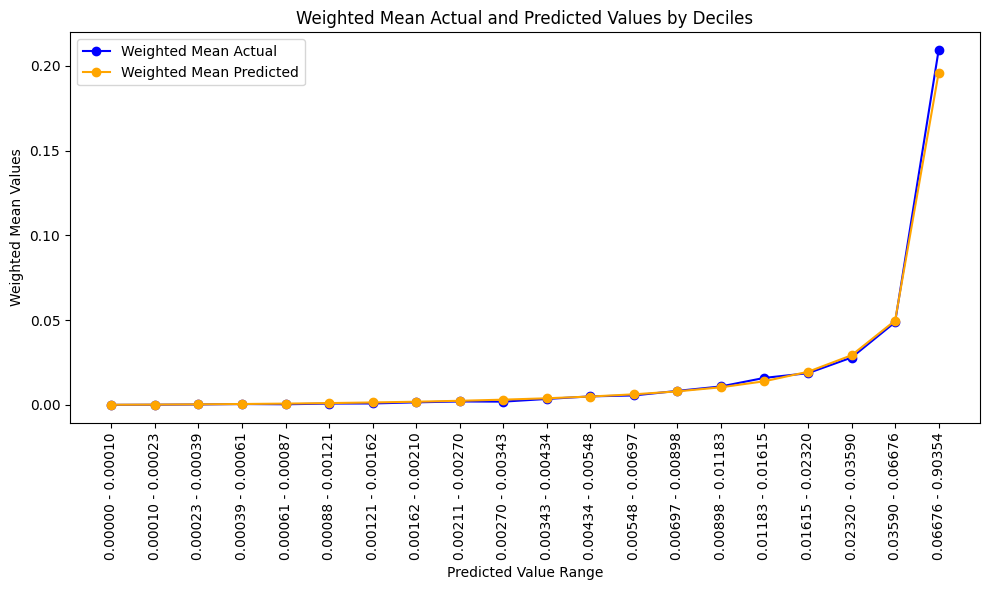

poisson deviance: 25007.10546875  psuedo R2 =0.33227330446243286
fc2.weight: tensor([[ 1.1285e+00,  1.1590e-01, -1.0577e-04, -1.0329e-03,  4.6049e-02,
          3.3789e-01,  4.5431e-03,  2.2131e-03,  1.1550e-03,  1.3076e-03,
         -2.6468e-02, -3.6597e-03,  6.9200e-03]])
fc2.bias: tensor([-6.7855])
fc_zero_inflation.weight: tensor([[ 0.6170,  0.1781,  0.0065,  0.0118,  0.0509, -0.0358, -0.0404,  0.0154,
         -0.0152,  0.0327, -0.0055,  0.0099, -0.0169]])
fc_zero_inflation.bias: tensor([-2.3307])


In [44]:
model.eval()
with torch.no_grad():
    poisson_outputs, zero_inflation_outputs = model(
        X_test_tensor, lives_exposure_test_tensor
    )
    y_pred_poisson = poisson_outputs.numpy().flatten()
    y_pred_bernoulli = zero_inflation_outputs.numpy().flatten()

# Combine the Poisson and Bernoulli outputs to get the final predictions
y_pred = y_pred_poisson * (1 - y_pred_bernoulli)

# Flatten the actual values and weights
actual = y_test_tensor.numpy().flatten()
predicted = np.round(y_pred, 6)
weights = lives_exposure_test_tensor.numpy().flatten()
# Create a DataFrame for lift analysis
df_lift = pd.DataFrame({"actual": actual, "predicted": predicted, "weights": weights})
df_lift = df_lift.sort_values(by="predicted", ascending=False)
# df_lift["Age"] = X_test_scaled["Age"]
# Create deciles
df_lift["decile"] = pd.qcut(df_lift["predicted"], 20, labels=False)


def weighted_mean(group):
    return pd.Series(
        {
            "weighted_actual": np.average(group["actual"], weights=group["weights"]),
            "weighted_predicted": np.average(
                group["predicted"], weights=group["weights"]
            ),
            "range": f"{group['predicted'].min():.5f} - {group['predicted'].max():.5f}",
        }
    )


# Calculate weighted means for each decile
decile_summary = df_lift.groupby("decile").apply(weighted_mean)

# Plot the weighted mean actual and predicted values for each decile
plt.figure(figsize=(10, 6))
plt.plot(
    decile_summary["weighted_actual"],
    label="Weighted Mean Actual",
    color="blue",
    marker="o",
)
plt.plot(
    decile_summary["weighted_predicted"],
    label="Weighted Mean Predicted",
    color="orange",
    marker="o",
)
plt.xlabel("Predicted Value Range")
plt.ylabel("Weighted Mean Values")
plt.title("Weighted Mean Actual and Predicted Values by Deciles")
plt.xticks(ticks=range(20), labels=decile_summary["range"], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

actual = actual + 1e-8
mean_target = np.mean(actual)
null_deviance = 2 * sum(actual * np.log(actual / mean_target) - (actual - mean_target))
model_deviance = 2 * sum(actual * np.log(actual / y_pred) - (actual - y_pred))
poisson_deviance = null_deviance - model_deviance
print(
    f"poisson deviance: {poisson_deviance}  psuedo R2 ={ 1- model_deviance/null_deviance}"
)

weights = model.state_dict()
for layer_name, weight in weights.items():
    print(f"{layer_name}: {weight}")

[I 2024-12-02 12:46:45,576] A new study created in memory with name: no-name-eebbb3b9-f544-4cc8-9b2d-e7d03fe840b4
c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-02 13:25:00,454] Trial 0 finished with value: 0.26626044511795044 and parameters: {}. Best is trial 0 with value: 0.26626044511795044.


Mean Pseudo_R2: 0.2663
best_trial_params {'saturated_r2': 0.26626044511795044}


[I 2024-12-02 13:25:01,027] A new study created in memory with name: no-name-37841aac-3b13-487b-b511-dce40ef1f96a
c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-02 14:00:04,474] Trial 0 finished with value: 0.15846896171569824 and parameters: {}. Best is trial 0 with value: 0.15846896171569824.
[I 2024-12-02 14:00:04,581] A new study created in memory with name: no-name-a15e9e86-6862-4afb-8b09-cd27e97620ea


Mean Pseudo_R2: 0.1585
trial params{}


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-02 14:35:48,025] Trial 0 finished with value: 0.26209449768066406 and parameters: {}. Best is trial 0 with value: 0.26209449768066406.
[I 2024-12-02 14:35:48,124] A new study created in memory with name: no-name-38dc74de-a976-4fd5-8210-1cbdc58d9d0f


Mean Pseudo_R2: 0.2621
trial params{}


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-02 15:12:18,926] Trial 0 finished with value: 0.26619821786880493 and parameters: {}. Best is trial 0 with value: 0.26619821786880493.
[I 2024-12-02 15:12:19,067] A new study created in memory with name: no-name-91d38612-449d-4459-9476-b12470f70145


Mean Pseudo_R2: 0.2662
trial params{}


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-02 15:48:36,626] Trial 0 finished with value: 0.2663888931274414 and parameters: {}. Best is trial 0 with value: 0.2663888931274414.
[I 2024-12-02 15:48:36,749] A new study created in memory with name: no-name-d8fcbc2e-8386-42bb-8167-6a3f964c5b45


Mean Pseudo_R2: 0.2664
trial params{}


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-02 16:26:19,981] Trial 0 finished with value: 0.26502400636672974 and parameters: {}. Best is trial 0 with value: 0.26502400636672974.
[I 2024-12-02 16:26:20,072] A new study created in memory with name: no-name-b4ae7f42-42d5-4640-a186-86889b06f9d0


Mean Pseudo_R2: 0.2650
trial params{}


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-02 17:03:34,060] Trial 0 finished with value: 0.2584375739097595 and parameters: {}. Best is trial 0 with value: 0.2584375739097595.


Mean Pseudo_R2: 0.2584
trial params{}


[I 2024-12-02 17:03:34,285] A new study created in memory with name: no-name-f40f7623-537f-4f25-8846-e8f666cbbbfd
c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-02 17:40:17,597] Trial 0 finished with value: 0.2662312388420105 and parameters: {}. Best is trial 0 with value: 0.2662312388420105.
[I 2024-12-02 17:40:17,693] A new study created in memory with name: no-name-a4199b47-12e2-4ba6-a71a-14935f10a3de


Mean Pseudo_R2: 0.2662
trial params{}


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-02 18:16:17,655] Trial 0 finished with value: 0.2664286494255066 and parameters: {}. Best is trial 0 with value: 0.2664286494255066.
[I 2024-12-02 18:16:17,808] A new study created in memory with name: no-name-b589ef31-6607-43c5-8185-4bec8ebc5c49


Mean Pseudo_R2: 0.2664
trial params{}


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-02 18:53:37,959] Trial 0 finished with value: 0.2661747336387634 and parameters: {}. Best is trial 0 with value: 0.2661747336387634.
[I 2024-12-02 18:53:38,156] A new study created in memory with name: no-name-ebca9aa4-0394-4ff7-b115-adba34a26a68


Mean Pseudo_R2: 0.2662
trial params{}


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-02 19:31:09,443] Trial 0 finished with value: 0.26647013425827026 and parameters: {}. Best is trial 0 with value: 0.26647013425827026.


Mean Pseudo_R2: 0.2665
trial params{}


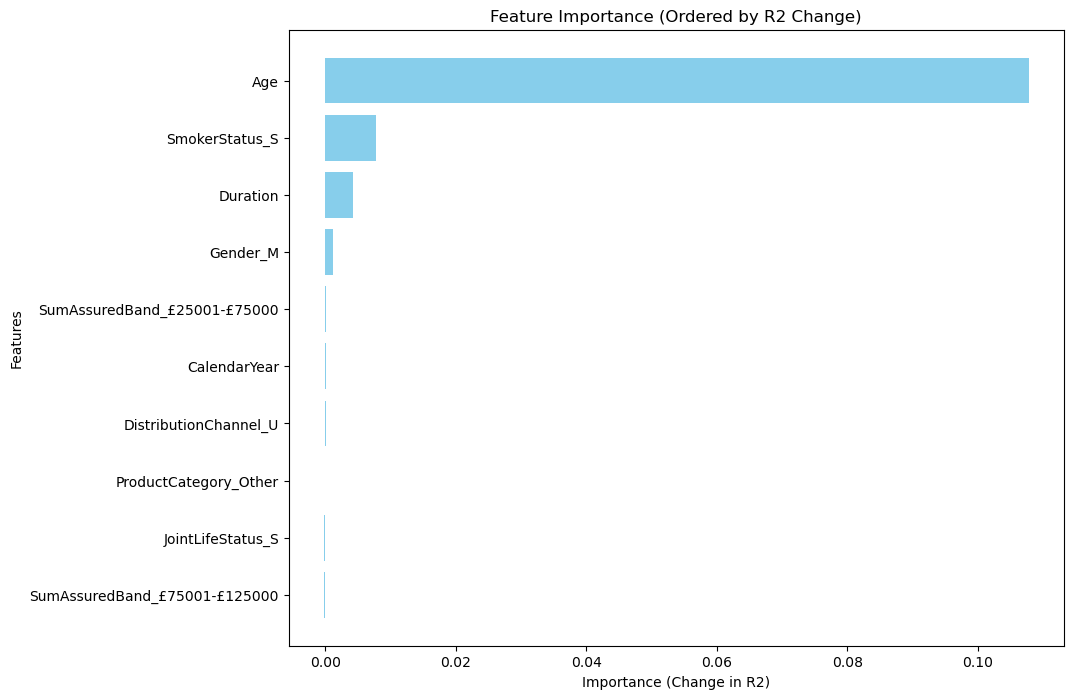

In [ ]:

def objective(trial, features, df, best_trial_params=None):
    best_trial_params = {
        "lr": 0.18636853215485796,
        "weight_decay": 1.178832278553321e-05,
        "num_epochs": 938,
        "lambda_l1": 0.09532607373570341,
        "age_cut": 89,
        "age_power": 4.012759717541797,
        "age_multiplier": 0,
    }
    if best_trial_params is None:
        lr = trial.suggest_float("lr", 1e-3, 2e-1, log=True)
        weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)
        num_epochs = trial.suggest_int("num_epochs", 5, 1200)
        lambda_l1 = trial.suggest_float("lambda_l1", 1e-5, 1e-1, log=True)
        age_cut = trial.suggest_int("age_cut", 20, 90)
        age_power = trial.suggest_float("age_power", 1.1, 5)
        age_multiplier = trial.suggest_int("age_multiplier", 0, 1)
    else:
        lr = best_trial_params["lr"]
        weight_decay = best_trial_params["weight_decay"]
        num_epochs = best_trial_params["num_epochs"]
        lambda_l1 = best_trial_params["lambda_l1"]
        age_cut = best_trial_params["age_cut"]
        age_power = best_trial_params["age_power"]
        age_multiplier = best_trial_params["age_multiplier"]

    pseudo_r2_scores = []

    for fold in range(1, 2):
        df["Age2"] = age_multiplier * np.maximum(df["Age"] - age_cut, 0) ** age_power
        df["LivesExposure"] = df["LivesExposure"].clip(lower=1e-6)
        train_df = df[df["holdout"] == 0]
        test_df = df[~(df["holdout"] == 0)]

        train_lives_exposure = train_df["LivesExposure"]
        test_lives_exposure = test_df["LivesExposure"]

        if "Age2" not in features:
            features.append("Age2")

        X_train = train_df[features]
        y_train = train_df["IncurredClaims"]
        X_test = test_df[features]
        y_test = test_df["IncurredClaims"]

        scaler = StandardScaler()
        X_train_scaled = pd.DataFrame(
            scaler.fit_transform(X_train), columns=X_train.columns
        )
        X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

        X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
        X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
        y_train_tensor = torch.tensor(
            y_train.values.reshape(-1, 1), dtype=torch.float32
        )
        y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)
        lives_exposure_train_tensor = torch.tensor(
            train_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
        )
        lives_exposure_test_tensor = torch.tensor(
            test_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
        )

        # Train Poisson model first
        poisson_model = Poisson_Net()
        optimizer_poisson = optim.Adam(
            poisson_model.parameters(), lr=lr, weight_decay=weight_decay
        )

        for epoch in range(int(num_epochs / 100.25)):
            optimizer_poisson.zero_grad()
            poisson_outputs = poisson_model(X_train_tensor, lives_exposure_train_tensor)
            poisson_loss = weighted_poisson_loss(
                poisson_outputs, y_train_tensor, lives_exposure_train_tensor
            )
            l1_reg = l1_loss(poisson_model, lambda_l1=lambda_l1)
            total_loss = poisson_loss + l1_reg
            total_loss.backward()
            optimizer_poisson.step()

        # Initialize and fine-tune the full ZIP model
        model = Mort_Net_ZIP()
        model.fc2.weight.data = poisson_model.fc2.weight.data.clone()
        model.fc2.bias.data = poisson_model.fc2.bias.data.clone()
        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

        for epoch in range(int(num_epochs / 100.25), num_epochs):
            optimizer.zero_grad()
            poisson_outputs, zero_inflation_outputs = model(
                X_train_tensor, lives_exposure_train_tensor
            )
            loss = joint_loss(
                poisson_outputs,
                zero_inflation_outputs,
                y_train_tensor,
                lives_exposure_train_tensor,
            )

            l1_reg = l1_loss(model, lambda_l1=lambda_l1)
            total_loss = loss + l1_reg
            total_loss.backward()
            optimizer.step()

        model.eval()
        with torch.no_grad():
            poisson_outputs, zero_inflation_outputs = model(
                X_test_tensor, lives_exposure_test_tensor
            )
            y_pred_poisson = poisson_outputs.numpy().flatten()
            y_pred_bernoulli = zero_inflation_outputs.numpy().flatten()

            # Combine the Poisson and Bernoulli outputs to get the final predictions
            y_pred = poisson_outputs * (1 - zero_inflation_outputs)
            y_test_tensor = y_test_tensor + 1e-8
            weighted_mean_target = torch.sum(
                y_test_tensor * lives_exposure_test_tensor
            ) / torch.sum(lives_exposure_test_tensor)
            null_deviance = 2 * torch.sum(
                lives_exposure_test_tensor
                * (
                    y_test_tensor * torch.log(y_test_tensor / weighted_mean_target)
                    - (y_test_tensor - weighted_mean_target)
                )
            )
            model_deviance = 2 * torch.sum(
                lives_exposure_test_tensor
                * (
                    y_test_tensor * torch.log(y_test_tensor / y_pred)
                    - (y_test_tensor - y_pred)
                )
            )
            pseudo_r2 = 1 - (model_deviance / null_deviance)
            pseudo_r2_scores.append(pseudo_r2.item())

    mean_pseudo_r2 = np.mean(pseudo_r2_scores)
    print(f"Mean Pseudo_R2: {mean_pseudo_r2:.4f}")
    return mean_pseudo_r2


# Initial set of features
features = combined_df_encoded.columns.tolist()
features.remove("IncurredClaims")
features.remove("LivesExposure")
features.remove("Actual_deaths_lives")
features.remove("holdout")
features.remove("random_fold")
features.remove("CommencementYear")
exclude_features = [
    "DistributionChannel_I",
    "DistributionChannel_M",
    "DistributionChannel_N",
    "DistributionChannel_S",
    # "DistributionChannel_U",
    "SumAssuredBand_£125001-£250000",
    "SumAssuredBand_£250001+",
    # "SumAssuredBand_£25001-£75000",
    # "SumAssuredBand_£75001-£125000",
    # "Duration",
    "ProductCategory_Level",
    # "ProductCategory_Other",
    "ProductCategory_Term Other",
]
features = [feature for feature in features if feature not in exclude_features]
df = combined_df_encoded.drop(columns=exclude_features, axis=1)
# Determine the best parameters using Optuna to maximize R2 score of deciles
study_deciles_r2_optuna = optuna.create_study(direction="maximize")
study_deciles_r2_optuna.optimize(
    lambda trial: objective(trial, features, df.sample(frac=0.6, random_state=1)),
    n_trials=1,
)

best_trial = study_deciles_r2_optuna.best_trial
best_trial_params = best_trial.params
best_trial_params["saturated_r2"] = best_trial.value
print(f"best_trial_params {best_trial_params}")
# Evaluate feature importance using the best parameters


def evaluate_feature_importance(df, features, best_trial_params):
    feature_importances = {}

    one_hot_groups = {
        "ProductCategory": [
            "ProductCategory_Level",
            "ProductCategory_Other",
            "ProductCategory_Term Other",
        ],
        "Gender": ["Gender_M"],
        "SmokerStatus": ["SmokerStatus_S"],
        "DistributionChannel": [
            "DistributionChannel_I",
            "DistributionChannel_M",
            "DistributionChannel_N",
            "DistributionChannel_S",
            "DistributionChannel_U",
        ],
        "JointLifeStatus": ["JointLifeStatus_S"],
        "SumAssuredBand": [
            "SumAssuredBand_£125001-£250000",
            "SumAssuredBand_£250001+",
            "SumAssuredBand_£25001-£75000",
            "SumAssuredBand_£75001-£125000",
        ],
    }

    for feature in features:
        if feature == "Age2":
            continue

        df_copy = df.copy()

        group_found = False
        for group, group_features in one_hot_groups.items():
            if feature in group_features:
                group_found = True
                for gf in group_features:
                    if gf == feature:
                        df_copy[gf] = df_copy[feature].mode()[0]
                    else:
                        df_copy[gf] = 1 - df_copy[feature].mode()[0]
                break

        if not group_found:
            if feature not in ("Age", "Duration", "CalendarYear"):
                df_copy[feature] = df_copy[feature].mode()[0]
            else:
                df_copy[feature] = df_copy[feature].mean()

        study = optuna.create_study(direction="maximize")
        study.optimize(
            lambda trial: objective(trial, features, df_copy, best_trial_params),
            n_trials=1,
        )
        best_trial = study.best_trial
        print(f"trial params{study.best_params}")
        current_r2 = best_trial.value
        feature_importances[feature] = best_trial_params["saturated_r2"] - current_r2

    return feature_importances


feature_importances = evaluate_feature_importance(
    df.sample(frac=0.6, random_state=1),
    features,
    best_trial_params,
)

sorted_features = sorted(feature_importances, key=feature_importances.get, reverse=True)
sorted_importances = [feature_importances[feature] for feature in sorted_features]

plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importances, color="skyblue")
plt.xlabel("Importance (Change in R2)")
plt.ylabel("Features")
plt.title("Feature Importance (Ordered by R2 Change)")
plt.gca().invert_yaxis()
plt.show()

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\3979132684.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  decile_summary = df_lift.groupby("decile").apply(weighted_mean)


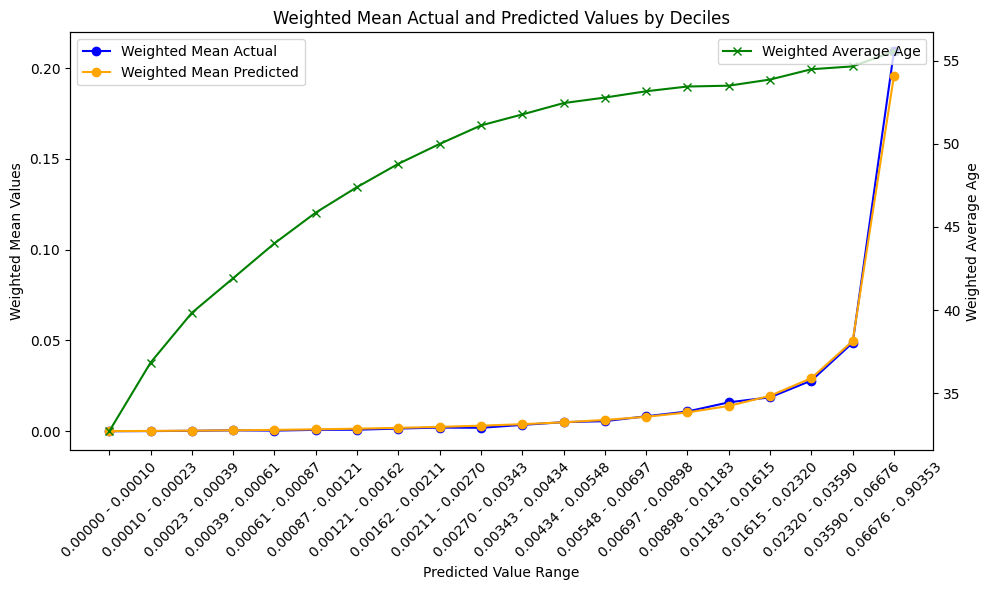

In [45]:
ages_original = age_test_tensor.numpy().flatten()
actual = y_test_tensor.numpy().flatten()
predicted = np.round(y_pred, 10)
weights2 = lives_exposure_test_tensor.numpy().flatten()

df_lift = pd.DataFrame(
    {
        "actual": actual,
        "predicted": predicted,
        "weights": weights2,
        "Age": ages_original,
    }
)
df_lift = df_lift.sort_values(by="predicted", ascending=False)


df_lift["decile"] = pd.qcut(df_lift["predicted"], 20, labels=False)


def weighted_mean(group):
    return pd.Series(
        {
            "weighted_actual": np.average(group["actual"], weights=group["weights"]),
            "weighted_predicted": np.average(
                group["predicted"], weights=group["weights"]
            ),
            "weighted_age": np.average(group["Age"]),  # , weights=group["weights"]),
            "range": f"{group['predicted'].min():.5f} - {group['predicted'].max():.5f}",
        }
    )


# Calculate weighted means for each decile
decile_summary = df_lift.groupby("decile").apply(weighted_mean)

# Plot the weighted mean actual and predicted values for each decile
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(
    decile_summary["weighted_actual"],
    label="Weighted Mean Actual",
    color="blue",
    marker="o",
)
ax1.plot(
    decile_summary["weighted_predicted"],
    label="Weighted Mean Predicted",
    color="orange",
    marker="o",
)
ax1.set_xlabel("Predicted Value Range")
ax1.set_ylabel("Weighted Mean Values")
ax1.set_title("Weighted Mean Actual and Predicted Values by Deciles")
ax1.set_xticks(ticks=range(20))
ax1.set_xticklabels(decile_summary["range"], rotation=45)
ax1.legend(loc="upper left")

# Create a secondary y-axis to plot the weighted average age
ax2 = ax1.twinx()
ax2.plot(
    decile_summary["weighted_age"],
    label="Weighted Average Age",
    color="green",
    marker="x",
)
ax2.set_ylabel("Weighted Average Age")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1235205537.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.10101010101010101' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_temp.iloc[:, feature_index] = val
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1235205537.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.20202020202020202' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_temp.iloc[:, feature_index] = val
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1235205537.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.30303030303030304' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_temp.iloc[:, feature_index] = val
C

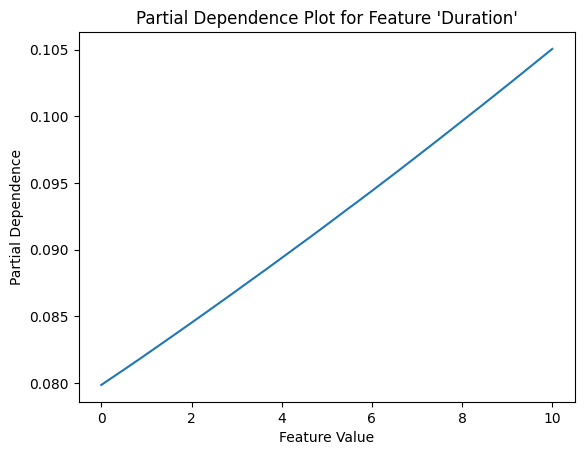

In [46]:
feature_index = X_train.columns.get_loc("Duration")
grid_values = np.linspace(
    X_train.iloc[:, feature_index].min(), X_train.iloc[:, feature_index].max(), 100
)

partial_dependence = []
for val in grid_values:
    X_temp = X_train.copy()
    X_temp.iloc[:, feature_index] = val
    X_temp_scaled = scaler.transform(X_temp)

    model.eval()
    with torch.no_grad():
        poisson_outputs, zero_inflation_outputs = model(
            torch.tensor(X_temp_scaled, dtype=torch.float32),
            lives_exposure_train_tensor,
        )
        y_pred_poisson = poisson_outputs.numpy().flatten()
        y_pred_bernoulli = zero_inflation_outputs.numpy().flatten()
        y_pred = y_pred_poisson * (1 - y_pred_bernoulli)

        weights = lives_exposure_train_tensor.numpy().flatten()
        weighted_avg = sum(y_pred * weights) / sum(weights)
        partial_dependence.append(weighted_avg.item())

# Plot the partial dependence
plt.plot(grid_values, partial_dependence)
plt.xlabel("Feature Value")
plt.ylabel("Partial Dependence")
plt.title(f"Partial Dependence Plot for Feature '{X_train.columns[feature_index]}'")
plt.show()

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\2807801701.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '18.67676767676768' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_temp.iloc[:, feature_index] = val
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\2807801701.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '19.353535353535353' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_temp.iloc[:, feature_index] = val
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\2807801701.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '20.03030303030303' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_temp.iloc[:, feature_index] = val
C:\

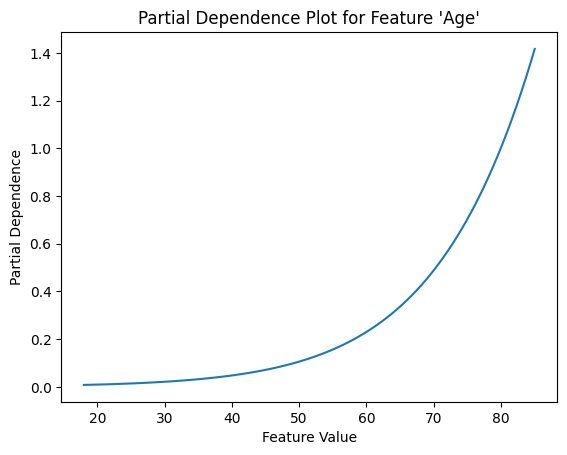

In [47]:
feature_index = X_train.columns.get_loc("Age")
feature_index2 = X_train.columns.get_loc("Age2")
grid_values = np.linspace(
    X_train.iloc[:, feature_index].min(), X_train.iloc[:, feature_index].max(), 100
)

partial_dependence = []
for val in grid_values:
    X_temp = X_train.copy()
    X_temp.iloc[:, feature_index] = val
    X_temp.iloc[:, feature_index2] = (
        age_multiplier * np.maximum(val - age_cut, 0) ** age_power
    )
    X_temp_scaled = scaler.transform(X_temp)

    model.eval()
    with torch.no_grad():
        poisson_outputs, zero_inflation_outputs = model(
            torch.tensor(X_temp_scaled, dtype=torch.float32),
            lives_exposure_train_tensor,
        )
        y_pred_poisson = poisson_outputs.numpy().flatten()
        y_pred_bernoulli = zero_inflation_outputs.numpy().flatten()
        y_pred = y_pred_poisson * (1 - y_pred_bernoulli)

        weights = lives_exposure_train_tensor.numpy().flatten()
        weighted_avg = sum(y_pred * weights) / sum(weights)
        partial_dependence.append(weighted_avg.item())


# Plot the partial dependence
plt.plot(grid_values, partial_dependence)
plt.xlabel("Feature Value")
plt.ylabel("Partial Dependence")
plt.title("Partial Dependence Plot for Feature 'Age'")
plt.show()

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1567329274.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '21.526315789473685' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_temp.iloc[:, feature_index_age] = val_age
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1567329274.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '25.05263157894737' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_temp.iloc[:, feature_index_age] = val_age
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1567329274.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '28.57894736842105' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_temp.iloc[:, feature_

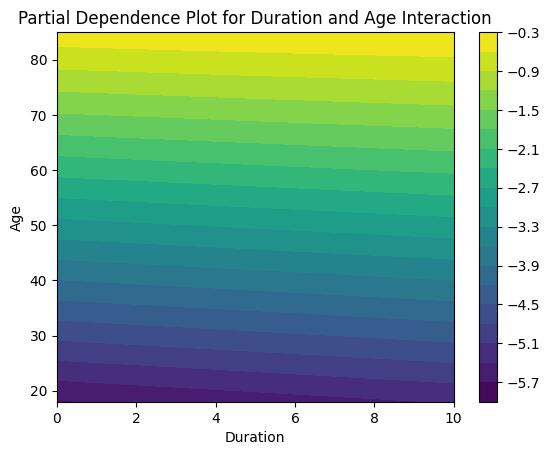

In [48]:
feature_index_duration = X_train.columns.get_loc("Duration")
feature_index_age = X_train.columns.get_loc("Age")
feature_index_age2 = X_train.columns.get_loc("Age2")

# Create a grid of values for Duration and Age
grid_values_duration = np.linspace(
    X_train.iloc[:, feature_index_duration].min(),
    X_train.iloc[:, feature_index_duration].max(),
    20,
)
grid_values_age = np.linspace(
    X_train.iloc[:, feature_index_age].min(),
    X_train.iloc[:, feature_index_age].max(),
    20,
)

# Initialize an array to store partial dependence values
partial_dependence = np.zeros((len(grid_values_duration), len(grid_values_age)))

# Compute partial dependence values
for i, val_duration in enumerate(grid_values_duration):
    for j, val_age in enumerate(grid_values_age):
        X_temp = X_train.copy()
        X_temp.iloc[:, feature_index_duration] = val_duration
        X_temp.iloc[:, feature_index_age] = val_age
        X_temp.iloc[:, feature_index_age2] = age_multiplier * (
            np.maximum(val_age - age_cut, 0) ** age_power
        )
        X_temp_scaled = scaler.transform(X_temp)

        model.eval()
        with torch.no_grad():
            poisson_outputs, zero_inflation_outputs = model(
                torch.tensor(X_temp_scaled, dtype=torch.float32),
                lives_exposure_train_tensor,
            )
            y_pred_poisson = poisson_outputs.numpy().flatten()
            y_pred_bernoulli = zero_inflation_outputs.numpy().flatten()
            y_pred = y_pred_poisson * (1 - y_pred_bernoulli)

            # y_pred_rate = y_pred / lives_exposure_train_tensor.numpy().flatten()
            weights = lives_exposure_train_tensor.numpy().flatten()
            weighted_avg = np.sum(np.log(y_pred + 1e-6) * weights) / np.sum(weights)
            partial_dependence[i, j] = weighted_avg

# Plot the partial dependence
X, Y = np.meshgrid(grid_values_duration, grid_values_age)
plt.contourf(X, Y, partial_dependence.T, levels=20, cmap="viridis")
plt.colorbar()
plt.xlabel("Duration")
plt.ylabel("Age")
plt.title("Partial Dependence Plot for Duration and Age Interaction")
plt.show()

##### Model with intreaction layer and intialisig the ZIP model weights with the poisson model 

####train with earlier best parameters

In [49]:
class InteractionLayer(nn.Module):
    def __init__(self, age_idx, feature_indices, additional_interactions):
        super(InteractionLayer, self).__init__()
        self.age_idx = age_idx
        self.feature_indices = feature_indices
        self.additional_interactions = additional_interactions

    def forward(self, x):
        age_feature = x[:, self.age_idx].unsqueeze(1)
        interaction_terms = []

        # Original interactions with Age
        for idx in self.feature_indices:
            interaction_term = age_feature * x[:, idx].unsqueeze(1)
            interaction_terms.append(interaction_term)

        # Additional specified interactions
        for idx1, idx2 in self.additional_interactions:
            interaction_term = x[:, idx1].unsqueeze(1) * x[:, idx2].unsqueeze(1)
            interaction_terms.append(interaction_term)

        interaction_terms_combined = torch.cat(interaction_terms, dim=1)
        return interaction_terms_combined


class Poisson_Net(nn.Module):
    def __init__(self, age_idx, feature_indices, additional_interactions):
        super(Poisson_Net, self).__init__()

        # Define the interaction layer
        self.interaction_layer = InteractionLayer(
            age_idx, feature_indices, additional_interactions
        )

        # Define the fully connected layers
        interaction_input_size = len(feature_indices) + len(additional_interactions)
        self.fc2 = nn.Linear(
            len(X_train_scaled.columns) + interaction_input_size, 1
        )  # Include original features and interaction terms

    def forward(self, x, exposure):
        # Create interaction terms using the interaction layer
        interaction_terms = self.interaction_layer(x)

        # Concatenate the original features with interaction terms
        x_combined = torch.cat((x, interaction_terms), dim=1)

        # Final fully connected layer for Poisson part
        linear_output = self.fc2(x_combined)

        # Adding the log of the exposure as an offset
        offset_output = linear_output + torch.log(exposure)

        # Apply exponential activation for the Poisson part
        poisson_output = torch.exp(offset_output)

        return poisson_output


class Mort_Net_ZIP(nn.Module):
    def __init__(self):
        super(Mort_Net_ZIP, self).__init__()

        # Identify the indices of the specific columns
        self.age_idx = X_train_scaled.columns.get_loc("Age")
        self.feature_indices = [
            X_train_scaled.columns.get_loc(col)
            for col in X_train_scaled.columns
            if col.startswith("Duration")
            or col.startswith("SmokerStatus")
            or col.startswith("ProductCategory")
            or col.startswith("SumAssuredBand")
            or col.startswith("DistributionChannel")
        ]

        # Additional interactions for all columns starting with SumAssuredBand and ProductCategory
        sum_assured_band_indices = [
            X_train_scaled.columns.get_loc(col)
            for col in X_train_scaled.columns
            if col.startswith("SumAssuredBand")
        ]
        product_category_indices = [
            X_train_scaled.columns.get_loc(col)
            for col in X_train_scaled.columns
            if col.startswith("ProductCategory")
        ]
        self.additional_interactions = [
            (
                X_train_scaled.columns.get_loc("Gender_M"),
                X_train_scaled.columns.get_loc("SmokerStatus_S"),
            )
        ] + [
            (X_train_scaled.columns.get_loc("SmokerStatus_S"), idx)
            for idx in sum_assured_band_indices + product_category_indices
        ]

        # Define the interaction layer
        self.interaction_layer = InteractionLayer(
            self.age_idx, self.feature_indices, self.additional_interactions
        )

        # Define the fully connected layers
        interaction_input_size = len(self.feature_indices) + len(
            self.additional_interactions
        )
        self.fc2 = nn.Linear(
            len(X_train_scaled.columns) + interaction_input_size, 1
        )  # Include original features and interaction terms

        # Additional layer for zero inflation
        self.fc_zero_inflation = nn.Linear(
            len(X_train_scaled.columns) + interaction_input_size, 1
        )

    def forward(self, x, exposure):
        # Create interaction terms using the interaction layer
        interaction_terms = self.interaction_layer(x)

        # Concatenate the original features with interaction terms
        x_combined = torch.cat((x, interaction_terms), dim=1)

        # Final fully connected layer for Poisson part
        linear_output = self.fc2(x_combined)

        # Adding the log of the exposure as an offset
        offset_output = linear_output + torch.log(exposure)

        # Apply exponential activation for the Poisson part
        poisson_output = torch.exp(offset_output)

        # Zero inflation part
        zero_inflation_output = torch.sigmoid(self.fc_zero_inflation(x_combined))

        return poisson_output, zero_inflation_output


# Initialize the full model
model = Mort_Net_ZIP()

# Initialize the Poisson model with the same parameters as Mort_Net_ZIP
poisson_model = Poisson_Net(
    age_idx=model.age_idx,
    feature_indices=model.feature_indices,
    additional_interactions=model.additional_interactions,
)
optimizer_poisson = optim.Adam(
    poisson_model.parameters(), lr=lr, weight_decay=weight_decay
)

for epoch in range(int(num_epochs / 100.25)):  # Train for half the total epochs
    optimizer_poisson.zero_grad()
    poisson_outputs = poisson_model(X_train_tensor, lives_exposure_train_tensor)
    poisson_loss = weighted_poisson_loss(
        poisson_outputs, y_train_tensor, lives_exposure_train_tensor
    )
    total_loss = poisson_loss + l1_loss(poisson_model, lambda_l1=lambda_l1)
    total_loss.backward()
    optimizer_poisson.step()

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}, Poisson Loss: {total_loss.item()}")

# Copy weights from the trained Poisson model to the full model
model.fc2.weight.data = poisson_model.fc2.weight.data.clone()
model.fc2.bias.data = poisson_model.fc2.bias.data.clone()

optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)


def joint_loss(poisson_output, zero_inflation_output, y_true, exposure):
    poisson_loss = weighted_poisson_loss(poisson_output, y_true, exposure)
    bernoulli_loss = weighted_bernoulli_loss(
        zero_inflation_output, (y_true == 0).float(), exposure
    )

    # Transform Poisson outputs to uniform marginals using Poisson CDF
    uniform_poisson = poisson.cdf(
        poisson_output.detach().numpy(), mu=poisson_output.detach().numpy()
    )

    # Transform Bernoulli outputs to uniform marginals using Bernoulli CDF
    uniform_bernoulli = bernoulli.cdf(
        zero_inflation_output.detach().numpy(),
        p=zero_inflation_output.detach().numpy(),
    )
    uniform_poisson = np.clip(uniform_poisson, 1e-6, 1 - 1e-6)
    uniform_bernoulli = np.clip(uniform_bernoulli, 1e-6, 1 - 1e-6)
    # Create a two-dimensional dataset for copula fitting
    copula_data = np.column_stack(
        (uniform_poisson.flatten(), uniform_bernoulli.flatten())
    )

    # Fit the Frank copula to the data
    frank_copula = Frank()
    frank_copula.fit(copula_data)

    pdf_values = frank_copula.probability_density(copula_data)

    loss_ll = poisson_loss + bernoulli_loss
    n_log_likelihood_copula_weighted = -np.sum(
        np.log(pdf_values) * exposure.detach().numpy().flatten()
    ) / np.sum(exposure.detach().numpy().flatten())

    return loss_ll + n_log_likelihood_copula_weighted


for epoch in range(
    int(num_epochs / 100.25), num_epochs
):  # Continue training for the remaining epochs
    optimizer.zero_grad()
    poisson_outputs, zero_inflation_outputs = model(
        X_train_tensor, lives_exposure_train_tensor
    )
    loss = joint_loss(
        poisson_outputs,
        zero_inflation_outputs,
        y_train_tensor,
        lives_exposure_train_tensor,
    )
    l1_reg = l1_loss(model, lambda_l1=lambda_l1)
    total_loss = loss + l1_reg
    total_loss.backward()
    optimizer.step()

    if (epoch + 1) % 20 == 0:
        print(
            f"Epoch {epoch+1}, Joint Loss: {loss.item()}, Total Loss: {total_loss.item()}"
        )

c:\Users\u013709\.conda\envs\CancerRisk\lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)


Epoch 20, Joint Loss: 26.655561447143555, Total Loss: 28.385461807250977
Epoch 40, Joint Loss: 9.91460132598877, Total Loss: 11.455955505371094
Epoch 60, Joint Loss: 8.682849884033203, Total Loss: 10.055793762207031
Epoch 80, Joint Loss: 8.085976600646973, Total Loss: 9.34760570526123
Epoch 100, Joint Loss: 7.883315563201904, Total Loss: 9.113468170166016
Epoch 120, Joint Loss: 7.7265119552612305, Total Loss: 8.95411491394043
Epoch 140, Joint Loss: 7.6338300704956055, Total Loss: 8.848848342895508
Epoch 160, Joint Loss: 7.5354084968566895, Total Loss: 8.747712135314941
Epoch 180, Joint Loss: 7.478111267089844, Total Loss: 8.669814109802246
Epoch 200, Joint Loss: 7.4226226806640625, Total Loss: 8.611894607543945
Epoch 220, Joint Loss: 7.376440525054932, Total Loss: 8.561470985412598
Epoch 240, Joint Loss: 7.337835311889648, Total Loss: 8.5225830078125
Epoch 260, Joint Loss: 7.29965877532959, Total Loss: 8.461372375488281
Epoch 280, Joint Loss: 7.267460346221924, Total Loss: 8.4401197433

In [50]:
X_train_scaled.columns

Index(['Age', 'Duration', 'CalendarYear', 'ProductCategory_Other', 'Gender_M',
       'SmokerStatus_S', 'DistributionChannel_U', 'JointLifeStatus_S',
       'SumAssuredBand_£25001-£75000', 'SumAssuredBand_£75001-£125000',
       'Age2'],
      dtype='object')

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\2162418760.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  decile_summary = df_lift.groupby("decile").apply(weighted_mean)


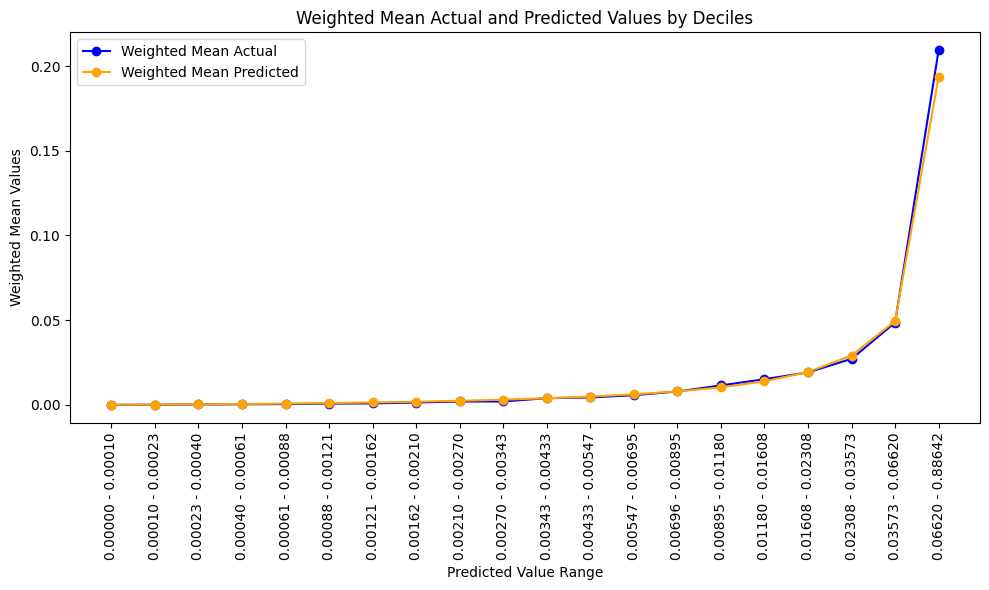

poisson deviance: 24975.359375  psuedo R2 =0.3318514823913574
fc2.weight: tensor([[ 1.1194e+00,  1.1433e-01,  9.4997e-03,  7.4722e-04,  4.4081e-02,
          3.4344e-01,  5.8260e-03,  1.5359e-02,  1.2700e-03,  5.6356e-03,
          3.5154e-03, -1.2133e-03,  6.0590e-03,  1.4517e-03, -3.7284e-03,
          1.7794e-03, -5.8046e-03, -5.5519e-03, -2.1214e-04, -6.2654e-04,
         -3.6612e-03]])
fc2.bias: tensor([-6.7856])
fc_zero_inflation.weight: tensor([[ 0.5923,  0.1668, -0.0092, -0.0125,  0.0544, -0.0861, -0.0375,  0.0092,
          0.0012,  0.0163, -0.0288, -0.0035,  0.0263, -0.0362, -0.0119, -0.0242,
         -0.0312,  0.0028,  0.0256,  0.0167, -0.0174]])
fc_zero_inflation.bias: tensor([-2.3188])


In [51]:
model.eval()
with torch.no_grad():
    poisson_outputs, zero_inflation_outputs = model(
        X_test_tensor, lives_exposure_test_tensor
    )
    y_pred_poisson = poisson_outputs.numpy().flatten()
    y_pred_bernoulli = zero_inflation_outputs.numpy().flatten()

# Combine the Poisson and Bernoulli outputs to get the final predictions
y_pred = y_pred_poisson * (1 - y_pred_bernoulli)

# Flatten the actual values and weights
actual = y_test_tensor.numpy().flatten()
predicted = np.round(y_pred, 6)
weights = lives_exposure_test_tensor.numpy().flatten()
# Create a DataFrame for lift analysis
df_lift = pd.DataFrame({"actual": actual, "predicted": predicted, "weights": weights})
df_lift = df_lift.sort_values(by="predicted", ascending=False)
# df_lift["Age"] = X_test_scaled["Age"]
# Create deciles
df_lift["decile"] = pd.qcut(df_lift["predicted"], 20, labels=False)


def weighted_mean(group):
    return pd.Series(
        {
            "weighted_actual": np.average(group["actual"], weights=group["weights"]),
            "weighted_predicted": np.average(
                group["predicted"], weights=group["weights"]
            ),
            "range": f"{group['predicted'].min():.5f} - {group['predicted'].max():.5f}",
        }
    )


# Calculate weighted means for each decile
decile_summary = df_lift.groupby("decile").apply(weighted_mean)

# Plot the weighted mean actual and predicted values for each decile
plt.figure(figsize=(10, 6))
plt.plot(
    decile_summary["weighted_actual"],
    label="Weighted Mean Actual",
    color="blue",
    marker="o",
)
plt.plot(
    decile_summary["weighted_predicted"],
    label="Weighted Mean Predicted",
    color="orange",
    marker="o",
)
plt.xlabel("Predicted Value Range")
plt.ylabel("Weighted Mean Values")
plt.title("Weighted Mean Actual and Predicted Values by Deciles")
plt.xticks(ticks=range(20), labels=decile_summary["range"], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

actual = actual + 1e-8
mean_target = np.mean(actual)
null_deviance = 2 * sum(actual * np.log(actual / mean_target) - (actual - mean_target))
model_deviance = 2 * sum(actual * np.log(actual / y_pred) - (actual - y_pred))
poisson_deviance = null_deviance - model_deviance
print(
    f"poisson deviance: {poisson_deviance}  psuedo R2 ={ 1- model_deviance/null_deviance}"
)

weights = model.state_dict()
for layer_name, weight in weights.items():
    print(f"{layer_name}: {weight}")

[I 2024-12-10 07:37:08,030] A new study created in memory with name: no-name-0dd24b16-2149-4cfc-8df7-ca8ac354aeca
c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-10 08:14:26,184] Trial 0 finished with value: 0.26679527759552 and parameters: {}. Best is trial 0 with value: 0.26679527759552.


Test Poisson Loss: Joint Loss: 6.950796127319336, Total Loss: 8.113880157470703
Mean Pseudo_R2: 0.2668
best_trial_params {'saturated_r2': 0.26679527759552}


[I 2024-12-10 08:14:27,006] A new study created in memory with name: no-name-a5903737-708c-4467-8a9a-8229fee005cb
c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-10 09:01:35,029] Trial 0 finished with value: 0.15898549556732178 and parameters: {}. Best is trial 0 with value: 0.15898549556732178.
[I 2024-12-10 09:01:35,091] A new study created in memory with name: no-name-8f683360-f881-4603-98aa-b9e5bdc71dfc


Test Poisson Loss: Joint Loss: 7.8421630859375, Total Loss: 8.903398513793945
Mean Pseudo_R2: 0.1590
trial params{}


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-10 09:43:05,598] Trial 0 finished with value: 0.2620581388473511 and parameters: {}. Best is trial 0 with value: 0.2620581388473511.


Test Poisson Loss: Joint Loss: 6.974929332733154, Total Loss: 8.116217613220215
Mean Pseudo_R2: 0.2621
trial params{}


[I 2024-12-10 09:43:06,172] A new study created in memory with name: no-name-2c28602f-be90-4345-a5b9-5f84ffdeb353
c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-10 10:36:41,672] Trial 0 finished with value: 0.26658856868743896 and parameters: {}. Best is trial 0 with value: 0.26658856868743896.


Test Poisson Loss: Joint Loss: 6.940126419067383, Total Loss: 8.088693618774414
Mean Pseudo_R2: 0.2666
trial params{}


[I 2024-12-10 10:36:41,820] A new study created in memory with name: no-name-5f3d7241-6677-4055-88a1-1402ca964016
c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-10 11:39:50,756] Trial 0 finished with value: 0.26655638217926025 and parameters: {}. Best is trial 0 with value: 0.26655638217926025.


Test Poisson Loss: Joint Loss: 6.9780120849609375, Total Loss: 8.121893882751465
Mean Pseudo_R2: 0.2666
trial params{}


[I 2024-12-10 11:39:51,407] A new study created in memory with name: no-name-174b5071-4e71-4d7d-beaf-f4ef70c93f74
c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-10 13:53:50,420] Trial 0 finished with value: 0.2657355070114136 and parameters: {}. Best is trial 0 with value: 0.2657355070114136.


Test Poisson Loss: Joint Loss: 6.958265781402588, Total Loss: 8.107759475708008
Mean Pseudo_R2: 0.2657
trial params{}


[I 2024-12-10 13:53:50,582] A new study created in memory with name: no-name-7bebb330-e844-4626-a08b-9dc29b0ced17
c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-10 14:27:33,248] Trial 0 finished with value: 0.2586001753807068 and parameters: {}. Best is trial 0 with value: 0.2586001753807068.


Test Poisson Loss: Joint Loss: 6.990913391113281, Total Loss: 8.146965026855469
Mean Pseudo_R2: 0.2586
trial params{}


[I 2024-12-10 14:27:33,411] A new study created in memory with name: no-name-fecc6e84-456b-43d7-b583-7f9bb125ee57
c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-10 15:12:53,175] Trial 0 finished with value: 0.2664862275123596 and parameters: {}. Best is trial 0 with value: 0.2664862275123596.


Test Poisson Loss: Joint Loss: 6.940639495849609, Total Loss: 8.109162330627441
Mean Pseudo_R2: 0.2665
trial params{}


[I 2024-12-10 15:12:53,744] A new study created in memory with name: no-name-0972356e-2e29-4d24-a5d6-1c4a1c91ae2e
c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-10 16:08:37,097] Trial 0 finished with value: 0.26541686058044434 and parameters: {}. Best is trial 0 with value: 0.26541686058044434.


Test Poisson Loss: Joint Loss: 6.952104568481445, Total Loss: 8.10431957244873
Mean Pseudo_R2: 0.2654
trial params{}


[I 2024-12-10 16:08:37,346] A new study created in memory with name: no-name-4148e8ef-b628-4329-a619-3b4ee6cb6bcc
c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-10 16:58:20,406] Trial 0 finished with value: 0.2665410041809082 and parameters: {}. Best is trial 0 with value: 0.2665410041809082.


Test Poisson Loss: Joint Loss: 6.944555282592773, Total Loss: 8.096923828125
Mean Pseudo_R2: 0.2665
trial params{}


[I 2024-12-10 16:58:21,069] A new study created in memory with name: no-name-71cf7200-a4cd-452d-91ca-8303262a292d
c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-11 08:17:56,239] Trial 0 finished with value: 0.266459584236145 and parameters: {}. Best is trial 0 with value: 0.266459584236145.


Test Poisson Loss: Joint Loss: 6.949779510498047, Total Loss: 8.110074996948242
Mean Pseudo_R2: 0.2665
trial params{}


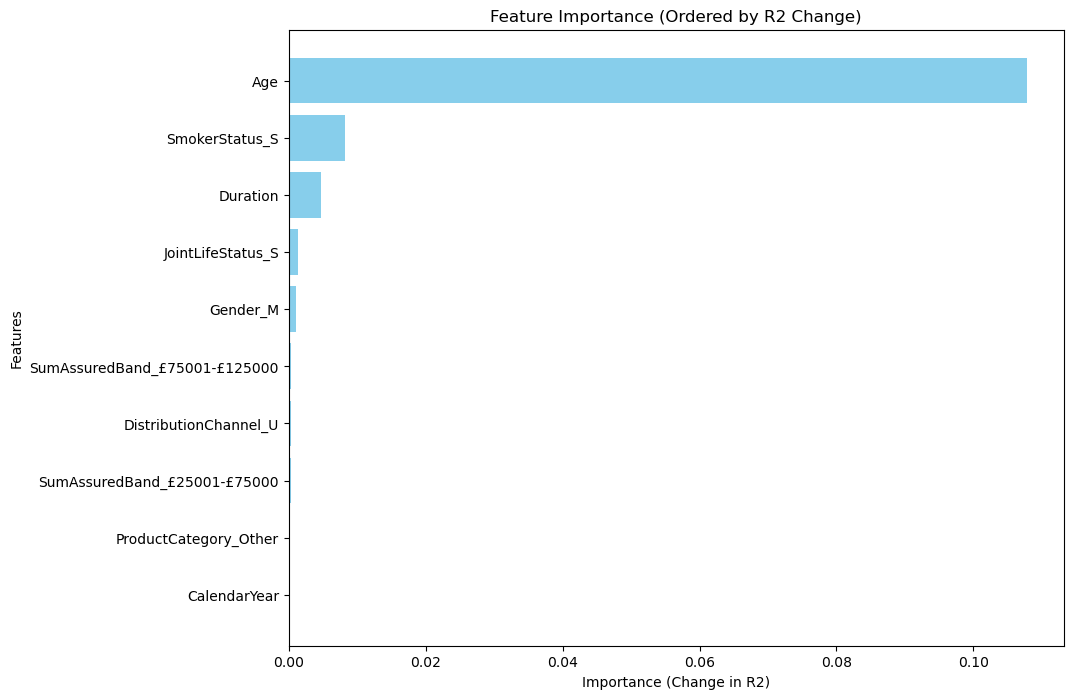

In [96]:
import optuna


def objective(trial, features, df, best_trial_params=None):
    best_trial_params = {
        "lr": 0.18636853215485796,
        "weight_decay": 1.178832278553321e-05,
        "num_epochs": 938,
        "lambda_l1": 0.09532607373570341,
        "age_cut": 89,
        "age_power": 4.012759717541797,
        "age_multiplier": 0,
    }
    if best_trial_params is None:
        lr = trial.suggest_float("lr", 1e-3, 2e-1, log=True)
        weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)
        num_epochs = trial.suggest_int("num_epochs", 5, 1200)
        lambda_l1 = trial.suggest_float("lambda_l1", 1e-5, 1e-1, log=True)
        age_cut = trial.suggest_int("age_cut", 20, 90)
        age_power = trial.suggest_float("age_power", 1.1, 5)
        age_multiplier = trial.suggest_int("age_multiplier", 0, 1)
    else:
        lr = best_trial_params["lr"]
        weight_decay = best_trial_params["weight_decay"]
        num_epochs = best_trial_params["num_epochs"]
        lambda_l1 = best_trial_params["lambda_l1"]
        age_cut = best_trial_params["age_cut"]
        age_power = best_trial_params["age_power"]
        age_multiplier = best_trial_params["age_multiplier"]

    pseudo_r2_scores = []

    for fold in range(1, 2):
        df["Age2"] = age_multiplier * np.maximum(df["Age"] - age_cut, 0) ** age_power
        df["LivesExposure"] = df["LivesExposure"].clip(lower=1e-6)
        train_df = df[df["holdout"] == 0]
        test_df = df[~(df["holdout"] == 0)]

        train_lives_exposure = train_df["LivesExposure"]
        test_lives_exposure = test_df["LivesExposure"]

        if "Age2" not in features:
            features.append("Age2")

        X_train = train_df[features]
        y_train = train_df["IncurredClaims"]
        X_test = test_df[features]
        y_test = test_df["IncurredClaims"]

        scaler = StandardScaler()
        X_train_scaled = pd.DataFrame(
            scaler.fit_transform(X_train), columns=X_train.columns
        )
        X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

        X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
        X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
        y_train_tensor = torch.tensor(
            y_train.values.reshape(-1, 1), dtype=torch.float32
        )
        y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)
        lives_exposure_train_tensor = torch.tensor(
            train_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
        )
        lives_exposure_test_tensor = torch.tensor(
            test_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
        )

        # Initialize the full model to get the indices
        zip_model = Mort_Net_ZIP()
        age_idx = zip_model.age_idx
        feature_indices = zip_model.feature_indices
        additional_interactions = zip_model.additional_interactions

        # Initialize the Poisson model with the same parameters as Mort_Net_ZIP
        poisson_model = Poisson_Net(
            age_idx=age_idx,
            feature_indices=feature_indices,
            additional_interactions=additional_interactions,
        )

        # Define the optimizer
        optimizer_poisson = optim.Adam(
            poisson_model.parameters(), lr=lr, weight_decay=weight_decay
        )
        optimizer_zip = optim.Adam(
            zip_model.parameters(), lr=lr, weight_decay=weight_decay
        )

        # Training loop for Poisson_Net (half the total epochs)
        for epoch in range(int(num_epochs / 100.25)):
            optimizer_poisson.zero_grad()
            poisson_outputs = poisson_model(X_train_tensor, lives_exposure_train_tensor)

            # Calculate Poisson loss
            poisson_loss = weighted_poisson_loss(
                poisson_outputs, y_train_tensor, lives_exposure_train_tensor
            )
            l1_reg = l1_loss(poisson_model, lambda_l1=lambda_l1)
            total_loss = poisson_loss + l1_reg
            total_loss.backward()
            optimizer_poisson.step()

        # Copy weights from Poisson_Net to Mort_Net_ZIP
        zip_model.fc2.weight.data = poisson_model.fc2.weight.data.clone()
        zip_model.fc2.bias.data = poisson_model.fc2.bias.data.clone()

        # Training loop for Mort_Net_ZIP (remaining epochs)
        for epoch in range(int(num_epochs / 100.25), num_epochs):
            optimizer_zip.zero_grad()
            poisson_outputs, zero_inflation_outputs = zip_model(
                X_train_tensor, lives_exposure_train_tensor
            )

            # Calculate losses
            loss = joint_loss(
                poisson_outputs,
                zero_inflation_outputs,
                y_train_tensor,
                lives_exposure_train_tensor,
            )
            l1_reg = l1_loss(zip_model, lambda_l1=lambda_l1)
            total_loss = loss + l1_reg
            total_loss.backward()
            optimizer_zip.step()

        # Evaluation for Mort_Net_ZIP
        zip_model.eval()
        with torch.no_grad():
            poisson_outputs, zero_inflation_outputs = zip_model(
                X_test_tensor, lives_exposure_test_tensor
            )
            loss = joint_loss(
                poisson_outputs,
                zero_inflation_outputs,
                y_test_tensor,
                lives_exposure_test_tensor,
            )
            l1_reg = l1_loss(zip_model, lambda_l1=lambda_l1)
            total_loss = loss + l1_reg

            print(
                f"Test Poisson Loss: Joint Loss: {loss.item()}, Total Loss: {total_loss.item()}"
            )

            y_pred = poisson_outputs * (1 - zero_inflation_outputs)
            y_test_tensor = y_test_tensor + 1e-8
            weighted_mean_target = torch.sum(
                y_test_tensor * lives_exposure_test_tensor
            ) / torch.sum(lives_exposure_test_tensor)
            null_deviance = 2 * torch.sum(
                lives_exposure_test_tensor
                * (
                    y_test_tensor * torch.log(y_test_tensor / weighted_mean_target)
                    - (y_test_tensor - weighted_mean_target)
                )
            )
            model_deviance = 2 * torch.sum(
                lives_exposure_test_tensor
                * (
                    y_test_tensor * torch.log(y_test_tensor / y_pred)
                    - (y_test_tensor - y_pred)
                )
            )
            pseudo_r2 = 1 - (model_deviance / null_deviance)
            pseudo_r2_scores.append(pseudo_r2.item())

    mean_pseudo_r2 = np.mean(pseudo_r2_scores)
    print(f"Mean Pseudo_R2: {mean_pseudo_r2:.4f}")
    return mean_pseudo_r2


# Initial set of features
features = combined_df_encoded.columns.tolist()
features.remove("IncurredClaims")
features.remove("LivesExposure")
features.remove("Actual_deaths_lives")
features.remove("holdout")
features.remove("random_fold")
features.remove("CommencementYear")
exclude_features = [
    "DistributionChannel_I",
    "DistributionChannel_M",
    "DistributionChannel_N",
    "DistributionChannel_S",
    # "DistributionChannel_U",
    "SumAssuredBand_£125001-£250000",
    "SumAssuredBand_£250001+",
    # "SumAssuredBand_£25001-£75000",
    # "SumAssuredBand_£75001-£125000",
    # "Duration",
    "ProductCategory_Level",
    # "ProductCategory_Other",
    "ProductCategory_Term Other",
]
features = [feature for feature in features if feature not in exclude_features]
df = combined_df_encoded.drop(columns=exclude_features, axis=1)
# Determine the best parameters using Optuna to maximize R2 score of deciles
study_ZIP = optuna.create_study(direction="maximize")
study_ZIP.optimize(
    lambda trial: objective(trial, features, df.sample(frac=0.6, random_state=1)),
    n_trials=1,
)

best_trial = study_ZIP.best_trial
best_trial_params = best_trial.params
best_trial_params["saturated_r2"] = best_trial.value
print(f"best_trial_params {best_trial_params}")
# Evaluate feature importance using the best parameters


def evaluate_feature_importance(df, features, best_trial_params):
    feature_importances = {}

    one_hot_groups = {
        "ProductCategory": [
            "ProductCategory_Level",
            "ProductCategory_Other",
            "ProductCategory_Term Other",
        ],
        "Gender": ["Gender_M"],
        "SmokerStatus": ["SmokerStatus_S"],
        "DistributionChannel": [
            "DistributionChannel_I",
            "DistributionChannel_M",
            "DistributionChannel_N",
            "DistributionChannel_S",
            "DistributionChannel_U",
        ],
        "JointLifeStatus": ["JointLifeStatus_S"],
        "SumAssuredBand": [
            "SumAssuredBand_£125001-£250000",
            "SumAssuredBand_£250001+",
            "SumAssuredBand_£25001-£75000",
            "SumAssuredBand_£75001-£125000",
        ],
    }

    for feature in features:
        if feature == "Age2":
            continue

        df_copy = df.copy()

        group_found = False
        for group, group_features in one_hot_groups.items():
            if feature in group_features:
                group_found = True
                for gf in group_features:
                    if gf == feature:
                        df_copy[gf] = 1
                    else:
                        df_copy[gf] = 0
                break

        if not group_found:
            if feature not in ("Age", "Duration", "CalendarYear"):
                df_copy[feature] = df_copy[feature].mode()[0]
            else:
                df_copy[feature] = df_copy[feature].mean()

        study = optuna.create_study(direction="maximize")
        study.optimize(
            lambda trial: objective(trial, features, df_copy, best_trial_params),
            n_trials=1,
        )
        best_trial = study.best_trial
        print(f"trial params{study.best_params}")
        current_r2 = best_trial.value
        feature_importances[feature] = best_trial_params["saturated_r2"] - current_r2

    return feature_importances


feature_importances = evaluate_feature_importance(
    df.sample(frac=0.6, random_state=1),
    features,
    best_trial_params,
)

sorted_features = sorted(feature_importances, key=feature_importances.get, reverse=True)
sorted_importances = [feature_importances[feature] for feature in sorted_features]

plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importances, color="skyblue")
plt.xlabel("Importance (Change in R2)")
plt.ylabel("Features")
plt.title("Feature Importance (Ordered by R2 Change)")
plt.gca().invert_yaxis()
plt.show()

##### rerun with different feature set

In [52]:
df = combined_df_encoded.copy()
check_independence(df)

other_best_params = {
    "lr": 0.18636853215485796,
    "weight_decay": 1.178832278553321e-05,
    "num_epochs": 938,
    "lambda_l1": 0.09532607373570341,
    "age_cut": 89,
    "age_power": 4.012759717541797,
    "age_multiplier": 0,
}

age_cut = other_best_params["age_cut"]  # 50
age_power = other_best_params["age_power"]  # 4.133448889716881  #
weight_decay = other_best_params["weight_decay"]  # 1.0441166112064366e-05
num_epochs = other_best_params["num_epochs"]  # 680
lambda_l1 = other_best_params["lambda_l1"]
lr = other_best_params["lr"]
age_multiplier = other_best_params["age_multiplier"]
print("using other params")

exclude_features = [
    "DistributionChannel_I",
    "DistributionChannel_M",
    # "DistributionChannel_N",
    # "DistributionChannel_S",
    # "DistributionChannel_U",
    # "SumAssuredBand_£125001-£250000",
    "SumAssuredBand_£250001+",
    # "SumAssuredBand_£25001-£75000",
    # "SumAssuredBand_£75001-£125000",
    # "Duration",
    # "ProductCategory_Level",
    "ProductCategory_Other",
    # "ProductCategory_Term Other",
]
exclude_features1 = []
df = df.drop(columns=exclude_features)
df["Age2"] = (
    age_multiplier * np.maximum(df["Age"] - age_cut, 0) ** age_power
)  # np.exp(df['Age'])
df["LivesExposure"] = df["LivesExposure"].clip(
    lower=1e-6
)  # Ensure no zero or negative values;w we did filter out few cases earlier
train_df = df[df["holdout"] == 0]
test_df = df[df["holdout"] == 1]
train_lives_exposure = train_df["LivesExposure"]
test_lives_exposure = test_df["LivesExposure"]
X_train = train_df.drop(
    [
        "IncurredClaims",
        "LivesExposure",
        "Actual_deaths_lives",
        "holdout",
        "random_fold",
        "CommencementYear",
    ],
    axis=1,
)
y_train = train_df["IncurredClaims"]
X_test = test_df.drop(
    [
        "IncurredClaims",
        "LivesExposure",
        "Actual_deaths_lives",
        "holdout",
        "random_fold",
        "CommencementYear",
    ],
    axis=1,
)
y_test = test_df["IncurredClaims"]

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# Convert data to tensors
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)
age_test_tensor = torch.tensor(X_test["Age"].values, dtype=torch.float32)
# Convert LivesExposure to tensors
lives_exposure_train_tensor = torch.tensor(
    train_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
)
lives_exposure_test_tensor = torch.tensor(
    test_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
)


class InteractionLayer(nn.Module):
    def __init__(self, age_idx, feature_indices, additional_interactions):
        super(InteractionLayer, self).__init__()
        self.age_idx = age_idx
        self.feature_indices = feature_indices
        self.additional_interactions = additional_interactions

    def forward(self, x):
        age_feature = x[:, self.age_idx].unsqueeze(1)
        interaction_terms = []

        # Original interactions with Age
        for idx in self.feature_indices:
            interaction_term = age_feature * x[:, idx].unsqueeze(1)
            interaction_terms.append(interaction_term)

        # Additional specified interactions
        for idx1, idx2 in self.additional_interactions:
            interaction_term = x[:, idx1].unsqueeze(1) * x[:, idx2].unsqueeze(1)
            interaction_terms.append(interaction_term)

        interaction_terms_combined = torch.cat(interaction_terms, dim=1)
        return interaction_terms_combined


class Poisson_Net(nn.Module):
    def __init__(self, age_idx, feature_indices, additional_interactions):
        super(Poisson_Net, self).__init__()

        # Define the interaction layer
        self.interaction_layer = InteractionLayer(
            age_idx, feature_indices, additional_interactions
        )

        # Define the fully connected layers
        interaction_input_size = len(feature_indices) + len(additional_interactions)
        self.fc2 = nn.Linear(
            len(X_train_scaled.columns) + interaction_input_size, 1
        )  # Include original features and interaction terms

    def forward(self, x, exposure):
        # Create interaction terms using the interaction layer
        interaction_terms = self.interaction_layer(x)

        # Concatenate the original features with interaction terms
        x_combined = torch.cat((x, interaction_terms), dim=1)

        # Final fully connected layer for Poisson part
        linear_output = self.fc2(x_combined)

        # Adding the log of the exposure as an offset
        offset_output = linear_output + torch.log(exposure)

        # Apply exponential activation for the Poisson part
        poisson_output = torch.exp(offset_output)

        return poisson_output


class Mort_Net_ZIP(nn.Module):
    def __init__(self):
        super(Mort_Net_ZIP, self).__init__()

        # Identify the indices of the specific columns
        self.age_idx = X_train_scaled.columns.get_loc("Age")
        self.feature_indices = [
            X_train_scaled.columns.get_loc(col)
            for col in X_train_scaled.columns
            if col.startswith("Duration")
            or col.startswith("SmokerStatus")
            or col.startswith("ProductCategory")
            or col.startswith("SumAssuredBand")
            or col.startswith("DistributionChannel")
        ]

        # Additional interactions for all columns starting with SumAssuredBand and ProductCategory
        sum_assured_band_indices = [
            X_train_scaled.columns.get_loc(col)
            for col in X_train_scaled.columns
            if col.startswith("SumAssuredBand")
        ]
        product_category_indices = [
            X_train_scaled.columns.get_loc(col)
            for col in X_train_scaled.columns
            if col.startswith("ProductCategory")
        ]
        self.additional_interactions = [
            (
                X_train_scaled.columns.get_loc("Gender_M"),
                X_train_scaled.columns.get_loc("SmokerStatus_S"),
            )
        ] + [
            (X_train_scaled.columns.get_loc("SmokerStatus_S"), idx)
            for idx in sum_assured_band_indices + product_category_indices
        ]

        # Define the interaction layer
        self.interaction_layer = InteractionLayer(
            self.age_idx, self.feature_indices, self.additional_interactions
        )

        # Define the fully connected layers
        interaction_input_size = len(self.feature_indices) + len(
            self.additional_interactions
        )
        self.fc2 = nn.Linear(
            len(X_train_scaled.columns) + interaction_input_size, 1
        )  # Include original features and interaction terms

        # Additional layer for zero inflation
        self.fc_zero_inflation = nn.Linear(
            len(X_train_scaled.columns) + interaction_input_size, 1
        )

    def forward(self, x, exposure):
        # Create interaction terms using the interaction layer
        interaction_terms = self.interaction_layer(x)

        # Concatenate the original features with interaction terms
        x_combined = torch.cat((x, interaction_terms), dim=1)

        # Final fully connected layer for Poisson part
        linear_output = self.fc2(x_combined)

        # Adding the log of the exposure as an offset
        offset_output = linear_output + torch.log(exposure)

        # Apply exponential activation for the Poisson part
        poisson_output = torch.exp(offset_output)

        # Zero inflation part
        zero_inflation_output = torch.sigmoid(self.fc_zero_inflation(x_combined))

        return poisson_output, zero_inflation_output


# Initialize the full model
model = Mort_Net_ZIP()

# Initialize the Poisson model with the same parameters as Mort_Net_ZIP
poisson_model = Poisson_Net(
    age_idx=model.age_idx,
    feature_indices=model.feature_indices,
    additional_interactions=model.additional_interactions,
)
optimizer_poisson = optim.Adam(
    poisson_model.parameters(), lr=lr, weight_decay=weight_decay
)

for epoch in range(int(num_epochs / 100.25)):  # Train for half the total epochs
    optimizer_poisson.zero_grad()
    poisson_outputs = poisson_model(X_train_tensor, lives_exposure_train_tensor)
    poisson_loss = weighted_poisson_loss(
        poisson_outputs, y_train_tensor, lives_exposure_train_tensor
    )
    total_loss = poisson_loss + l1_loss(poisson_model, lambda_l1=lambda_l1)
    total_loss.backward()
    optimizer_poisson.step()

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}, Poisson Loss: {total_loss.item()}")

# Copy weights from the trained Poisson model to the full model
model.fc2.weight.data = poisson_model.fc2.weight.data.clone()
model.fc2.bias.data = poisson_model.fc2.bias.data.clone()

optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)


def joint_loss(poisson_output, zero_inflation_output, y_true, exposure):
    poisson_loss = weighted_poisson_loss(poisson_output, y_true, exposure)
    bernoulli_loss = weighted_bernoulli_loss(
        zero_inflation_output, (y_true == 0).float(), exposure
    )

    # Transform Poisson outputs to uniform marginals using Poisson CDF
    uniform_poisson = poisson.cdf(
        poisson_output.detach().numpy(), mu=poisson_output.detach().numpy()
    )

    # Transform Bernoulli outputs to uniform marginals using Bernoulli CDF
    uniform_bernoulli = bernoulli.cdf(
        zero_inflation_output.detach().numpy(),
        p=zero_inflation_output.detach().numpy(),
    )
    uniform_poisson = np.clip(uniform_poisson, 1e-6, 1 - 1e-6)
    uniform_bernoulli = np.clip(uniform_bernoulli, 1e-6, 1 - 1e-6)
    # Create a two-dimensional dataset for copula fitting
    copula_data = np.column_stack(
        (uniform_poisson.flatten(), uniform_bernoulli.flatten())
    )

    # Fit the Frank copula to the data
    frank_copula = Frank()
    frank_copula.fit(copula_data)

    pdf_values = frank_copula.probability_density(copula_data)

    loss_ll = poisson_loss + bernoulli_loss
    n_log_likelihood_copula_weighted = -np.sum(
        np.log(pdf_values) * exposure.detach().numpy().flatten()
    ) / np.sum(exposure.detach().numpy().flatten())

    return loss_ll + n_log_likelihood_copula_weighted


for epoch in range(
    int(num_epochs / 100.25), num_epochs
):  # Continue training for the remaining epochs
    optimizer.zero_grad()
    poisson_outputs, zero_inflation_outputs = model(
        X_train_tensor, lives_exposure_train_tensor
    )
    loss = joint_loss(
        poisson_outputs,
        zero_inflation_outputs,
        y_train_tensor,
        lives_exposure_train_tensor,
    )
    l1_reg = l1_loss(model, lambda_l1=lambda_l1)
    total_loss = loss + l1_reg
    total_loss.backward()
    optimizer.step()

    if (epoch + 1) % 20 == 0:
        print(
            f"Epoch {epoch+1}, Joint Loss: {loss.item()}, Total Loss: {total_loss.item()}"
        )

contingency_table : IncurredClaims    False  True 
IncurredClaims                
False                 0  41735
True            2491613      0
Chi-squared statistic: 2533286.2828
P-value: 0.0000
The zero-inflation and Poisson processes are not independent (p < 0.05).
using other params


c:\Users\u013709\.conda\envs\CancerRisk\lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)


Epoch 20, Joint Loss: 19.898090362548828, Total Loss: 22.31899642944336
Epoch 40, Joint Loss: 9.607961654663086, Total Loss: 11.575119018554688
Epoch 60, Joint Loss: 8.283278465270996, Total Loss: 9.995882034301758
Epoch 80, Joint Loss: 7.937700271606445, Total Loss: 9.377298355102539
Epoch 100, Joint Loss: 7.747763156890869, Total Loss: 9.079718589782715
Epoch 120, Joint Loss: 7.524276256561279, Total Loss: 8.848968505859375
Epoch 140, Joint Loss: 7.400933265686035, Total Loss: 8.699951171875
Epoch 160, Joint Loss: 7.313823699951172, Total Loss: 8.584588050842285
Epoch 180, Joint Loss: 7.217061519622803, Total Loss: 8.491705894470215
Epoch 200, Joint Loss: 7.1784586906433105, Total Loss: 8.442596435546875
Epoch 220, Joint Loss: 7.1457414627075195, Total Loss: 8.400038719177246
Epoch 240, Joint Loss: 7.065692901611328, Total Loss: 8.315479278564453
Epoch 260, Joint Loss: 7.043415069580078, Total Loss: 8.280537605285645
Epoch 280, Joint Loss: 7.03383731842041, Total Loss: 8.257062911987

## Stacked Model approach  

In [53]:

other_best_params = {
    "lr": 0.19900171736215422,
    "weight_decay": 0.00022790784671432597,
    "num_epochs": 1136,
    "lambda_l1": 0.09123408164648669,
    "age_cut": 59,
    "age_power": 2.9072810551013855,
    "age_multiplier": 0,
    "saturated_r2": 0.2748687267303467,
}
age_cut = other_best_params["age_cut"]
age_power = other_best_params["age_power"]
weight_decay = other_best_params["weight_decay"]
num_epochs = other_best_params["num_epochs"]
lambda_l1 = other_best_params["lambda_l1"]
lr = other_best_params["lr"]
age_multiplier = other_best_params["age_multiplier"]

# Prepare the data
df = combined_df_encoded.copy()
exclude_features = [
    "DistributionChannel_I",
    "DistributionChannel_M",
    # "DistributionChannel_N",
    # "DistributionChannel_S",
    # "DistributionChannel_U",
    # "SumAssuredBand_£125001-£250000",
    "SumAssuredBand_£250001+",
    # "SumAssuredBand_£25001-£75000",
    # "SumAssuredBand_£75001-£125000",
    # "Duration",
    "ProductCategory_Level",
    "ProductCategory_Other",
    # "ProductCategory_Term Other",
]
df = df.drop(columns=exclude_features)
df["Age2"] = age_multiplier * np.maximum(df["Age"] - age_cut, 0) ** age_power
df["LivesExposure"] = df["LivesExposure"].clip(lower=1e-6)

train_df = df[df["holdout"] == 0]
test_df = df[df["holdout"] == 1]

train_lives_exposure = train_df["LivesExposure"]
test_lives_exposure = test_df["LivesExposure"]

X_train = train_df.drop(
    [
        "IncurredClaims",
        "LivesExposure",
        "Actual_deaths_lives",
        "holdout",
        "random_fold",
        "CommencementYear",
    ],
    axis=1,
)
y_train = train_df["IncurredClaims"]
X_test = test_df.drop(
    [
        "IncurredClaims",
        "LivesExposure",
        "Actual_deaths_lives",
        "holdout",
        "random_fold",
        "CommencementYear",
    ],
    axis=1,
)
y_test = test_df["IncurredClaims"]

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# Convert data to tensors
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)
lives_exposure_train_tensor = torch.tensor(
    train_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
)
lives_exposure_test_tensor = torch.tensor(
    test_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
)
X_train_initial = X_train_scaled[
    ["Age", "Age2", "Gender_M", "Duration", "CalendarYear"]
]
X_test_initial = X_test_scaled[["Age", "Age2", "Gender_M", "Duration", "CalendarYear"]]

# Convert to tensors
X_train_initial_tensor = torch.tensor(X_train_initial.values, dtype=torch.float32)
X_test_initial_tensor = torch.tensor(X_test_initial.values, dtype=torch.float32)


# Define the ZIP model with interaction terms
class Mort_Net_ZIP(nn.Module):
    def __init__(self):
        super(Mort_Net_ZIP, self).__init__()
        self.age_idx = X_train_scaled.columns.get_loc("Age")
        self.duration_idx = X_train_scaled.columns.get_loc("Duration")
        self.calendar_year_idx = X_train_scaled.columns.get_loc("CalendarYear")
        self.gender_idx = X_train_scaled.columns.get_loc("Gender_M")

        self.fc2 = nn.Linear(
            len(X_train_initial.columns) + 2, 1
        )  # +2 for interaction terms
        self.fc_zero_inflation = nn.Linear(len(X_train_initial.columns) + 2, 1)

    def forward(self, x, exposure):
        age_feature = x[:, self.age_idx].unsqueeze(1)
        duration_feature = x[:, self.duration_idx].unsqueeze(1)
        calendar_year_feature = x[:, self.calendar_year_idx].unsqueeze(1)

        interaction_age_duration = age_feature * duration_feature
        interaction_age_calendar_year = age_feature * calendar_year_feature

        x_combined = torch.cat(
            (x, interaction_age_duration, interaction_age_calendar_year), dim=1
        )

        linear_output = self.fc2(x_combined)
        offset_output = linear_output + torch.log(exposure)
        poisson_output = torch.exp(offset_output)

        zero_inflation_output = torch.sigmoid(self.fc_zero_inflation(x_combined))

        return poisson_output, zero_inflation_output


# Initialize and train the ZIP model
initial_model = Mort_Net_ZIP()
optimizer_initial = optim.Adam(
    initial_model.parameters(), lr=lr, weight_decay=weight_decay
)


def joint_loss(poisson_output, zero_inflation_output, y_true, exposure):

    poisson_loss = weighted_poisson_loss(poisson_output, y_true, exposure)
    bernoulli_loss = weighted_bernoulli_loss(
        zero_inflation_output, (y_true == 0).float(), exposure
    )

    # Transform Poisson outputs to uniform marginals using Poisson CDF
    uniform_poisson = poisson.cdf(
        poisson_output.detach().numpy(), mu=poisson_output.detach().numpy()
    )

    # Transform Bernoulli outputs to uniform marginals using Bernoulli CDF
    uniform_bernoulli = bernoulli.cdf(
        zero_inflation_output.detach().numpy(),
        p=zero_inflation_output.detach().numpy(),
    )
    uniform_poisson = np.clip(uniform_poisson, 1e-6, 1 - 1e-6)
    uniform_bernoulli = np.clip(uniform_bernoulli, 1e-6, 1 - 1e-6)
    # Create a two-dimensional dataset for copula fitting
    copula_data = np.column_stack(
        (uniform_poisson.flatten(), uniform_bernoulli.flatten())
    )

    # Fit the Frank copula to the data
    frank_copula = Frank()
    frank_copula.fit(copula_data)

    pdf_values = frank_copula.probability_density(copula_data)

    loss_ll = poisson_loss + bernoulli_loss
    n_log_likelihood_copula_weighted = -np.sum(
        np.log(pdf_values) * exposure.detach().numpy().flatten()
    ) / np.sum(exposure.detach().numpy().flatten())

    return loss_ll + n_log_likelihood_copula_weighted


for epoch in range(num_epochs):
    optimizer_initial.zero_grad()
    poisson_outputs, zero_inflation_outputs = initial_model(
        X_train_initial_tensor, lives_exposure_train_tensor
    )
    loss = joint_loss(
        poisson_outputs,
        zero_inflation_outputs,
        y_train_tensor,
        lives_exposure_train_tensor,
    )
    loss.backward()
    optimizer_initial.step()

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}, Initial Model Loss: {loss.item()}")

# Get predictions from the initial model
poisson_outputs, zero_inflation_outputs = initial_model(
    X_train_initial_tensor, lives_exposure_train_tensor
)
initial_predictions = poisson_outputs * (1 - zero_inflation_outputs)
initial_predictions = initial_predictions.detach()


# Define the second Poisson model with offset
class SecondPoissonModel(nn.Module):
    def __init__(self, input_size):
        super(SecondPoissonModel, self).__init__()
        self.fc = nn.Linear(input_size, 1)

    def forward(self, x, exposure, initial_predictions):
        linear_output = self.fc(x)
        offset_output = linear_output + torch.log(initial_predictions)
        poisson_output = torch.exp(offset_output)
        return poisson_output


# Prepare features for the second model
features_except_age_sex = [
    f
    for f in X_train_scaled.columns
    if f not in ["Age", "Age2", "Gender_M", "Duration", "CalendarYear"]
]
X_train_second = X_train_scaled[features_except_age_sex]
X_test_second = X_test_scaled[features_except_age_sex]

X_train_second_tensor = torch.tensor(X_train_second.values, dtype=torch.float32)
X_test_second_tensor = torch.tensor(X_test_second.values, dtype=torch.float32)

# Initialize and train the second model
second_model = SecondPoissonModel(len(X_train_second.columns))
optimizer_second = optim.Adam(
    second_model.parameters(), lr=lr, weight_decay=weight_decay
)


def weighted_poisson_loss(poisson_output, y_true, exposure):
    poisson_log_likelihood = (
        y_true * torch.log(poisson_output + 1e-8)
        - poisson_output
        - torch.lgamma(y_true + 1)
    )
    weighted_poisson_log_likelihood = poisson_log_likelihood * exposure
    neg_weighted_poisson_log_likelihood = -torch.mean(weighted_poisson_log_likelihood)
    return neg_weighted_poisson_log_likelihood


for epoch in range(num_epochs):
    optimizer_second.zero_grad()
    second_outputs = second_model(
        X_train_second_tensor, lives_exposure_train_tensor, initial_predictions
    )
    second_loss = weighted_poisson_loss(
        second_outputs, y_train_tensor, lives_exposure_train_tensor
    )
    second_loss.backward()
    optimizer_second.step()

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}, Second Model Loss: {second_loss.item()}")

# Evaluation
initial_model.eval()
second_model.eval()
with torch.no_grad():
    poisson_outputs_test, zero_inflation_outputs_test = initial_model(
        X_test_initial_tensor, lives_exposure_test_tensor
    )
    initial_predictions_test = poisson_outputs_test * (1 - zero_inflation_outputs_test)
    initial_predictions_test = initial_predictions_test.detach()
    second_outputs = second_model(
        X_test_second_tensor, lives_exposure_test_tensor, initial_predictions_test
    )
    second_loss = weighted_poisson_loss(
        second_outputs, y_test_tensor, lives_exposure_test_tensor
    )

    y_pred = second_outputs
    y_test_tensor = y_test_tensor + 1e-8
    weighted_mean_target = torch.sum(
        y_test_tensor * lives_exposure_test_tensor
    ) / torch.sum(lives_exposure_test_tensor)
    null_deviance = 2 * torch.sum(
        lives_exposure_test_tensor
        * (
            y_test_tensor * torch.log(y_test_tensor / weighted_mean_target)
            - (y_test_tensor - weighted_mean_target)
        )
    )
    model_deviance = 2 * torch.sum(
        lives_exposure_test_tensor
        * (y_test_tensor * torch.log(y_test_tensor / y_pred) - (y_test_tensor - y_pred))
    )
    pseudo_r2 = 1 - (model_deviance / null_deviance)
    print(f"Pseudo R2: {pseudo_r2.item()}")

c:\Users\u013709\.conda\envs\CancerRisk\lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)


Epoch 20, Initial Model Loss: 78.3227310180664
Epoch 40, Initial Model Loss: 26.93482208251953
Epoch 60, Initial Model Loss: 19.100290298461914
Epoch 80, Initial Model Loss: 15.959299087524414
Epoch 100, Initial Model Loss: 14.00434398651123
Epoch 120, Initial Model Loss: 12.610982894897461
Epoch 140, Initial Model Loss: 11.573572158813477
Epoch 160, Initial Model Loss: 10.783614158630371
Epoch 180, Initial Model Loss: 10.172266960144043
Epoch 200, Initial Model Loss: 9.692146301269531
Epoch 220, Initial Model Loss: 9.30847454071045
Epoch 240, Initial Model Loss: 8.9960298538208
Epoch 260, Initial Model Loss: 8.738175392150879
Epoch 280, Initial Model Loss: 8.523445129394531
Epoch 300, Initial Model Loss: 8.34352970123291
Epoch 320, Initial Model Loss: 8.191556930541992
Epoch 340, Initial Model Loss: 8.0621337890625
Epoch 360, Initial Model Loss: 7.950512409210205
Epoch 380, Initial Model Loss: 7.854151725769043
Epoch 400, Initial Model Loss: 7.77030086517334
Epoch 420, Initial Model L

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\2594753241.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  decile_summary = df_lift.groupby("decile").apply(weighted_mean)


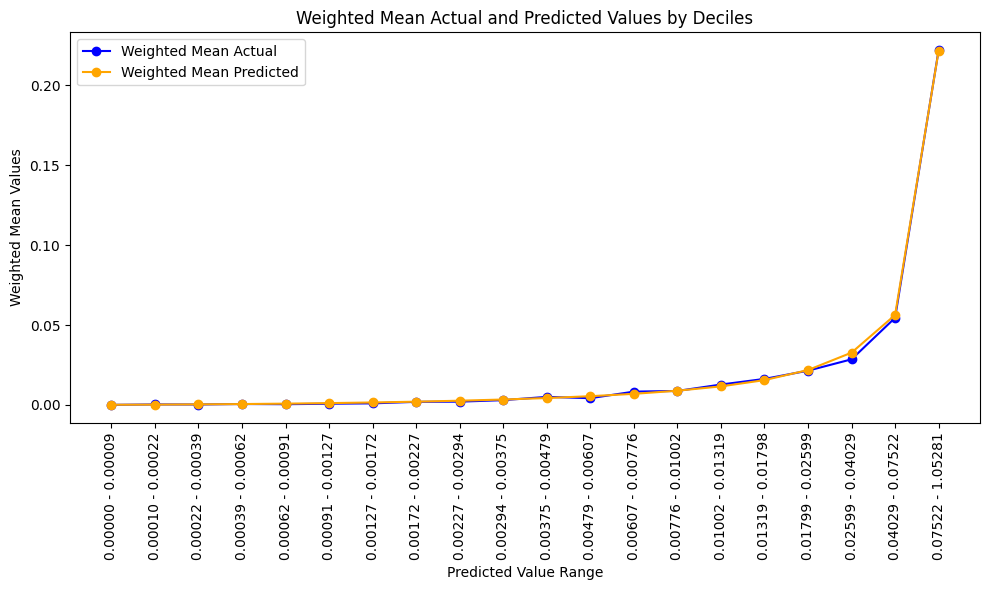

poisson deviance: 25715.15234375  psuedo R2 =0.3412122130393982
fc2.weight: tensor([[ 1.2629e+00, -3.7662e-27,  9.0147e-02,  1.5304e-01,  4.1165e-03,
          1.2442e-27,  6.7805e-02]])
fc2.bias: tensor([-7.1123])
fc_zero_inflation.weight: tensor([[ 7.6693e-01, -5.3056e-28,  1.2528e-01,  2.3013e-01,  1.8412e-02,
          1.0304e-28,  7.6683e-02]])
fc_zero_inflation.bias: tensor([-2.4294])
fc.weight: tensor([[-0.0162,  0.4045, -0.0145,  0.0040,  0.0513,  0.0215, -0.0100,  0.0386,
          0.0198]])
fc.bias: tensor([0.3920])


In [54]:
initial_model.eval()
second_model.eval()
with torch.no_grad():
    second_outputs = second_model(
        X_test_second_tensor, lives_exposure_test_tensor, initial_predictions_test
    )


y_pred = second_outputs.numpy().flatten()
# Flatten the actual values and weights
actual = y_test_tensor.numpy().flatten()
predicted = np.round(y_pred, 6)
weights = lives_exposure_test_tensor.numpy().flatten()
# Create a DataFrame for lift analysis
df_lift = pd.DataFrame({"actual": actual, "predicted": predicted, "weights": weights})
df_lift = df_lift.sort_values(by="predicted", ascending=False)
# df_lift["Age"] = X_test_scaled["Age"]
# Create deciles
df_lift["decile"] = pd.qcut(df_lift["predicted"], 20, labels=False)


def weighted_mean(group):
    return pd.Series(
        {
            "weighted_actual": np.average(group["actual"], weights=group["weights"]),
            "weighted_predicted": np.average(
                group["predicted"], weights=group["weights"]
            ),
            "range": f"{group['predicted'].min():.5f} - {group['predicted'].max():.5f}",
        }
    )


# Calculate weighted means for each decile
decile_summary = df_lift.groupby("decile").apply(weighted_mean)

# Plot the weighted mean actual and predicted values for each decile
plt.figure(figsize=(10, 6))
plt.plot(
    decile_summary["weighted_actual"],
    label="Weighted Mean Actual",
    color="blue",
    marker="o",
)
plt.plot(
    decile_summary["weighted_predicted"],
    label="Weighted Mean Predicted",
    color="orange",
    marker="o",
)
plt.xlabel("Predicted Value Range")
plt.ylabel("Weighted Mean Values")
plt.title("Weighted Mean Actual and Predicted Values by Deciles")
plt.xticks(ticks=range(20), labels=decile_summary["range"], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

actual = actual + 1e-8
mean_target = np.mean(actual)
null_deviance = 2 * sum(actual * np.log(actual / mean_target) - (actual - mean_target))
model_deviance = 2 * sum(actual * np.log(actual / y_pred) - (actual - y_pred))
poisson_deviance = null_deviance - model_deviance
print(
    f"poisson deviance: {poisson_deviance}  psuedo R2 ={ 1- model_deviance/null_deviance}"
)

weights = initial_model.state_dict()
for layer_name, weight in weights.items():
    print(f"{layer_name}: {weight}")


weights = second_model.state_dict()
for layer_name, weight in weights.items():
    print(f"{layer_name}: {weight}")

parameter tuning for the earlier runs

In [161]:
def objective(trial, features, df, best_trial_params=None):
    best_trial_params1 = {
        "lr": 0.18636853215485796,
        "weight_decay": 1.178832278553321e-05,
        "num_epochs": 938,
        "lambda_l1": 0.09532607373570341,
        "age_cut": 89,
        "age_power": 4.012759717541797,
        "age_multiplier": 0,
    }
    if best_trial_params is None:
        lr = trial.suggest_float("lr", 1e-2, 2e-1, log=True)
        weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)
        num_epochs = trial.suggest_int("num_epochs", 600, 1200)
        lambda_l1 = trial.suggest_float("lambda_l1", 1e-5, 1e-1, log=True)
        age_cut = trial.suggest_int("age_cut", 20, 90)
        age_power = trial.suggest_float("age_power", 1.1, 5)
        age_multiplier = trial.suggest_int("age_multiplier", 0, 1)
    else:
        lr = best_trial_params["lr"]
        weight_decay = best_trial_params["weight_decay"]
        num_epochs = best_trial_params["num_epochs"]
        lambda_l1 = best_trial_params["lambda_l1"]
        age_cut = best_trial_params["age_cut"]
        age_power = best_trial_params["age_power"]
        age_multiplier = best_trial_params["age_multiplier"]

    pseudo_r2_scores = []

    for fold in range(1, 2):
        df["Age2"] = age_multiplier * np.maximum(df["Age"] - age_cut, 0) ** age_power
        df["LivesExposure"] = df["LivesExposure"].clip(lower=1e-6)
        train_df = df[df["holdout"] == 0]
        test_df = df[~(df["holdout"] == 0)]

        train_lives_exposure = train_df["LivesExposure"]
        test_lives_exposure = test_df["LivesExposure"]

        if "Age2" not in features:
            features.append("Age2")

        X_train = train_df[features]
        y_train = train_df["IncurredClaims"]
        X_test = test_df[features]
        y_test = test_df["IncurredClaims"]

        scaler = StandardScaler()
        X_train_scaled = pd.DataFrame(
            scaler.fit_transform(X_train), columns=X_train.columns
        )
        X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

        X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
        X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
        y_train_tensor = torch.tensor(
            y_train.values.reshape(-1, 1), dtype=torch.float32
        )
        y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)
        lives_exposure_train_tensor = torch.tensor(
            train_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
        )
        lives_exposure_test_tensor = torch.tensor(
            test_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
        )

        # Initialize the initial ZIP model with interaction terms
        X_train_initial = X_train_scaled[
            ["Age", "Age2", "Gender_M", "Duration", "CalendarYear"]
        ]
        X_test_initial = X_test_scaled[
            ["Age", "Age2", "Gender_M", "Duration", "CalendarYear"]
        ]

        # Convert to tensors
        X_train_initial_tensor = torch.tensor(
            X_train_initial.values, dtype=torch.float32
        )
        X_test_initial_tensor = torch.tensor(X_test_initial.values, dtype=torch.float32)

        initial_model = Mort_Net_ZIP()
        optimizer_initial = optim.Adam(
            initial_model.parameters(), lr=lr, weight_decay=weight_decay
        )

        # Train the initial ZIP model
        for epoch in range(num_epochs):
            optimizer_initial.zero_grad()
            poisson_outputs, zero_inflation_outputs = initial_model(
                X_train_initial_tensor, lives_exposure_train_tensor
            )
            loss = joint_loss(
                poisson_outputs,
                zero_inflation_outputs,
                y_train_tensor,
                lives_exposure_train_tensor,
            )
            loss.backward()
            optimizer_initial.step()

        # Get predictions from the initial model
        with torch.no_grad():
            poisson_outputs, zero_inflation_outputs = initial_model(
                X_train_initial_tensor, lives_exposure_train_tensor
            )
            initial_predictions = poisson_outputs * (1 - zero_inflation_outputs)
            initial_predictions = initial_predictions.detach()

        # Initialize and train the second model with all features except the ones used in the initial model
        features_except_initial = [
            f
            for f in features
            if f not in ["Age", "Age2", "Gender_M", "Duration", "CalendarYear"]
        ]
        X_train_second = X_train_scaled[features_except_initial]
        X_test_second = X_test_scaled[features_except_initial]

        X_train_second_tensor = torch.tensor(X_train_second.values, dtype=torch.float32)
        X_test_second_tensor = torch.tensor(X_test_second.values, dtype=torch.float32)

        second_model = SecondPoissonModel(len(X_train_second.columns))
        optimizer_second = optim.Adam(
            second_model.parameters(), lr=lr, weight_decay=weight_decay
        )

        for epoch in range(num_epochs):
            optimizer_second.zero_grad()
            second_outputs = second_model(
                X_train_second_tensor, lives_exposure_train_tensor, initial_predictions
            )
            second_loss = weighted_poisson_loss(
                second_outputs, y_train_tensor, lives_exposure_train_tensor
            )
            second_loss.backward()
            optimizer_second.step()

        # Evaluation for the second model
        second_model.eval()
        initial_model.eval()
        with torch.no_grad():
            poisson_outputs_test, zero_inflation_outputs_test = initial_model(
                X_test_initial_tensor, lives_exposure_test_tensor
            )
            initial_predictions_test = poisson_outputs_test * (
                1 - zero_inflation_outputs_test
            )
            initial_predictions_test = initial_predictions_test.detach()
            second_outputs = second_model(
                X_test_second_tensor,
                lives_exposure_test_tensor,
                initial_predictions_test,
            )
            second_loss = weighted_poisson_loss(
                second_outputs, y_test_tensor, lives_exposure_test_tensor
            )

            y_pred = second_outputs
            y_test_tensor = y_test_tensor + 1e-8
            weighted_mean_target = torch.sum(
                y_test_tensor * lives_exposure_test_tensor
            ) / torch.sum(lives_exposure_test_tensor)
            null_deviance = 2 * torch.sum(
                lives_exposure_test_tensor
                * (
                    y_test_tensor * torch.log(y_test_tensor / weighted_mean_target)
                    - (y_test_tensor - weighted_mean_target)
                )
            )
            model_deviance = 2 * torch.sum(
                lives_exposure_test_tensor
                * (
                    y_test_tensor * torch.log(y_test_tensor / y_pred)
                    - (y_test_tensor - y_pred)
                )
            )
            pseudo_r2 = 1 - (model_deviance / null_deviance)
            pseudo_r2_scores.append(pseudo_r2.item())

    mean_pseudo_r2 = np.mean(pseudo_r2_scores)
    print(f"Mean Pseudo_R2: {mean_pseudo_r2:.4f}")
    return mean_pseudo_r2


# Initial set of features
features = combined_df_encoded.columns.tolist()
features.remove("IncurredClaims")
features.remove("LivesExposure")
features.remove("Actual_deaths_lives")
features.remove("holdout")
features.remove("random_fold")
features.remove("CommencementYear")
exclude_features = [
    "DistributionChannel_I",
    "DistributionChannel_M",
    # "DistributionChannel_N",
    # "DistributionChannel_S",
    # "DistributionChannel_U",
    # "SumAssuredBand_£125001-£250000",
    "SumAssuredBand_£250001+",
    # "SumAssuredBand_£25001-£75000",
    # "SumAssuredBand_£75001-£125000",
    # "Duration",
    "ProductCategory_Level",
    "ProductCategory_Other",
    # "ProductCategory_Term Other",
]
features = [feature for feature in features if feature not in exclude_features]
df = combined_df_encoded.drop(columns=exclude_features, axis=1)

# Determine the best parameters using Optuna to maximize R2 score of deciles
study_ZIP = optuna.create_study(direction="maximize")
study_ZIP.optimize(
    lambda trial: objective(trial, features, df.sample(frac=0.5, random_state=1)),
    n_trials=40,
)

best_trial = study_ZIP.best_trial
best_trial_params = best_trial.params
best_trial_params["saturated_r2"] = best_trial.value
print(f"best_trial_params {best_trial_params}")

[I 2024-12-23 17:04:54,711] A new study created in memory with name: no-name-c7ceeea9-4750-4da0-8ad1-2c3c10718602
c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-23 17:59:18,959] Trial 0 finished with value: 0.23356831073760986 and parameters: {'lr': 0.0668937749598565, 'weight_decay': 9.822722445594208e-05, 'num_epochs': 834, 'lambda_l1': 0.03789415103883347, 'age_cut': 45, 'age_power': 1.2335540446202256, 'age_multiplier': 0}. Best is trial 0 with value: 0.23356831073760986.


Mean Pseudo_R2: 0.2336


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-23 19:19:06,718] Trial 1 finished with value: 0.23469138145446777 and parameters: {'lr': 0.11026315750881706, 'weight_decay': 9.270393209533892e-06, 'num_epochs': 701, 'lambda_l1': 0.006645336080438032, 'age_cut': 40, 'age_power': 3.527310326095395, 'age_multiplier': 0}. Best is trial 1 with value: 0.23469138145446777.


Mean Pseudo_R2: 0.2347


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)


Mean Pseudo_R2: 0.2580


[I 2024-12-23 22:07:39,003] Trial 2 finished with value: 0.2579633593559265 and parameters: {'lr': 0.1292277242781551, 'weight_decay': 0.00014787144000335327, 'num_epochs': 824, 'lambda_l1': 0.05259773447424433, 'age_cut': 71, 'age_power': 2.267717974738507, 'age_multiplier': 0}. Best is trial 2 with value: 0.2579633593559265.
c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)


Mean Pseudo_R2: -3.8888


[I 2024-12-24 00:11:14,674] Trial 3 finished with value: -3.8888487815856934 and parameters: {'lr': 0.01955051693585309, 'weight_decay': 8.71614636367759e-05, 'num_epochs': 658, 'lambda_l1': 0.05069740288662816, 'age_cut': 73, 'age_power': 4.2815345186056994, 'age_multiplier': 1}. Best is trial 2 with value: 0.2579633593559265.
c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-24 02:25:10,748] Trial 4 finished with value: 0.26005882024765015 and parameters: {'lr': 0.1090848540083629, 'weight_decay': 0.006648435635448007, 'num_epochs': 1161, 'lambda_l1': 1.166084028068518e-05, 'age_cut': 54, 'age_power': 3.010525792580712, 'age_multiplier': 1}. Best is trial 4 with value: 0.26005882024765015.


Mean Pseudo_R2: 0.2601


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-24 03:48:13,877] Trial 5 finished with value: 0.25426381826400757 and parameters: {'lr': 0.12212609615809532, 'weight_decay': 0.0008772853502153498, 'num_epochs': 1154, 'lambda_l1': 0.020703484209110168, 'age_cut': 47, 'age_power': 3.9056736374057706, 'age_multiplier': 1}. Best is trial 4 with value: 0.26005882024765015.


Mean Pseudo_R2: 0.2543


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-24 04:09:19,819] Trial 6 finished with value: 0.19421029090881348 and parameters: {'lr': 0.017647002698481278, 'weight_decay': 0.0006729897733593948, 'num_epochs': 841, 'lambda_l1': 0.0009206325127124063, 'age_cut': 63, 'age_power': 4.222662852658827, 'age_multiplier': 1}. Best is trial 4 with value: 0.26005882024765015.


Mean Pseudo_R2: 0.1942


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-24 04:26:22,543] Trial 7 finished with value: 0.1973852515220642 and parameters: {'lr': 0.025218296621211462, 'weight_decay': 0.00024079480003138897, 'num_epochs': 759, 'lambda_l1': 2.2331484165736505e-05, 'age_cut': 58, 'age_power': 3.4640527107404417, 'age_multiplier': 0}. Best is trial 4 with value: 0.26005882024765015.


Mean Pseudo_R2: 0.1974


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-24 04:47:30,074] Trial 8 finished with value: 0.24654227495193481 and parameters: {'lr': 0.16399131921078886, 'weight_decay': 2.763271193285935e-06, 'num_epochs': 935, 'lambda_l1': 2.2377938092373285e-05, 'age_cut': 25, 'age_power': 2.058130525775116, 'age_multiplier': 1}. Best is trial 4 with value: 0.26005882024765015.


Mean Pseudo_R2: 0.2465


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-24 05:09:50,970] Trial 9 finished with value: 0.2537156343460083 and parameters: {'lr': 0.0772030399560328, 'weight_decay': 0.0002546565039130181, 'num_epochs': 991, 'lambda_l1': 4.992931904504049e-05, 'age_cut': 81, 'age_power': 1.8398750074204628, 'age_multiplier': 0}. Best is trial 4 with value: 0.26005882024765015.


Mean Pseudo_R2: 0.2537


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-24 05:36:24,649] Trial 10 finished with value: 0.22901642322540283 and parameters: {'lr': 0.03614194691910268, 'weight_decay': 0.005606329920963097, 'num_epochs': 1193, 'lambda_l1': 0.0002542673597312547, 'age_cut': 89, 'age_power': 2.7892204007293637, 'age_multiplier': 1}. Best is trial 4 with value: 0.26005882024765015.


Mean Pseudo_R2: 0.2290


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-24 06:00:08,183] Trial 11 finished with value: 0.16251832246780396 and parameters: {'lr': 0.010432414562300707, 'weight_decay': 0.008798377345532606, 'num_epochs': 1054, 'lambda_l1': 0.002614240665198022, 'age_cut': 68, 'age_power': 2.6415037715793988, 'age_multiplier': 0}. Best is trial 4 with value: 0.26005882024765015.


Mean Pseudo_R2: 0.1625


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-24 06:24:09,131] Trial 12 finished with value: 0.2744326591491699 and parameters: {'lr': 0.19852073508552096, 'weight_decay': 1.619263579685084e-05, 'num_epochs': 1068, 'lambda_l1': 0.000236347811601532, 'age_cut': 53, 'age_power': 2.2827769967648823, 'age_multiplier': 0}. Best is trial 12 with value: 0.2744326591491699.


Mean Pseudo_R2: 0.2744


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-24 06:48:32,199] Trial 13 finished with value: 0.25349825620651245 and parameters: {'lr': 0.17403182990626015, 'weight_decay': 1.935432790278209e-05, 'num_epochs': 1087, 'lambda_l1': 0.00015416614892066049, 'age_cut': 30, 'age_power': 3.1895421378978726, 'age_multiplier': 1}. Best is trial 12 with value: 0.2744326591491699.


Mean Pseudo_R2: 0.2535


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-24 07:13:21,091] Trial 14 finished with value: 0.2585405111312866 and parameters: {'lr': 0.07582378148235003, 'weight_decay': 1.0179370460845694e-06, 'num_epochs': 1098, 'lambda_l1': 1.0927346578261584e-05, 'age_cut': 53, 'age_power': 4.988315063121325, 'age_multiplier': 0}. Best is trial 12 with value: 0.2744326591491699.


Mean Pseudo_R2: 0.2585


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-24 07:35:16,203] Trial 15 finished with value: 0.1792694330215454 and parameters: {'lr': 0.1952744953743911, 'weight_decay': 1.0165683250563223e-05, 'num_epochs': 1001, 'lambda_l1': 0.00018995183946465268, 'age_cut': 38, 'age_power': 1.514797102002175, 'age_multiplier': 1}. Best is trial 12 with value: 0.2744326591491699.


Mean Pseudo_R2: 0.1793


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-24 08:01:18,378] Trial 16 finished with value: 0.23110777139663696 and parameters: {'lr': 0.04434363702196015, 'weight_decay': 0.0019437103064666704, 'num_epochs': 1145, 'lambda_l1': 0.0006113505722762946, 'age_cut': 57, 'age_power': 2.420049341640929, 'age_multiplier': 0}. Best is trial 12 with value: 0.2744326591491699.


Mean Pseudo_R2: 0.2311


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-24 08:23:38,268] Trial 17 finished with value: 0.24055880308151245 and parameters: {'lr': 0.10578814075401895, 'weight_decay': 5.2762386472898396e-05, 'num_epochs': 1005, 'lambda_l1': 6.741086088023127e-05, 'age_cut': 50, 'age_power': 3.0218792238964824, 'age_multiplier': 1}. Best is trial 12 with value: 0.2744326591491699.


Mean Pseudo_R2: 0.2406


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-24 08:44:27,223] Trial 18 finished with value: 0.06126582622528076 and parameters: {'lr': 0.05624881493135427, 'weight_decay': 3.2795688120983995e-05, 'num_epochs': 930, 'lambda_l1': 0.002440056373406946, 'age_cut': 34, 'age_power': 1.7532991436489103, 'age_multiplier': 1}. Best is trial 12 with value: 0.2744326591491699.


Mean Pseudo_R2: 0.0613


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-24 10:16:18,009] Trial 19 finished with value: 0.25378870964050293 and parameters: {'lr': 0.09241129692003419, 'weight_decay': 4.325673908249012e-06, 'num_epochs': 1178, 'lambda_l1': 6.365713545496875e-05, 'age_cut': 20, 'age_power': 2.5893187121781307, 'age_multiplier': 0}. Best is trial 12 with value: 0.2744326591491699.


Mean Pseudo_R2: 0.2538


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-24 17:40:06,895] Trial 20 finished with value: 0.2621003985404968 and parameters: {'lr': 0.16104821278351045, 'weight_decay': 0.003439715317169583, 'num_epochs': 1105, 'lambda_l1': 0.0005124108756826887, 'age_cut': 62, 'age_power': 3.205883771469837, 'age_multiplier': 0}. Best is trial 12 with value: 0.2744326591491699.


Mean Pseudo_R2: 0.2621


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-24 22:03:24,769] Trial 21 finished with value: 0.26836198568344116 and parameters: {'lr': 0.14827456048142118, 'weight_decay': 0.0036262359466814153, 'num_epochs': 1104, 'lambda_l1': 0.00044237900463552885, 'age_cut': 65, 'age_power': 3.170366665098932, 'age_multiplier': 0}. Best is trial 12 with value: 0.2744326591491699.


Mean Pseudo_R2: 0.2684


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-25 01:46:27,666] Trial 22 finished with value: 0.26486098766326904 and parameters: {'lr': 0.1517247695137141, 'weight_decay': 0.0033345704094905914, 'num_epochs': 1060, 'lambda_l1': 0.00042740952431053315, 'age_cut': 63, 'age_power': 3.5204081193865178, 'age_multiplier': 0}. Best is trial 12 with value: 0.2744326591491699.


Mean Pseudo_R2: 0.2649


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-25 04:09:17,375] Trial 23 finished with value: 0.26619118452072144 and parameters: {'lr': 0.1442730697592932, 'weight_decay': 0.0011943999466154094, 'num_epochs': 1041, 'lambda_l1': 0.0016237155310422737, 'age_cut': 79, 'age_power': 3.677090846156604, 'age_multiplier': 0}. Best is trial 12 with value: 0.2744326591491699.


Mean Pseudo_R2: 0.2662


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-25 04:40:47,162] Trial 24 finished with value: 0.24750691652297974 and parameters: {'lr': 0.13262042049878436, 'weight_decay': 0.0009444213657519166, 'num_epochs': 1041, 'lambda_l1': 0.0014431157015065096, 'age_cut': 79, 'age_power': 3.9495007020809174, 'age_multiplier': 0}. Best is trial 12 with value: 0.2744326591491699.


Mean Pseudo_R2: 0.2475


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-25 05:11:01,391] Trial 25 finished with value: 0.2653707265853882 and parameters: {'lr': 0.19923277561287522, 'weight_decay': 0.0004313762575698611, 'num_epochs': 960, 'lambda_l1': 0.007093603455127277, 'age_cut': 78, 'age_power': 4.88432613725556, 'age_multiplier': 0}. Best is trial 12 with value: 0.2744326591491699.


Mean Pseudo_R2: 0.2654


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-25 05:37:48,411] Trial 26 finished with value: 0.23458075523376465 and parameters: {'lr': 0.08846239695018696, 'weight_decay': 0.0031399377031549143, 'num_epochs': 894, 'lambda_l1': 0.007079066529569977, 'age_cut': 89, 'age_power': 3.8113865712271, 'age_multiplier': 0}. Best is trial 12 with value: 0.2744326591491699.


Mean Pseudo_R2: 0.2346


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-25 06:07:01,021] Trial 27 finished with value: 0.23262745141983032 and parameters: {'lr': 0.057417883189857966, 'weight_decay': 0.0019069675818967403, 'num_epochs': 1121, 'lambda_l1': 0.0016902242275801326, 'age_cut': 69, 'age_power': 2.161634435271286, 'age_multiplier': 0}. Best is trial 12 with value: 0.2744326591491699.


Mean Pseudo_R2: 0.2326


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-25 06:33:16,990] Trial 28 finished with value: 0.251758873462677 and parameters: {'lr': 0.14178681836470866, 'weight_decay': 0.0011709593659909483, 'num_epochs': 1048, 'lambda_l1': 0.00027693017150645687, 'age_cut': 75, 'age_power': 4.370555188465929, 'age_multiplier': 0}. Best is trial 12 with value: 0.2744326591491699.


Mean Pseudo_R2: 0.2518


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-25 06:56:24,780] Trial 29 finished with value: 0.24206817150115967 and parameters: {'lr': 0.09514597312230379, 'weight_decay': 0.0004071105555162642, 'num_epochs': 884, 'lambda_l1': 0.00012726797938919895, 'age_cut': 84, 'age_power': 1.3976619218014334, 'age_multiplier': 0}. Best is trial 12 with value: 0.2744326591491699.


Mean Pseudo_R2: 0.2421


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-25 07:23:19,411] Trial 30 finished with value: 0.2366129755973816 and parameters: {'lr': 0.06490055877461146, 'weight_decay': 2.2128228142811818e-05, 'num_epochs': 1010, 'lambda_l1': 0.018348676703335943, 'age_cut': 67, 'age_power': 1.1134408651675451, 'age_multiplier': 0}. Best is trial 12 with value: 0.2744326591491699.


Mean Pseudo_R2: 0.2366


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-25 07:49:21,421] Trial 31 finished with value: 0.2670522928237915 and parameters: {'lr': 0.18768240651898246, 'weight_decay': 0.0006224883281431937, 'num_epochs': 974, 'lambda_l1': 0.005289191265312125, 'age_cut': 76, 'age_power': 4.780926134788233, 'age_multiplier': 0}. Best is trial 12 with value: 0.2744326591491699.


Mean Pseudo_R2: 0.2671


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-25 08:14:12,628] Trial 32 finished with value: 0.26381897926330566 and parameters: {'lr': 0.19501984616556373, 'weight_decay': 0.0013602287625480002, 'num_epochs': 951, 'lambda_l1': 0.0009828439641410747, 'age_cut': 84, 'age_power': 4.522239884486206, 'age_multiplier': 0}. Best is trial 12 with value: 0.2744326591491699.


Mean Pseudo_R2: 0.2638


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-25 08:41:53,198] Trial 33 finished with value: 0.2572510242462158 and parameters: {'lr': 0.1316426684329861, 'weight_decay': 0.00014019189325831848, 'num_epochs': 1084, 'lambda_l1': 0.004302031844233491, 'age_cut': 44, 'age_power': 4.652079297746973, 'age_multiplier': 0}. Best is trial 12 with value: 0.2744326591491699.


Mean Pseudo_R2: 0.2573


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-25 08:59:51,394] Trial 34 finished with value: 0.24424070119857788 and parameters: {'lr': 0.1583933251552906, 'weight_decay': 0.0005059377668736769, 'num_epochs': 608, 'lambda_l1': 0.015130587415735574, 'age_cut': 72, 'age_power': 3.7138067509959316, 'age_multiplier': 0}. Best is trial 12 with value: 0.2744326591491699.


Mean Pseudo_R2: 0.2442


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-25 09:44:50,674] Trial 35 finished with value: 0.24843275547027588 and parameters: {'lr': 0.11581096520128702, 'weight_decay': 6.100321494493231e-05, 'num_epochs': 970, 'lambda_l1': 0.002710755975575247, 'age_cut': 76, 'age_power': 4.066282411312754, 'age_multiplier': 0}. Best is trial 12 with value: 0.2744326591491699.


Mean Pseudo_R2: 0.2484


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)


Mean Pseudo_R2: 0.2681


[I 2024-12-25 14:20:27,225] Trial 36 finished with value: 0.2681136727333069 and parameters: {'lr': 0.17318684666557688, 'weight_decay': 0.00022515515881686002, 'num_epochs': 1131, 'lambda_l1': 0.0003578728401531231, 'age_cut': 60, 'age_power': 3.289198865875046, 'age_multiplier': 0}. Best is trial 12 with value: 0.2744326591491699.
c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-25 19:16:40,997] Trial 37 finished with value: 0.2748687267303467 and parameters: {'lr': 0.19900171736215422, 'weight_decay': 0.00022790784671432597, 'num_epochs': 1136, 'lambda_l1': 0.09123408164648669, 'age_cut': 59, 'age_power': 2.9072810551013855, 'age_multiplier': 0}. Best is trial 37 with value: 0.2748687267303467.


Mean Pseudo_R2: 0.2749


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-25 21:35:54,571] Trial 38 finished with value: 0.2659105658531189 and parameters: {'lr': 0.11316068162204955, 'weight_decay': 0.00010255611356243501, 'num_epochs': 1135, 'lambda_l1': 0.09415127173993897, 'age_cut': 59, 'age_power': 3.2765718321341235, 'age_multiplier': 0}. Best is trial 37 with value: 0.2748687267303467.


Mean Pseudo_R2: 0.2659


c:\Anaconda3\Lib\site-packages\copulas\bivariate\base.py:163: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)
[I 2024-12-25 23:08:43,779] Trial 39 finished with value: 0.2715723514556885 and parameters: {'lr': 0.16857966112704048, 'weight_decay': 0.000281330647852145, 'num_epochs': 1180, 'lambda_l1': 9.05735484407007e-05, 'age_cut': 52, 'age_power': 2.893579059683043, 'age_multiplier': 0}. Best is trial 37 with value: 0.2748687267303467.


Mean Pseudo_R2: 0.2716
best_trial_params {'lr': 0.19900171736215422, 'weight_decay': 0.00022790784671432597, 'num_epochs': 1136, 'lambda_l1': 0.09123408164648669, 'age_cut': 59, 'age_power': 2.9072810551013855, 'age_multiplier': 0, 'saturated_r2': 0.2748687267303467}


### Summary of the First Poisson Model

#### Model Overview
The first Poisson model is a Poisson regression model with interaction terms. It is designed to predict incurred claims based on various features, including age and other demographic and policy-related variables.

#### Features Used
- Age
- Age2 (transformed age feature)
- Age3 (another transformed age feature)
- Gender_M
- Duration
- CalendarYear
- JointLifeStatus_S

#### Type of Model
- **Type**: Poisson Regression with Interaction Terms

#### Steps Involved
1. **Data Preparation**:
   - Create new features `Age2` and `Age3` based on age cutoffs and powers.
   - Clip the `LivesExposure` column to avoid very small values.
   - Split the data into training and testing sets based on the `holdout` column.
   - Scale the features using `StandardScaler`.

2. **Convert Data to Tensors**:
   - Convert the scaled features and target variables to PyTorch tensors.

3. **Define the Poisson Model with Interactions**:
   - Create a class `PoissonModelWithInteractions` that defines the Poisson model with interaction terms.
   - Implement the forward method to compute the interaction terms and the final output.

4. **Train the Poisson Model**:
   - Initialize and train the Poisson model using the Adam optimizer.
   - Print the loss every 20 epochs.

5. **Get Predictions from the Poisson Model**:
   - Compute predictions on the training and testing sets.
   - Calculate the pseudo R2 for the initial model.

#### Results
- **Pseudo R2 for Initial Model**: Calculated and printed during training. This metric indicates the goodness of fit of the model.

This summary provides an overview of the first Poisson model, including the features used, the type of model, the steps involved in training, and the results obtained.

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby("decile").apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby("decile").apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:32: Deprecation

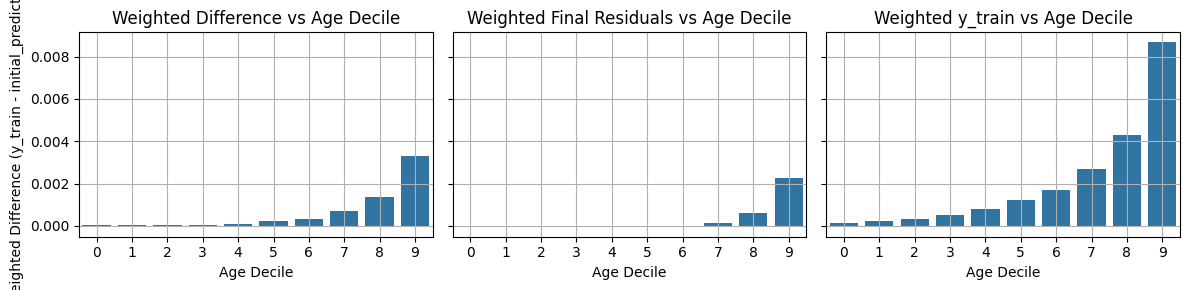

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby("decile").apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby("decile").apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:32: Deprecation

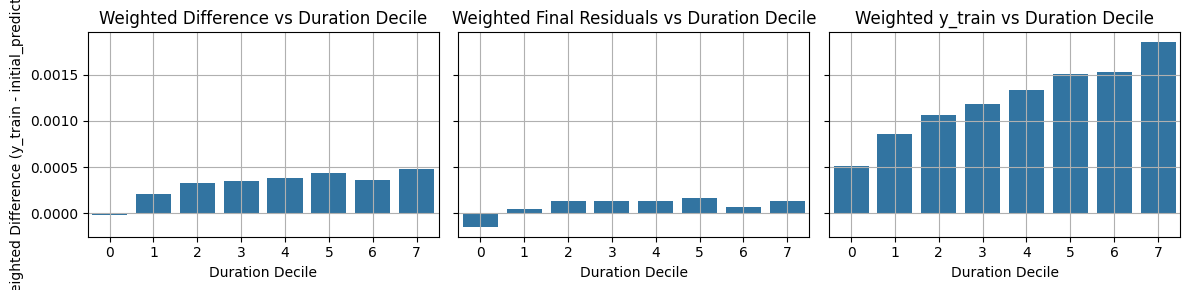

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby("decile").apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby("decile").apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:32: Deprecation

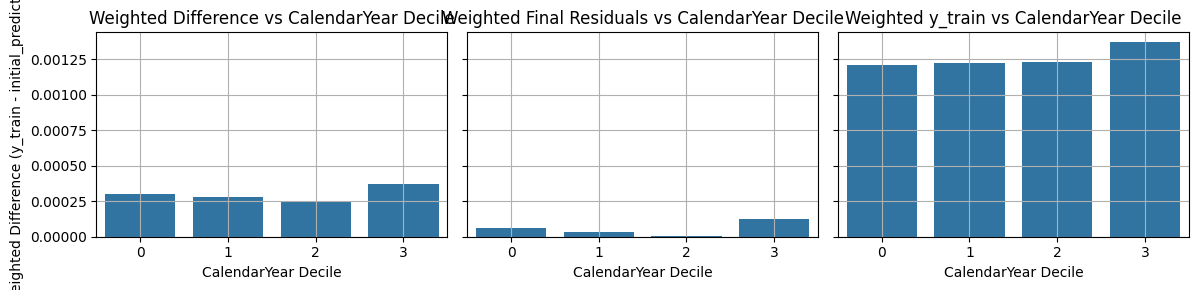

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:65: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:68: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:71: DeprecationWa

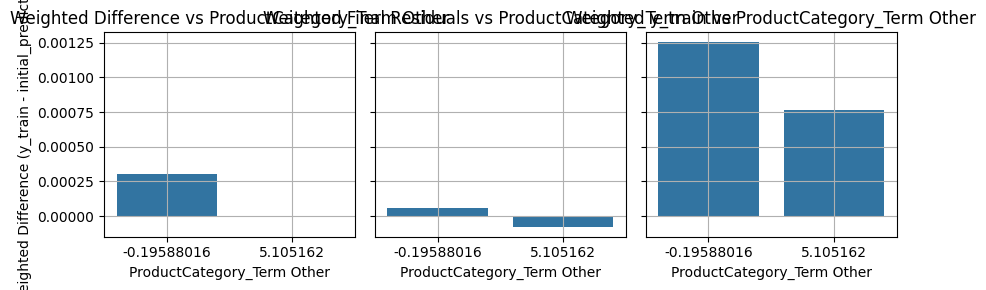

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:65: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:68: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:71: DeprecationWa

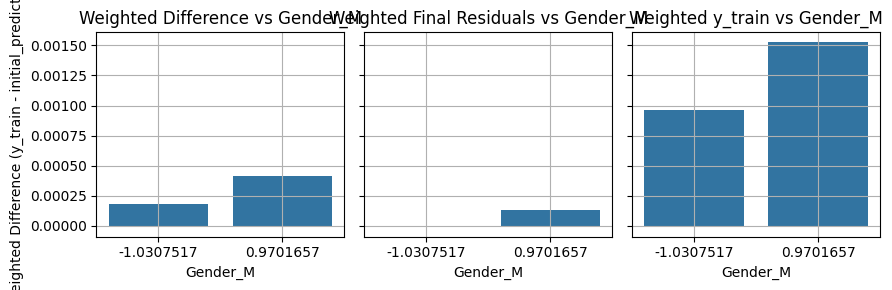

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:65: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:68: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:71: DeprecationWa

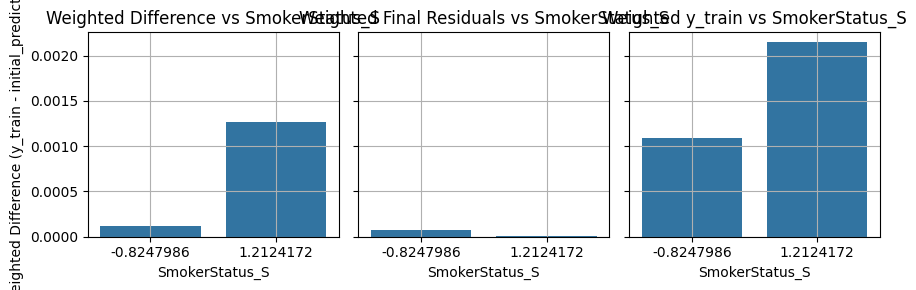

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:65: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:68: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:71: DeprecationWa

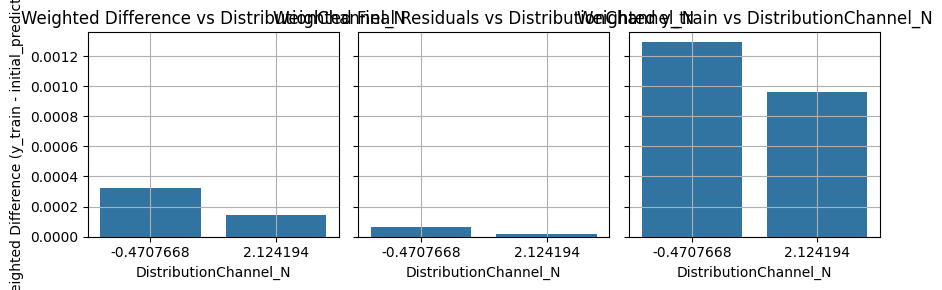

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:65: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:68: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:71: DeprecationWa

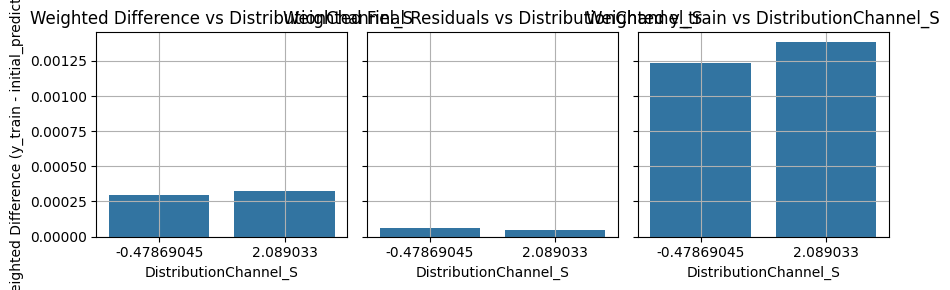

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:65: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:68: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:71: DeprecationWa

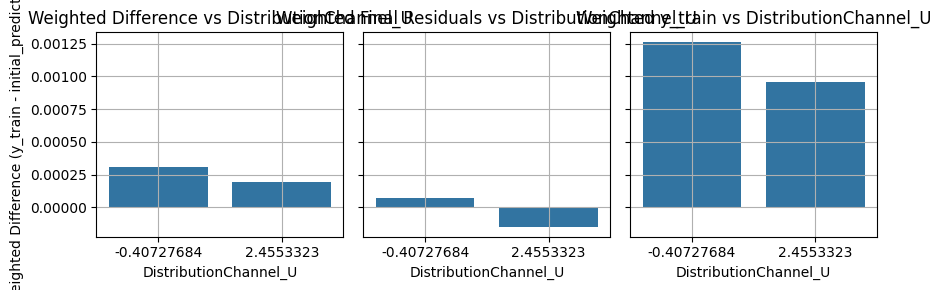

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:65: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:68: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:71: DeprecationWa

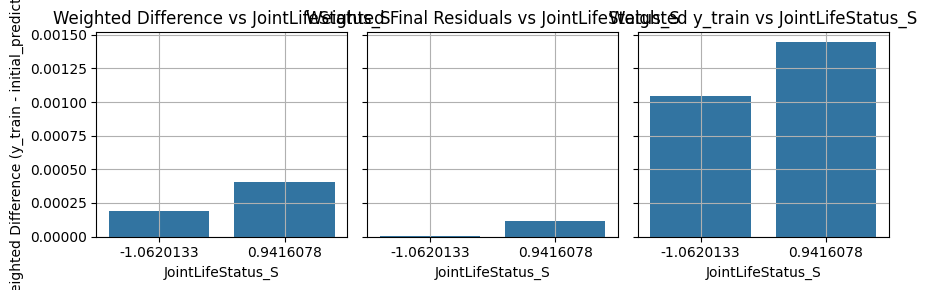

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:65: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:68: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:71: DeprecationWa

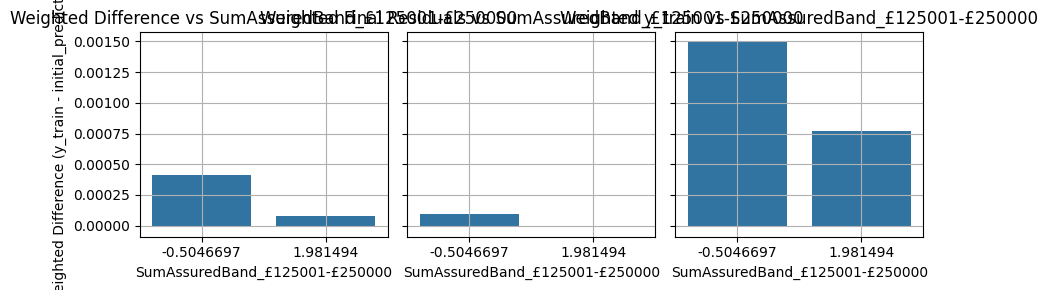

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:65: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:68: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:71: DeprecationWa

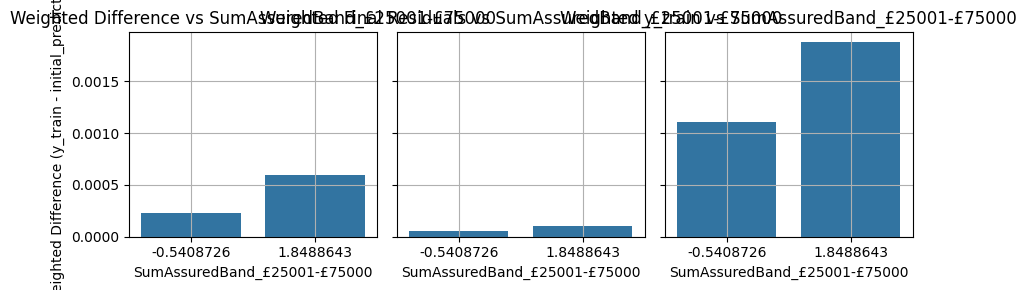

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:65: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:68: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:71: DeprecationWa

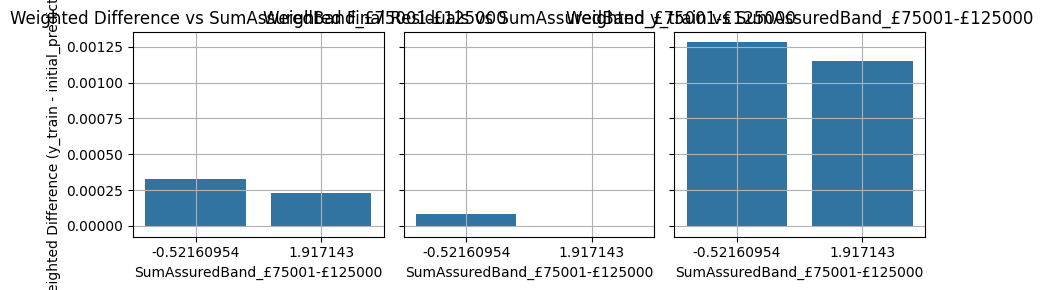

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:65: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:68: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\4150666965.py:71: DeprecationWa

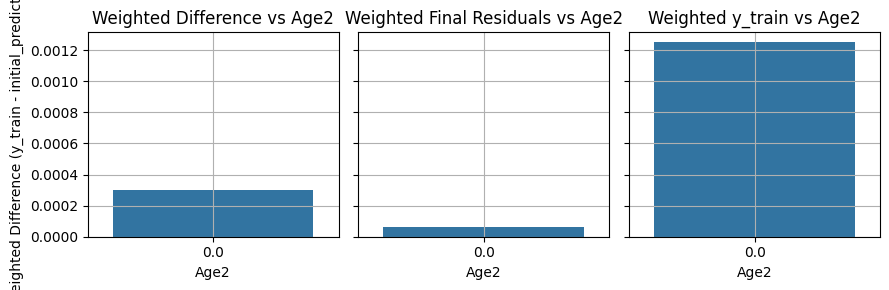

In [55]:
difference_init = (y_train_tensor - initial_predictions) / lives_exposure_train_tensor
second_model.eval()
with torch.no_grad():
    second_outputs_train = second_model(
        X_train_second_tensor, lives_exposure_train_tensor, initial_predictions
    )
difference_final = (y_train_tensor - second_outputs_train) / lives_exposure_train_tensor
difference_np = difference_init.detach().numpy().flatten()
difference_fn = difference_final.detach().numpy().flatten()
X_train_np = X_train_tensor.numpy()

# Convert tensors to DataFrame for easier manipulation
df = pd.DataFrame(X_train_np, columns=X_train.columns)
df["difference_init"] = difference_np
df["difference_final"] = difference_fn
df["exposure"] = lives_exposure_train_tensor.numpy().flatten()
df["y_train"] = (y_train_tensor / lives_exposure_train_tensor).numpy().flatten()

# Plot the difference against each feature
for feature in X_train.columns:
    if len(np.unique(df[feature])) > 2:  # Continuous feature
        # Calculate deciles
        df["decile"] = pd.qcut(df[feature], 10, labels=False, duplicates="drop")

        # Calculate weighted average for each decile
        weighted_avg_init = df.groupby("decile").apply(
            lambda x: np.average(x["difference_init"], weights=x["exposure"])
        )
        weighted_avg_final = df.groupby("decile").apply(
            lambda x: np.average(x["difference_final"], weights=x["exposure"])
        )
        weighted_avg_y_train = df.groupby("decile").apply(
            lambda x: np.average(x["y_train"], weights=x["exposure"])
        )

        fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=True)

        sns.barplot(x=weighted_avg_init.index, y=weighted_avg_init.values, ax=axes[0])
        axes[0].set_xlabel(f"{feature} Decile")
        axes[0].set_ylabel("Weighted Difference (y_train - initial_predictions)")
        axes[0].set_title(f"Weighted Difference vs {feature} Decile")
        axes[0].grid(True)

        sns.barplot(x=weighted_avg_final.index, y=weighted_avg_final.values, ax=axes[1])
        axes[1].set_xlabel(f"{feature} Decile")
        axes[1].set_ylabel("Weighted Final Residuals")
        axes[1].set_title(f"Weighted Final Residuals vs {feature} Decile")
        axes[1].grid(True)

        sns.barplot(
            x=weighted_avg_y_train.index, y=weighted_avg_y_train.values, ax=axes[2]
        )
        axes[2].set_xlabel(f"{feature} Decile")
        axes[2].set_ylabel("Weighted y_train")
        axes[2].set_title(f"Weighted y_train vs {feature} Decile")
        axes[2].grid(True)

        plt.tight_layout()
        plt.show()

    else:  # Categorical feature
        categories = np.unique(df[feature])

        # Calculate weighted average for each category
        weighted_avg_init = df.groupby(feature).apply(
            lambda x: np.average(x["difference_init"], weights=x["exposure"])
        )
        weighted_avg_final = df.groupby(feature).apply(
            lambda x: np.average(x["difference_final"], weights=x["exposure"])
        )
        weighted_avg_y_train = df.groupby(feature).apply(
            lambda x: np.average(x["y_train"], weights=x["exposure"])
        )

        fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

        sns.barplot(x=weighted_avg_init.index, y=weighted_avg_init.values, ax=axes[0])
        axes[0].set_xlabel(feature)
        axes[0].set_ylabel("Weighted Difference (y_train - initial_predictions)")
        axes[0].set_title(f"Weighted Difference vs {feature}")
        axes[0].grid(True)

        sns.barplot(x=weighted_avg_final.index, y=weighted_avg_final.values, ax=axes[1])
        axes[1].set_xlabel(feature)
        axes[1].set_ylabel("Weighted Final Residuals")
        axes[1].set_title(f"Weighted Final Residuals vs {feature}")
        axes[1].grid(True)

        sns.barplot(
            x=weighted_avg_y_train.index, y=weighted_avg_y_train.values, ax=axes[2]
        )
        axes[2].set_xlabel(feature)
        axes[2].set_ylabel("Weighted y_train")
        axes[2].set_title(f"Weighted y_train vs {feature}")
        axes[2].grid(True)

        plt.tight_layout()
        plt.show()

#### Summary of next the Model and Steps

Features Used: ["Age", "Age2", "Gender_M", "Duration", "CalendarYear"].
Define a Poisson regression model (PoissonModel) with a linear layer.
Train the model using the Adam optimizer and a custom weighted Poisson loss function.
Use model predictions as initial predictions for a second model.
Second Poisson Model Definition and Training:

Features Used: All features except ["Age", "Age2", "Gender_M", "Duration", "CalendarYear"].
Define a second Poisson regression model (SecondPoissonModel) that uses initial predictions as an offset.
Train the second model similarly to the first.
Evaluation:

Evaluate the second model on the test set.
Calculate pseudo R-squared (pseudo_r2) to assess model performance.
Hyperparameter Optimization with Optuna:

Define an objective function for Optuna to optimize hyperparameters.
Use cross-validation to train and evaluate the model.
Find the best hyperparameters that maximize the pseudo R-squared score.
Feature Importance Evaluation:

Evaluate feature importance by measuring the change in pseudo R-squared when each feature is replaced with its mode or mean.
Visualize feature importance using a bar plot.
Code Summary
This summary provides a concise overview of the steps involved in defining, training, evaluating, and optimizing the Poisson regression models, including the features used and transformations applied, as well as evaluating feature importance.



Epoch 20, Poisson Model Loss: 33.06264114379883
Epoch 40, Poisson Model Loss: 12.195420265197754
Epoch 60, Poisson Model Loss: 8.955106735229492
Epoch 80, Poisson Model Loss: 7.716404438018799
Epoch 100, Poisson Model Loss: 6.9706315994262695
Epoch 120, Poisson Model Loss: 6.42549467086792
Epoch 140, Poisson Model Loss: 5.997694492340088
Epoch 160, Poisson Model Loss: 5.653160572052002
Epoch 180, Poisson Model Loss: 5.372547149658203
Epoch 200, Poisson Model Loss: 5.142465591430664
Epoch 220, Poisson Model Loss: 4.95282506942749
Epoch 240, Poisson Model Loss: 4.795795917510986
Epoch 260, Poisson Model Loss: 4.6651930809021
Epoch 280, Poisson Model Loss: 4.556119918823242
Epoch 300, Poisson Model Loss: 4.464667797088623
Epoch 320, Poisson Model Loss: 4.3877034187316895
Epoch 340, Poisson Model Loss: 4.32270622253418
Epoch 360, Poisson Model Loss: 4.267634868621826
Epoch 380, Poisson Model Loss: 4.22083044052124
Epoch 400, Poisson Model Loss: 4.180937767028809
Epoch 420, Poisson Model Lo

[I 2024-12-29 11:35:25,447] A new study created in memory with name: no-name-3423beb5-6327-40b0-9636-ae2a24c7eae5
[I 2024-12-29 11:38:30,475] Trial 0 finished with value: 0.27866798639297485 and parameters: {'lr': 0.3541709874707099, 'weight_decay': 7.000826084892196e-05, 'num_epochs': 838, 'lambda_l1': 0.002621326998605151, 'age_cut': 56, 'age_power': 4.993736978840319, 'age_multiplier': 0}. Best is trial 0 with value: 0.27866798639297485.


Mean Pseudo_R2: 0.2787


[I 2024-12-29 11:42:29,001] Trial 1 finished with value: 0.2727710008621216 and parameters: {'lr': 0.15617017746491546, 'weight_decay': 1.2716941488224184e-05, 'num_epochs': 1129, 'lambda_l1': 0.007160980382797689, 'age_cut': 67, 'age_power': 1.3220023212498673, 'age_multiplier': 0}. Best is trial 0 with value: 0.27866798639297485.


Mean Pseudo_R2: 0.2728


[I 2024-12-29 11:46:30,127] Trial 2 finished with value: 0.2711358666419983 and parameters: {'lr': 0.30654271691128876, 'weight_decay': 0.00020099220969221993, 'num_epochs': 1122, 'lambda_l1': 0.006524157590640089, 'age_cut': 40, 'age_power': 2.3765529684903526, 'age_multiplier': 1}. Best is trial 0 with value: 0.27866798639297485.


Mean Pseudo_R2: 0.2711


[I 2024-12-29 11:49:12,894] Trial 3 finished with value: 0.27508771419525146 and parameters: {'lr': 0.2586113387062525, 'weight_decay': 0.00012606678965895675, 'num_epochs': 765, 'lambda_l1': 0.06757869626202366, 'age_cut': 30, 'age_power': 3.781294724159533, 'age_multiplier': 0}. Best is trial 0 with value: 0.27866798639297485.


Mean Pseudo_R2: 0.2751


[I 2024-12-29 11:54:13,546] Trial 4 finished with value: 0.2760334610939026 and parameters: {'lr': 0.11192816528837564, 'weight_decay': 1.815978668263664e-05, 'num_epochs': 1421, 'lambda_l1': 0.020881939059960355, 'age_cut': 34, 'age_power': 2.8338261056944125, 'age_multiplier': 0}. Best is trial 0 with value: 0.27866798639297485.


Mean Pseudo_R2: 0.2760


[I 2024-12-29 11:59:11,862] Trial 5 finished with value: 0.2785022258758545 and parameters: {'lr': 0.28292052074006374, 'weight_decay': 1.3379802084336137e-06, 'num_epochs': 1440, 'lambda_l1': 0.09554595478425976, 'age_cut': 25, 'age_power': 2.851341864005512, 'age_multiplier': 0}. Best is trial 0 with value: 0.27866798639297485.


Mean Pseudo_R2: 0.2785


[I 2024-12-29 12:02:52,622] Trial 6 finished with value: 0.2784998416900635 and parameters: {'lr': 0.3380191765502949, 'weight_decay': 0.00011704363547834534, 'num_epochs': 1178, 'lambda_l1': 0.007482195172789891, 'age_cut': 64, 'age_power': 4.7423624622948, 'age_multiplier': 0}. Best is trial 0 with value: 0.27866798639297485.


Mean Pseudo_R2: 0.2785


[I 2024-12-29 12:05:38,323] Trial 7 finished with value: 0.24763381481170654 and parameters: {'lr': 0.12618148010857258, 'weight_decay': 1.429862151693389e-06, 'num_epochs': 864, 'lambda_l1': 0.0012902352859199408, 'age_cut': 24, 'age_power': 2.6471959290478546, 'age_multiplier': 1}. Best is trial 0 with value: 0.27866798639297485.


Mean Pseudo_R2: 0.2476


[I 2024-12-29 12:09:30,597] Trial 8 finished with value: 0.2787157893180847 and parameters: {'lr': 0.33742732231049, 'weight_decay': 2.1356128107302768e-05, 'num_epochs': 1242, 'lambda_l1': 0.0029226823644660743, 'age_cut': 41, 'age_power': 3.2753134315540926, 'age_multiplier': 0}. Best is trial 8 with value: 0.2787157893180847.


Mean Pseudo_R2: 0.2787


[I 2024-12-29 12:13:56,537] Trial 9 finished with value: 0.27570170164108276 and parameters: {'lr': 0.10616118918898804, 'weight_decay': 1.8520558555778485e-06, 'num_epochs': 1475, 'lambda_l1': 0.0076830899080957546, 'age_cut': 48, 'age_power': 1.319168907407377, 'age_multiplier': 0}. Best is trial 8 with value: 0.2787157893180847.


Mean Pseudo_R2: 0.2757


[I 2024-12-29 12:17:48,337] Trial 10 finished with value: -inf and parameters: {'lr': 0.20927896751297773, 'weight_decay': 0.0009877396808742377, 'num_epochs': 1287, 'lambda_l1': 0.0022976670158612526, 'age_cut': 87, 'age_power': 3.79838630794058, 'age_multiplier': 1}. Best is trial 8 with value: 0.2787157893180847.


Mean Pseudo_R2: -inf


[I 2024-12-29 12:20:50,843] Trial 11 finished with value: 0.2784525752067566 and parameters: {'lr': 0.3850452314605481, 'weight_decay': 4.8174287210327613e-05, 'num_epochs': 956, 'lambda_l1': 0.0030337337916196143, 'age_cut': 55, 'age_power': 4.839182657704104, 'age_multiplier': 0}. Best is trial 8 with value: 0.2787157893180847.


Mean Pseudo_R2: 0.2785
Mean Pseudo_R2: 0.2771


[I 2024-12-29 12:24:06,183] Trial 12 finished with value: 0.2770754098892212 and parameters: {'lr': 0.20289901131298832, 'weight_decay': 4.586873217627107e-06, 'num_epochs': 1001, 'lambda_l1': 0.0010391272716678709, 'age_cut': 45, 'age_power': 3.8652560678256487, 'age_multiplier': 0}. Best is trial 8 with value: 0.2787157893180847.
[I 2024-12-29 12:27:56,266] Trial 13 finished with value: 0.2734068036079407 and parameters: {'lr': 0.08347775606583498, 'weight_decay': 4.1253571689533284e-05, 'num_epochs': 1275, 'lambda_l1': 0.0029467684967601966, 'age_cut': 69, 'age_power': 1.9827461971207887, 'age_multiplier': 0}. Best is trial 8 with value: 0.2787157893180847.


Mean Pseudo_R2: 0.2734


[I 2024-12-29 12:30:12,660] Trial 14 finished with value: 0.2629127502441406 and parameters: {'lr': 0.2544388810982828, 'weight_decay': 8.54526881192554e-06, 'num_epochs': 792, 'lambda_l1': 0.017321372719260996, 'age_cut': 57, 'age_power': 4.343166036329375, 'age_multiplier': 1}. Best is trial 8 with value: 0.2787157893180847.


Mean Pseudo_R2: 0.2629


[I 2024-12-29 12:33:09,757] Trial 15 finished with value: 0.27872079610824585 and parameters: {'lr': 0.38889005717798447, 'weight_decay': 0.0003610172245819506, 'num_epochs': 978, 'lambda_l1': 0.001959208519030714, 'age_cut': 89, 'age_power': 4.230388978307999, 'age_multiplier': 0}. Best is trial 15 with value: 0.27872079610824585.


Mean Pseudo_R2: 0.2787


[I 2024-12-29 12:36:06,600] Trial 16 finished with value: 0.2787126898765564 and parameters: {'lr': 0.397414344605778, 'weight_decay': 0.0003307935024913303, 'num_epochs': 1009, 'lambda_l1': 0.0015562544056150363, 'age_cut': 90, 'age_power': 3.3687343516386963, 'age_multiplier': 0}. Best is trial 15 with value: 0.27872079610824585.


Mean Pseudo_R2: 0.2787


[I 2024-12-29 12:39:50,585] Trial 17 finished with value: -0.050543904304504395 and parameters: {'lr': 0.22350214989335165, 'weight_decay': 0.0007095333734216486, 'num_epochs': 1254, 'lambda_l1': 0.004580374772597557, 'age_cut': 81, 'age_power': 3.288509849041548, 'age_multiplier': 1}. Best is trial 15 with value: 0.27872079610824585.


Mean Pseudo_R2: -0.0505


[I 2024-12-29 12:42:24,952] Trial 18 finished with value: 0.27476954460144043 and parameters: {'lr': 0.15892514502635188, 'weight_decay': 2.2817284165339963e-05, 'num_epochs': 927, 'lambda_l1': 0.015935569083958333, 'age_cut': 78, 'age_power': 4.314984564494453, 'age_multiplier': 0}. Best is trial 15 with value: 0.27872079610824585.


Mean Pseudo_R2: 0.2748


[I 2024-12-29 12:44:36,487] Trial 19 finished with value: 0.2745051383972168 and parameters: {'lr': 0.3188962154144042, 'weight_decay': 4.333265535581171e-06, 'num_epochs': 714, 'lambda_l1': 0.004432547999512328, 'age_cut': 75, 'age_power': 4.253084298513374, 'age_multiplier': 0}. Best is trial 15 with value: 0.27872079610824585.


Mean Pseudo_R2: 0.2745


[I 2024-12-29 12:48:25,018] Trial 20 finished with value: 0.27815860509872437 and parameters: {'lr': 0.24756489148902455, 'weight_decay': 0.00040145843064380956, 'num_epochs': 1352, 'lambda_l1': 0.002107133772166814, 'age_cut': 39, 'age_power': 3.345394237792568, 'age_multiplier': 1}. Best is trial 15 with value: 0.27872079610824585.


Mean Pseudo_R2: 0.2782


[I 2024-12-29 12:51:41,078] Trial 21 finished with value: 0.2787781357765198 and parameters: {'lr': 0.3952587317305519, 'weight_decay': 0.00031997696382000333, 'num_epochs': 1064, 'lambda_l1': 0.0017149814405403587, 'age_cut': 86, 'age_power': 3.325562014032768, 'age_multiplier': 0}. Best is trial 21 with value: 0.2787781357765198.


Mean Pseudo_R2: 0.2788


[I 2024-12-29 12:54:45,861] Trial 22 finished with value: 0.2787207365036011 and parameters: {'lr': 0.3994642763656843, 'weight_decay': 0.0003936541867153253, 'num_epochs': 1051, 'lambda_l1': 0.00160053605438816, 'age_cut': 83, 'age_power': 2.157131778998399, 'age_multiplier': 0}. Best is trial 21 with value: 0.2787781357765198.


Mean Pseudo_R2: 0.2787


[I 2024-12-29 12:58:35,473] Trial 23 finished with value: 0.2787665128707886 and parameters: {'lr': 0.38584974754455664, 'weight_decay': 0.0004232822542688648, 'num_epochs': 1061, 'lambda_l1': 0.0016252672676246125, 'age_cut': 85, 'age_power': 1.9417127780564756, 'age_multiplier': 0}. Best is trial 21 with value: 0.2787781357765198.


Mean Pseudo_R2: 0.2788


[I 2024-12-29 13:03:24,782] Trial 24 finished with value: 0.27846091985702515 and parameters: {'lr': 0.2899517327519213, 'weight_decay': 0.0002150993457579965, 'num_epochs': 1068, 'lambda_l1': 0.0010021776480215374, 'age_cut': 75, 'age_power': 1.6423196541196026, 'age_multiplier': 0}. Best is trial 21 with value: 0.2787781357765198.


Mean Pseudo_R2: 0.2785


[I 2024-12-29 13:07:37,573] Trial 25 finished with value: 0.2787194848060608 and parameters: {'lr': 0.35596177627118053, 'weight_decay': 0.0005889952393642103, 'num_epochs': 900, 'lambda_l1': 0.004256037468696898, 'age_cut': 85, 'age_power': 2.5038228491893957, 'age_multiplier': 0}. Best is trial 21 with value: 0.2787781357765198.


Mean Pseudo_R2: 0.2787


[I 2024-12-29 13:12:07,751] Trial 26 finished with value: 0.27857959270477295 and parameters: {'lr': 0.2794606717903572, 'weight_decay': 0.00016096535478012276, 'num_epochs': 1178, 'lambda_l1': 0.0017657124022545502, 'age_cut': 90, 'age_power': 1.7441463123304874, 'age_multiplier': 0}. Best is trial 21 with value: 0.2787781357765198.


Mean Pseudo_R2: 0.2786


[I 2024-12-29 13:15:58,616] Trial 27 finished with value: 0.27835023403167725 and parameters: {'lr': 0.3481058655732047, 'weight_decay': 6.72300472337091e-05, 'num_epochs': 1014, 'lambda_l1': 0.0013360352392414697, 'age_cut': 72, 'age_power': 4.046344670218414, 'age_multiplier': 0}. Best is trial 21 with value: 0.2787781357765198.


Mean Pseudo_R2: 0.2784


[I 2024-12-29 13:19:59,533] Trial 28 finished with value: 0.27846401929855347 and parameters: {'lr': 0.30787207018163953, 'weight_decay': 0.00030893450057932866, 'num_epochs': 971, 'lambda_l1': 0.011431423881510179, 'age_cut': 80, 'age_power': 3.5497277742543702, 'age_multiplier': 0}. Best is trial 21 with value: 0.2787781357765198.


Mean Pseudo_R2: 0.2785
Mean Pseudo_R2: 0.2786


[I 2024-12-29 13:27:35,340] Trial 29 finished with value: 0.27860724925994873 and parameters: {'lr': 0.3612182664673754, 'weight_decay': 0.00010080427520162262, 'num_epochs': 1074, 'lambda_l1': 0.0036814192242830015, 'age_cut': 62, 'age_power': 3.026989129306549, 'age_multiplier': 0}. Best is trial 21 with value: 0.2787781357765198.


Mean Pseudo_R2: 0.2784


[I 2024-12-29 13:32:54,852] Trial 30 finished with value: 0.2783878445625305 and parameters: {'lr': 0.2299393201578043, 'weight_decay': 0.0006435070094587243, 'num_epochs': 874, 'lambda_l1': 0.0021629978839460503, 'age_cut': 84, 'age_power': 4.497037644819287, 'age_multiplier': 0}. Best is trial 21 with value: 0.2787781357765198.


Mean Pseudo_R2: 0.2781


[I 2024-12-29 13:39:01,488] Trial 31 finished with value: 0.27808016538619995 and parameters: {'lr': 0.39874906725459264, 'weight_decay': 0.00044594874352201473, 'num_epochs': 1052, 'lambda_l1': 0.0016084028266866056, 'age_cut': 84, 'age_power': 2.128163831376343, 'age_multiplier': 0}. Best is trial 21 with value: 0.2787781357765198.


Mean Pseudo_R2: 0.2787


[I 2024-12-29 13:44:41,832] Trial 32 finished with value: 0.27871668338775635 and parameters: {'lr': 0.3768002223051733, 'weight_decay': 0.0002450527826330368, 'num_epochs': 1146, 'lambda_l1': 0.035722516290141226, 'age_cut': 79, 'age_power': 2.1102593375950094, 'age_multiplier': 0}. Best is trial 21 with value: 0.2787781357765198.
[I 2024-12-29 13:49:27,762] Trial 33 finished with value: 0.2786255478858948 and parameters: {'lr': 0.31705161683832744, 'weight_decay': 0.00040285685307748663, 'num_epochs': 1104, 'lambda_l1': 0.0019052715221931093, 'age_cut': 90, 'age_power': 1.6043571450430707, 'age_multiplier': 0}. Best is trial 21 with value: 0.2787781357765198.


Mean Pseudo_R2: 0.2786


[I 2024-12-29 13:54:01,450] Trial 34 finished with value: 0.27690207958221436 and parameters: {'lr': 0.18062037049172863, 'weight_decay': 0.0008635793937431864, 'num_epochs': 1048, 'lambda_l1': 0.005655643028367362, 'age_cut': 73, 'age_power': 2.317900108255949, 'age_multiplier': 0}. Best is trial 21 with value: 0.2787781357765198.


Mean Pseudo_R2: 0.2769
Mean Pseudo_R2: 0.2780


[I 2024-12-29 14:00:07,207] Trial 35 finished with value: 0.27795541286468506 and parameters: {'lr': 0.34146136949310163, 'weight_decay': 7.866179877718322e-05, 'num_epochs': 1153, 'lambda_l1': 0.001208832483217092, 'age_cut': 84, 'age_power': 1.9610669502000353, 'age_multiplier': 0}. Best is trial 21 with value: 0.2787781357765198.
[I 2024-12-29 14:05:45,270] Trial 36 finished with value: 0.2784900665283203 and parameters: {'lr': 0.3989519844960322, 'weight_decay': 0.0001763966742946836, 'num_epochs': 827, 'lambda_l1': 0.0025084907037810256, 'age_cut': 68, 'age_power': 2.7344012491479726, 'age_multiplier': 0}. Best is trial 21 with value: 0.2787781357765198.


Mean Pseudo_R2: 0.2785


[I 2024-12-29 14:15:16,048] Trial 37 finished with value: 0.27860552072525024 and parameters: {'lr': 0.2763893266757965, 'weight_decay': 0.0005543990880081783, 'num_epochs': 1207, 'lambda_l1': 0.001382510447124237, 'age_cut': 81, 'age_power': 1.4631385224813234, 'age_multiplier': 0}. Best is trial 21 with value: 0.2787781357765198.


Mean Pseudo_R2: 0.2786


[I 2024-12-29 14:22:41,027] Trial 38 finished with value: 0.27842825651168823 and parameters: {'lr': 0.3054327698829492, 'weight_decay': 0.00014707267231977108, 'num_epochs': 938, 'lambda_l1': 0.003294349504204714, 'age_cut': 87, 'age_power': 1.1410399168691516, 'age_multiplier': 0}. Best is trial 21 with value: 0.2787781357765198.


Mean Pseudo_R2: 0.2784


[I 2024-12-29 14:30:34,557] Trial 39 finished with value: 0.26915454864501953 and parameters: {'lr': 0.3597505642563302, 'weight_decay': 0.00024964869969214276, 'num_epochs': 1111, 'lambda_l1': 0.0017496856398683622, 'age_cut': 62, 'age_power': 2.9607053485396615, 'age_multiplier': 1}. Best is trial 21 with value: 0.2787781357765198.


Mean Pseudo_R2: 0.2692


[I 2024-12-29 14:35:50,390] Trial 40 finished with value: 0.27541154623031616 and parameters: {'lr': 0.13622073207911156, 'weight_decay': 0.000103004468322602, 'num_epochs': 982, 'lambda_l1': 0.0026142547598435417, 'age_cut': 77, 'age_power': 3.5889290208901805, 'age_multiplier': 0}. Best is trial 21 with value: 0.2787781357765198.


Mean Pseudo_R2: 0.2754
Mean Pseudo_R2: 0.2785


[I 2024-12-29 14:40:39,001] Trial 41 finished with value: 0.2785452604293823 and parameters: {'lr': 0.3591760592767355, 'weight_decay': 0.0004899436941260039, 'num_epochs': 864, 'lambda_l1': 0.004017282553570601, 'age_cut': 86, 'age_power': 2.5188268874323407, 'age_multiplier': 0}. Best is trial 21 with value: 0.2787781357765198.


Mean Pseudo_R2: 0.2784


[I 2024-12-29 14:47:06,492] Trial 42 finished with value: 0.2784135341644287 and parameters: {'lr': 0.3270675300198945, 'weight_decay': 0.0002961941433497712, 'num_epochs': 908, 'lambda_l1': 0.005852516018065516, 'age_cut': 82, 'age_power': 2.476350319186864, 'age_multiplier': 0}. Best is trial 21 with value: 0.2787781357765198.


Mean Pseudo_R2: 0.2787


[I 2024-12-29 14:53:39,571] Trial 43 finished with value: 0.27873820066452026 and parameters: {'lr': 0.3732871761216091, 'weight_decay': 0.0007409749690083687, 'num_epochs': 897, 'lambda_l1': 0.009056511291070055, 'age_cut': 87, 'age_power': 2.231958718524888, 'age_multiplier': 0}. Best is trial 21 with value: 0.2787781357765198.
[I 2024-12-29 15:02:36,888] Trial 44 finished with value: 0.2785598635673523 and parameters: {'lr': 0.379058592434563, 'weight_decay': 0.0009136293795588595, 'num_epochs': 1045, 'lambda_l1': 0.028374378821509512, 'age_cut': 88, 'age_power': 2.236055551796112, 'age_multiplier': 0}. Best is trial 21 with value: 0.2787781357765198.


Mean Pseudo_R2: 0.2786
Mean Pseudo_R2: 0.2787


[I 2024-12-29 15:12:17,028] Trial 45 finished with value: 0.2787107825279236 and parameters: {'lr': 0.32822058013077654, 'weight_decay': 0.0006928282809082125, 'num_epochs': 1088, 'lambda_l1': 0.0490435403736832, 'age_cut': 71, 'age_power': 1.8835710186092907, 'age_multiplier': 0}. Best is trial 21 with value: 0.2787781357765198.
[I 2024-12-29 15:18:34,900] Trial 46 finished with value: 0.2784474492073059 and parameters: {'lr': 0.3727434864846162, 'weight_decay': 0.00037988318504012533, 'num_epochs': 1022, 'lambda_l1': 0.009988074457972123, 'age_cut': 76, 'age_power': 2.6877503673231864, 'age_multiplier': 0}. Best is trial 21 with value: 0.2787781357765198.


Mean Pseudo_R2: 0.2784


[I 2024-12-29 15:23:04,587] Trial 47 finished with value: 0.27806198596954346 and parameters: {'lr': 0.2981706669073178, 'weight_decay': 0.00021377518020494697, 'num_epochs': 812, 'lambda_l1': 0.0929624072292427, 'age_cut': 83, 'age_power': 4.930400594494718, 'age_multiplier': 0}. Best is trial 21 with value: 0.2787781357765198.


Mean Pseudo_R2: 0.2781


[I 2024-12-29 15:27:13,069] Trial 48 finished with value: 0.27743345499038696 and parameters: {'lr': 0.2659855751742036, 'weight_decay': 0.0005208946026874743, 'num_epochs': 957, 'lambda_l1': 0.0012653699068831564, 'age_cut': 29, 'age_power': 4.566294320780167, 'age_multiplier': 0}. Best is trial 21 with value: 0.2787781357765198.


Mean Pseudo_R2: 0.2774


[I 2024-12-29 15:31:56,711] Trial 49 finished with value: 0.2655287981033325 and parameters: {'lr': 0.08937324539758092, 'weight_decay': 0.0007585504201194382, 'num_epochs': 1130, 'lambda_l1': 0.008489259073876685, 'age_cut': 51, 'age_power': 3.1370418654962746, 'age_multiplier': 0}. Best is trial 21 with value: 0.2787781357765198.


Mean Pseudo_R2: 0.2655
best_trial_params {'lr': 0.3952587317305519, 'weight_decay': 0.00031997696382000333, 'num_epochs': 1064, 'lambda_l1': 0.0017149814405403587, 'age_cut': 86, 'age_power': 3.325562014032768, 'age_multiplier': 0, 'saturated_r2': 0.2787781357765198}


[I 2024-12-29 15:32:00,615] A new study created in memory with name: no-name-01713e02-bc74-4ee5-b0e8-e612c74574c6
[I 2024-12-29 15:40:32,971] Trial 0 finished with value: 0.2059062123298645 and parameters: {}. Best is trial 0 with value: 0.2059062123298645.


Mean Pseudo_R2: 0.2059
trial params{}


[I 2024-12-29 15:40:34,879] A new study created in memory with name: no-name-79f97d61-f686-4a40-a211-8c153d66e026
[I 2024-12-29 15:49:38,799] Trial 0 finished with value: 0.27104073762893677 and parameters: {}. Best is trial 0 with value: 0.27104073762893677.


Mean Pseudo_R2: 0.2710
trial params{}


[I 2024-12-29 15:49:40,882] A new study created in memory with name: no-name-845edb1b-e1fb-493f-baec-f031253220a9
[I 2024-12-29 15:56:18,525] Trial 0 finished with value: 0.2763795256614685 and parameters: {}. Best is trial 0 with value: 0.2763795256614685.


Mean Pseudo_R2: 0.2764
trial params{}


[I 2024-12-29 15:56:19,376] A new study created in memory with name: no-name-3cb61552-a1bb-489e-a81d-fa1b716c1cdf
[I 2024-12-29 16:02:34,504] Trial 0 finished with value: 0.2775380611419678 and parameters: {}. Best is trial 0 with value: 0.2775380611419678.


Mean Pseudo_R2: 0.2775
trial params{}


[I 2024-12-29 16:02:34,897] A new study created in memory with name: no-name-8d08e48b-f134-485c-8a81-e397edeb049f


Mean Pseudo_R2: 0.2776


[I 2024-12-29 16:08:56,526] Trial 0 finished with value: 0.2775970697402954 and parameters: {}. Best is trial 0 with value: 0.2775970697402954.


trial params{}


[I 2024-12-29 16:08:57,028] A new study created in memory with name: no-name-9237fb97-5434-4d56-972c-22ce27889034


Mean Pseudo_R2: 0.2776


[I 2024-12-29 16:15:18,199] Trial 0 finished with value: 0.2776276469230652 and parameters: {}. Best is trial 0 with value: 0.2776276469230652.


trial params{}


[I 2024-12-29 16:15:20,259] A new study created in memory with name: no-name-75c5fd63-99bf-443b-b7d5-4ebd18622803


Mean Pseudo_R2: 0.2758


[I 2024-12-29 16:21:09,983] Trial 0 finished with value: 0.2757997512817383 and parameters: {}. Best is trial 0 with value: 0.2757997512817383.


trial params{}


[I 2024-12-29 16:21:12,690] A new study created in memory with name: no-name-2d239098-5e6b-4c48-b6f1-12f388d4dac0


Mean Pseudo_R2: 0.2714


[I 2024-12-29 16:27:24,835] Trial 0 finished with value: 0.2714168429374695 and parameters: {}. Best is trial 0 with value: 0.2714168429374695.


trial params{}


[I 2024-12-29 16:27:27,800] A new study created in memory with name: no-name-2465c49a-4ed2-44c6-92e7-76ad6d18802e


Mean Pseudo_R2: 0.2774


[I 2024-12-29 16:33:33,703] Trial 0 finished with value: 0.27737581729888916 and parameters: {}. Best is trial 0 with value: 0.27737581729888916.


trial params{}


[I 2024-12-29 16:33:35,853] A new study created in memory with name: no-name-b0fb272b-e49c-4cf6-bc4c-703aa280d249


Mean Pseudo_R2: 0.2773


[I 2024-12-29 16:40:25,185] Trial 0 finished with value: 0.2773328423500061 and parameters: {}. Best is trial 0 with value: 0.2773328423500061.


trial params{}


[I 2024-12-29 16:40:27,529] A new study created in memory with name: no-name-110f30c9-a120-4b52-93c8-6e11a6b5eac8
[I 2024-12-29 16:44:23,039] Trial 0 finished with value: 0.277190625667572 and parameters: {}. Best is trial 0 with value: 0.277190625667572.


Mean Pseudo_R2: 0.2772
trial params{}


[I 2024-12-29 16:44:24,134] A new study created in memory with name: no-name-922abecc-857c-4ed5-9590-622888f171fd
[I 2024-12-29 16:48:23,796] Trial 0 finished with value: 0.27739834785461426 and parameters: {}. Best is trial 0 with value: 0.27739834785461426.


Mean Pseudo_R2: 0.2774
trial params{}


[I 2024-12-29 16:48:24,771] A new study created in memory with name: no-name-5cf17471-e7d2-4025-b349-f54a7de9217d
[I 2024-12-29 17:00:34,683] Trial 0 finished with value: 0.27743852138519287 and parameters: {}. Best is trial 0 with value: 0.27743852138519287.


Mean Pseudo_R2: 0.2774
trial params{}


[I 2024-12-29 17:00:36,154] A new study created in memory with name: no-name-9146c10a-7718-40c8-be5a-875e609b7601
[I 2024-12-29 17:10:44,061] Trial 0 finished with value: 0.2775183320045471 and parameters: {}. Best is trial 0 with value: 0.2775183320045471.


Mean Pseudo_R2: 0.2775
trial params{}


[I 2024-12-29 17:10:44,974] A new study created in memory with name: no-name-5ea74b73-3772-41da-ae04-ddeb15032aeb
[I 2024-12-29 17:16:46,175] Trial 0 finished with value: 0.2760074734687805 and parameters: {}. Best is trial 0 with value: 0.2760074734687805.


Mean Pseudo_R2: 0.2760
trial params{}


[I 2024-12-29 17:16:47,059] A new study created in memory with name: no-name-3c91a068-aea6-4be6-bdd5-4fe1195bdf71
[I 2024-12-29 17:24:22,306] Trial 0 finished with value: 0.2761092782020569 and parameters: {}. Best is trial 0 with value: 0.2761092782020569.


Mean Pseudo_R2: 0.2761
trial params{}


[I 2024-12-29 17:24:24,230] A new study created in memory with name: no-name-0cb00975-8915-4c84-8054-78b3c6a91d6e
[I 2024-12-29 17:28:39,653] Trial 0 finished with value: 0.2751980423927307 and parameters: {}. Best is trial 0 with value: 0.2751980423927307.


Mean Pseudo_R2: 0.2752
trial params{}


[I 2024-12-29 17:28:40,725] A new study created in memory with name: no-name-6fd40f4d-ec79-4591-b495-0ed58db3270a
[I 2024-12-29 17:33:48,534] Trial 0 finished with value: 0.27568519115448 and parameters: {}. Best is trial 0 with value: 0.27568519115448.


Mean Pseudo_R2: 0.2757
trial params{}


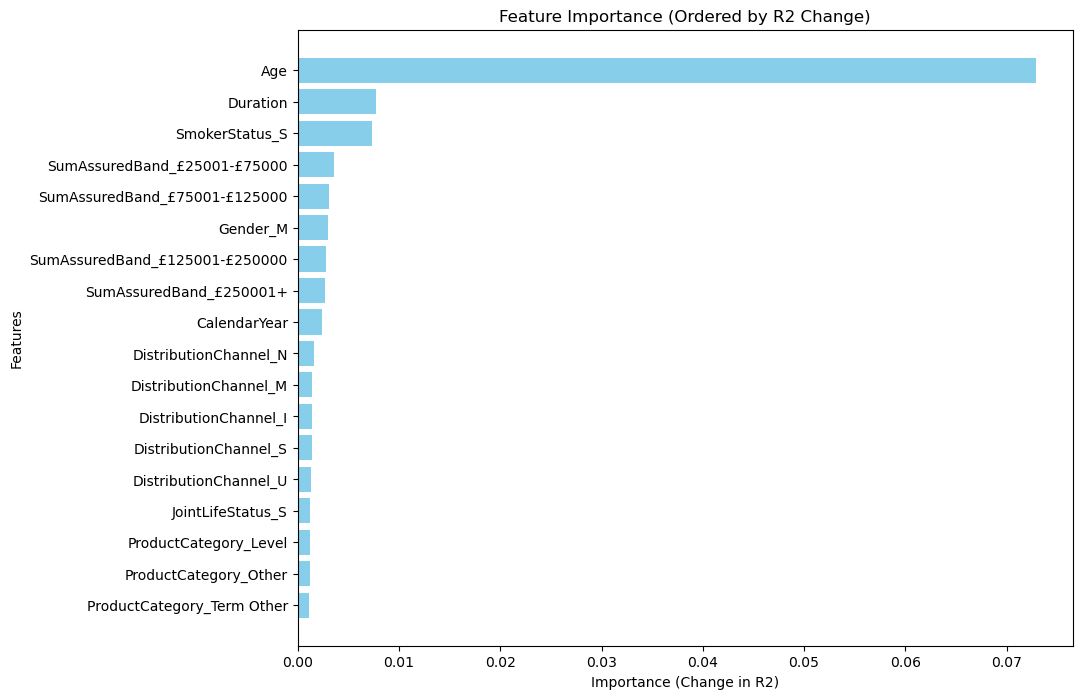

In [41]:
other_best_params = {
    "lr": 0.18636853215485796,
    "weight_decay": 1.178832278553321e-05,
    "num_epochs": 938,
    "lambda_l1": 0.09532607373570341,
    "age_cut": 89,
    "age_power": 4.012759717541797,
    "age_multiplier": 0,
}
other_best_params = {
    "lr": 0.3736059569691818,
    "weight_decay": 1.439387577570517e-05,
    "num_epochs": 1387,
    "lambda_l1": 0.018066399129751186,
    "age_cut": 56,
    "age_power": 1.9268742183637377,
    "age_multiplier": 0,
    "saturated_r2": 0.16732501983642578,
}
# above are random testing intialisations
# Summary:
# 1. Define hyperparameters and extract them from a dictionary.
# 2. Prepare the data by encoding, scaling, and splitting into training and test sets.
# 3. Define and train a Poisson regression model using initial features.
#    - Features used: ["Age", "Age2", "Gender_M", "Duration", "CalendarYear"]
# 4. Get predictions from the Poisson model and use them as initial predictions.
# 5. Define and train a second Poisson model using additional features and initial predictions.
#    - Features used: All features except ["Age", "Age2", "Gender_M", "Duration", "CalendarYear"]
# 6. Evaluate the second model on the test set and calculate the pseudo R-squared value.
# 7. Perform residual analysis by calculating differences between actual and predicted values.
# 8. Plot the residuals against each feature to visualize the model's performance.
# 9. Use Optuna to optimize hyperparameters and maximize the R2 score.
# 10. Evaluate feature importance by measuring the change in R2 when each feature is removed.

# Features used:
# - First Model: ["Age", "Age2", "Gender_M", "Duration", "CalendarYear"]
# - Second Model: All features except ["Age", "Age2", "Gender_M", "Duration", "CalendarYear"]
# - Additional features include:
#   - ProductCategory_Level
#   - ProductCategory_Other
#   - ProductCategory_Term Other
#   - SmokerStatus_S
#   - DistributionChannel_I
#   - DistributionChannel_M
#   - DistributionChannel_N
#   - DistributionChannel_S
#   - DistributionChannel_U
#   - JointLifeStatus_S
#   - SumAssuredBand_£125001-£250000
#   - SumAssuredBand_£250001+
#   - SumAssuredBand_£25001-£75000
#   - SumAssuredBand_£75001-£125000

# Note: The features are dynamically selected and transformed based on the data and model requirements.
age_cut = other_best_params["age_cut"]
age_power = other_best_params["age_power"]
weight_decay = other_best_params["weight_decay"]
num_epochs = other_best_params["num_epochs"]
lambda_l1 = other_best_params["lambda_l1"]
lr = other_best_params["lr"]
age_multiplier = other_best_params["age_multiplier"]

# Prepare the data
df = combined_df_encoded.copy()
exclude_features = []
df = df.drop(columns=exclude_features)
df["Age2"] = age_multiplier * np.maximum(df["Age"] - age_cut, 0) ** age_power
df["LivesExposure"] = df["LivesExposure"].clip(lower=1e-6)

train_df = df[df["holdout"] == 0]
test_df = df[df["holdout"] == 1]

train_lives_exposure = train_df["LivesExposure"]
test_lives_exposure = test_df["LivesExposure"]

X_train = train_df.drop(
    [
        "IncurredClaims",
        "LivesExposure",
        "Actual_deaths_lives",
        "holdout",
        "random_fold",
        "CommencementYear",
    ],
    axis=1,
)
y_train = train_df["IncurredClaims"]
X_test = test_df.drop(
    [
        "IncurredClaims",
        "LivesExposure",
        "Actual_deaths_lives",
        "holdout",
        "random_fold",
        "CommencementYear",
    ],
    axis=1,
)
y_test = test_df["IncurredClaims"]

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# Convert data to tensors
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)
lives_exposure_train_tensor = torch.tensor(
    train_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
)
lives_exposure_test_tensor = torch.tensor(
    test_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
)
X_train_initial = X_train_scaled[
    ["Age", "Age2", "Gender_M", "Duration", "CalendarYear"]
]
X_test_initial = X_test_scaled[["Age", "Age2", "Gender_M", "Duration", "CalendarYear"]]

# Convert to tensors
X_train_initial_tensor = torch.tensor(X_train_initial.values, dtype=torch.float32)
X_test_initial_tensor = torch.tensor(X_test_initial.values, dtype=torch.float32)


# Define the Poisson model
class PoissonModel(nn.Module):
    def __init__(self, input_size):
        super(PoissonModel, self).__init__()
        self.fc = nn.Linear(input_size, 1)

    def forward(self, x, exposure):
        linear_output = self.fc(x)
        offset_output = linear_output + torch.log(exposure)
        poisson_output = torch.exp(offset_output)
        return poisson_output


# Initialize and train the Poisson model
poisson_model = PoissonModel(len(X_train_initial.columns))
optimizer_poisson = optim.Adam(
    poisson_model.parameters(), lr=lr, weight_decay=weight_decay
)

for epoch in range(num_epochs):
    optimizer_poisson.zero_grad()
    poisson_outputs = poisson_model(X_train_initial_tensor, lives_exposure_train_tensor)
    poisson_loss = weighted_poisson_loss(
        poisson_outputs, y_train_tensor, lives_exposure_train_tensor
    )
    poisson_loss.backward()
    optimizer_poisson.step()

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}, Poisson Model Loss: {poisson_loss.item()}")

# Get predictions from the Poisson model
with torch.no_grad():
    poisson_outputs_train = poisson_model(
        X_train_initial_tensor, lives_exposure_train_tensor
    )
    initial_predictions = poisson_outputs_train.detach()


# Define the second Poisson model with offset
class SecondPoissonModel(nn.Module):
    def __init__(self, input_size):
        super(SecondPoissonModel, self).__init__()
        self.fc = nn.Linear(input_size, 1)

    def forward(self, x, exposure, initial_predictions):
        linear_output = self.fc(x)
        offset_output = linear_output + torch.log(initial_predictions)
        poisson_output = torch.exp(offset_output)
        return poisson_output


# Prepare features for the second model
features_except_age_sex = [
    f
    for f in X_train_scaled.columns
    if f not in ["Age", "Age2", "Gender_M", "Duration", "CalendarYear"]
]
X_train_second = X_train_scaled[features_except_age_sex]
X_test_second = X_test_scaled[features_except_age_sex]

X_train_second_tensor = torch.tensor(X_train_second.values, dtype=torch.float32)
X_test_second_tensor = torch.tensor(X_test_second.values, dtype=torch.float32)

# Initialize and train the second model
second_model = SecondPoissonModel(len(X_train_second.columns))
optimizer_second = optim.Adam(
    second_model.parameters(), lr=lr, weight_decay=weight_decay
)


def weighted_poisson_loss(poisson_output, y_true, exposure):
    poisson_log_likelihood = (
        y_true * torch.log(poisson_output + 1e-8)
        - poisson_output
        - torch.lgamma(y_true + 1)
    )
    weighted_poisson_log_likelihood = poisson_log_likelihood * exposure
    neg_weighted_poisson_log_likelihood = -torch.mean(weighted_poisson_log_likelihood)
    return neg_weighted_poisson_log_likelihood


for epoch in range(num_epochs):
    optimizer_second.zero_grad()
    second_outputs = second_model(
        X_train_second_tensor, lives_exposure_train_tensor, initial_predictions
    )
    second_loss = weighted_poisson_loss(
        second_outputs, y_train_tensor, lives_exposure_train_tensor
    )
    second_loss.backward()
    optimizer_second.step()

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}, Second Model Loss: {second_loss.item()}")

# Evaluation
second_model.eval()
with torch.no_grad():
    poisson_outputs_test = poisson_model(
        X_test_initial_tensor, lives_exposure_test_tensor
    )
    initial_predictions_test = poisson_outputs_test.detach()
    second_outputs = second_model(
        X_test_second_tensor, lives_exposure_test_tensor, initial_predictions_test
    )
    second_loss = weighted_poisson_loss(
        second_outputs, y_test_tensor, lives_exposure_test_tensor
    )

    y_pred = second_outputs
    y_test_tensor = y_test_tensor + 1e-8
    weighted_mean_target = torch.sum(
        y_test_tensor * lives_exposure_test_tensor
    ) / torch.sum(lives_exposure_test_tensor)
    null_deviance = 2 * torch.sum(
        lives_exposure_test_tensor
        * (
            y_test_tensor * torch.log(y_test_tensor / weighted_mean_target)
            - (y_test_tensor - weighted_mean_target)
        )
    )
    model_deviance = 2 * torch.sum(
        lives_exposure_test_tensor
        * (y_test_tensor * torch.log(y_test_tensor / y_pred) - (y_test_tensor - y_pred))
    )
    pseudo_r2 = 1 - (model_deviance / null_deviance)
    print(f"Pseudo R2: {pseudo_r2.item()}")


def objective(trial, features, df, best_trial_params=None):
    best_trial_params1 = {
        "lr": 0.24099109857867573,
        "weight_decay": 5.939335399960758e-05,
        "num_epochs": 1157,
        "lambda_l1": 0.01823008211131866,
        "age_cut": 25,
        "age_power": 1.8318296093517592,
        "age_multiplier": 1,
        "saturated_r2": 0.1692824363708496,
    }
    if best_trial_params is None:
        lr = trial.suggest_float("lr", 8e-2, 4e-1, log=True)
        weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-3, log=True)
        num_epochs = trial.suggest_int("num_epochs", 700, 1500)
        lambda_l1 = trial.suggest_float("lambda_l1", 1e-3, 1e-1, log=True)
        age_cut = trial.suggest_int("age_cut", 20, 90)
        age_power = trial.suggest_float("age_power", 1.1, 5)
        age_multiplier = trial.suggest_int("age_multiplier", 0, 1)
    else:
        lr = best_trial_params["lr"]
        weight_decay = best_trial_params["weight_decay"]
        num_epochs = best_trial_params["num_epochs"]
        lambda_l1 = best_trial_params["lambda_l1"]
        age_cut = best_trial_params["age_cut"]
        age_power = best_trial_params["age_power"]
        age_multiplier = best_trial_params["age_multiplier"]

    pseudo_r2_scores = []

    for fold in range(1, 2):
        df["Age2"] = age_multiplier * np.maximum(df["Age"] - age_cut, 0) ** age_power
        df["LivesExposure"] = df["LivesExposure"].clip(lower=1e-6)
        train_df = df[df["holdout"] == 0]
        test_df = df[~(df["holdout"] == 0)]

        train_lives_exposure = train_df["LivesExposure"]
        test_lives_exposure = test_df["LivesExposure"]

        if "Age2" not in features:
            features.append("Age2")

        X_train = train_df[features]
        y_train = train_df["IncurredClaims"]
        X_test = test_df[features]
        y_test = test_df["IncurredClaims"]

        scaler = StandardScaler()
        X_train_scaled = pd.DataFrame(
            scaler.fit_transform(X_train), columns=X_train.columns
        )
        X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

        X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
        X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
        y_train_tensor = torch.tensor(
            y_train.values.reshape(-1, 1), dtype=torch.float32
        )
        y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)
        lives_exposure_train_tensor = torch.tensor(
            train_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
        )
        lives_exposure_test_tensor = torch.tensor(
            test_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
        )

        # Initialize the initial Poisson model
        X_train_initial = X_train_scaled[
            ["Age", "Age2", "Gender_M", "Duration", "CalendarYear"]
        ]
        X_test_initial = X_test_scaled[
            ["Age", "Age2", "Gender_M", "Duration", "CalendarYear"]
        ]

        # Convert to tensors
        X_train_initial_tensor = torch.tensor(
            X_train_initial.values, dtype=torch.float32
        )
        X_test_initial_tensor = torch.tensor(X_test_initial.values, dtype=torch.float32)

        initial_model = PoissonModel(len(X_train_initial.columns))
        optimizer_initial = optim.Adam(
            initial_model.parameters(), lr=lr, weight_decay=weight_decay
        )

        # Train the initial Poisson model
        for epoch in range(num_epochs):
            optimizer_initial.zero_grad()
            poisson_outputs = initial_model(
                X_train_initial_tensor, lives_exposure_train_tensor
            )
            poisson_loss = weighted_poisson_loss(
                poisson_outputs, y_train_tensor, lives_exposure_train_tensor
            )
            poisson_loss.backward()
            optimizer_initial.step()

        # Get predictions from the initial model
        with torch.no_grad():
            poisson_outputs = initial_model(
                X_train_initial_tensor, lives_exposure_train_tensor
            )
            initial_predictions = poisson_outputs.detach()

        # Initialize and train the second model with all features except the ones used in the initial model
        features_except_initial = [
            f
            for f in features
            if f not in ["Age", "Age2", "Gender_M", "Duration", "CalendarYear"]
        ]
        X_train_second = X_train_scaled[features_except_initial]
        X_test_second = X_test_scaled[features_except_initial]

        X_train_second_tensor = torch.tensor(X_train_second.values, dtype=torch.float32)
        X_test_second_tensor = torch.tensor(X_test_second.values, dtype=torch.float32)

        second_model = SecondPoissonModel(len(X_train_second.columns))
        optimizer_second = optim.Adam(
            second_model.parameters(), lr=lr, weight_decay=weight_decay
        )

        for epoch in range(num_epochs):
            optimizer_second.zero_grad()
            second_outputs = second_model(
                X_train_second_tensor, lives_exposure_train_tensor, initial_predictions
            )
            second_loss = weighted_poisson_loss(
                second_outputs, y_train_tensor, lives_exposure_train_tensor
            )
            second_loss.backward()
            optimizer_second.step()

        # Evaluation for the second model
        second_model.eval()
        initial_model.eval()
        with torch.no_grad():
            poisson_outputs_test = initial_model(
                X_test_initial_tensor, lives_exposure_test_tensor
            )
            initial_predictions_test = poisson_outputs_test.detach()
            second_outputs = second_model(
                X_test_second_tensor,
                lives_exposure_test_tensor,
                initial_predictions_test,
            )
            second_loss = weighted_poisson_loss(
                second_outputs, y_test_tensor, lives_exposure_test_tensor
            )

            y_pred = second_outputs
            y_test_tensor = y_test_tensor + 1e-8
            weighted_mean_target = torch.sum(
                y_test_tensor * lives_exposure_test_tensor
            ) / torch.sum(lives_exposure_test_tensor)
            null_deviance = 2 * torch.sum(
                lives_exposure_test_tensor
                * (
                    y_test_tensor * torch.log(y_test_tensor / weighted_mean_target)
                    - (y_test_tensor - weighted_mean_target)
                )
            )
            model_deviance = 2 * torch.sum(
                lives_exposure_test_tensor
                * (
                    y_test_tensor * torch.log(y_test_tensor / y_pred)
                    - (y_test_tensor - y_pred)
                )
            )
            pseudo_r2 = 1 - (model_deviance / null_deviance)
            pseudo_r2_scores.append(pseudo_r2.item())

    mean_pseudo_r2 = np.mean(pseudo_r2_scores)
    print(f"Mean Pseudo_R2: {mean_pseudo_r2:.4f}")
    return mean_pseudo_r2


# Initial set of features
features = combined_df_encoded.columns.tolist()
features.remove("IncurredClaims")
features.remove("LivesExposure")
features.remove("Actual_deaths_lives")
features.remove("holdout")
features.remove("random_fold")
features.remove("CommencementYear")
exclude_features = []
features = [feature for feature in features if feature not in exclude_features]
df = combined_df_encoded.drop(columns=exclude_features, axis=1)

# Determine the best parameters using Optuna to maximize R2 score of deciles
study_Poisson = optuna.create_study(direction="maximize")
study_Poisson.optimize(
    lambda trial: objective(trial, features, df.sample(frac=0.6, random_state=1)),
    n_trials=50,
)

best_trial = study_Poisson.best_trial
best_trial_params = best_trial.params
best_trial_params["saturated_r2"] = best_trial.value
print(f"best_trial_params {best_trial_params}")


def evaluate_feature_importance(df, features, best_trial_params):
    feature_importances = {}

    one_hot_groups = {
        "ProductCategory": [
            "ProductCategory_Level",
            "ProductCategory_Other",
            "ProductCategory_Term Other",
        ],
        "Gender": ["Gender_M"],
        "SmokerStatus": ["SmokerStatus_S"],
        "DistributionChannel": [
            "DistributionChannel_I",
            "DistributionChannel_M",
            "DistributionChannel_N",
            "DistributionChannel_S",
            "DistributionChannel_U",
        ],
        "JointLifeStatus": ["JointLifeStatus_S"],
        "SumAssuredBand": [
            "SumAssuredBand_£125001-£250000",
            "SumAssuredBand_£250001+",
            "SumAssuredBand_£25001-£75000",
            "SumAssuredBand_£75001-£125000",
        ],
    }

    for feature in features:
        if feature == "Age2":
            continue

        df_copy = df.copy()

        group_found = False
        for group, group_features in one_hot_groups.items():
            if feature in group_features:
                group_found = True
                for gf in group_features:
                    if gf == feature:
                        df_copy[gf] = df_copy[feature].mode()[0]
                    else:
                        df_copy[gf] = 1 - df_copy[feature].mode()[0]
                break

        if not group_found:
            if feature not in ("Age", "Duration", "CalendarYear"):
                df_copy[feature] = df_copy[feature].mode()[0]
            else:
                df_copy[feature] = df_copy[feature].mean()

        study = optuna.create_study(direction="maximize")
        study.optimize(
            lambda trial: objective(trial, features, df_copy, best_trial_params),
            n_trials=1,
        )
        best_trial = study.best_trial
        print(f"trial params{study.best_params}")
        current_r2 = best_trial.value
        feature_importances[feature] = best_trial_params["saturated_r2"] - current_r2

    return feature_importances


feature_importances = evaluate_feature_importance(
    df.sample(frac=0.5, random_state=1),
    features,
    best_trial_params,
)

sorted_features = sorted(feature_importances, key=feature_importances.get, reverse=True)
sorted_importances = [feature_importances[feature] for feature in sorted_features]

plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importances, color="skyblue")
plt.xlabel("Importance (Change in R2)")
plt.ylabel("Features")
plt.title("Feature Importance (Ordered by R2 Change)")
plt.gca().invert_yaxis()
plt.show()

Epoch 20, Poisson Model Loss: 25.50849151611328
Epoch 40, Poisson Model Loss: 9.233177185058594
Epoch 60, Poisson Model Loss: 7.0009236335754395
Epoch 80, Poisson Model Loss: 6.285284519195557
Epoch 100, Poisson Model Loss: 5.86921501159668
Epoch 120, Poisson Model Loss: 5.549052715301514
Epoch 140, Poisson Model Loss: 5.284979820251465
Epoch 160, Poisson Model Loss: 5.064826965332031
Epoch 180, Poisson Model Loss: 4.881298542022705
Epoch 200, Poisson Model Loss: 4.728431224822998
Epoch 220, Poisson Model Loss: 4.60109806060791
Epoch 240, Poisson Model Loss: 4.49493932723999
Epoch 260, Poisson Model Loss: 4.406305313110352
Epoch 280, Poisson Model Loss: 4.3321685791015625
Epoch 300, Poisson Model Loss: 4.270026683807373
Epoch 320, Poisson Model Loss: 4.217833995819092
Epoch 340, Poisson Model Loss: 4.17390775680542
Epoch 360, Poisson Model Loss: 4.136863708496094
Epoch 380, Poisson Model Loss: 4.105567932128906
Epoch 400, Poisson Model Loss: 4.079084396362305
Epoch 420, Poisson Model L

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:200: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby("decile").apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:203: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby("decile").apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:206: Deprecat

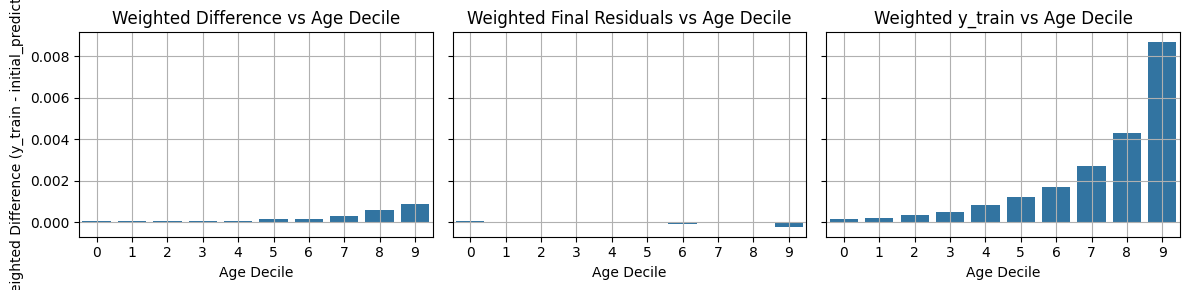

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:200: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby("decile").apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:203: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby("decile").apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:206: Deprecat

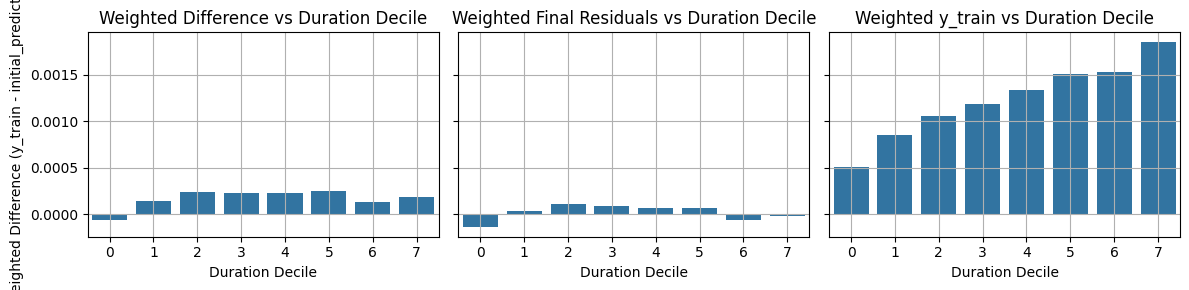

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:200: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby("decile").apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:203: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby("decile").apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:206: Deprecat

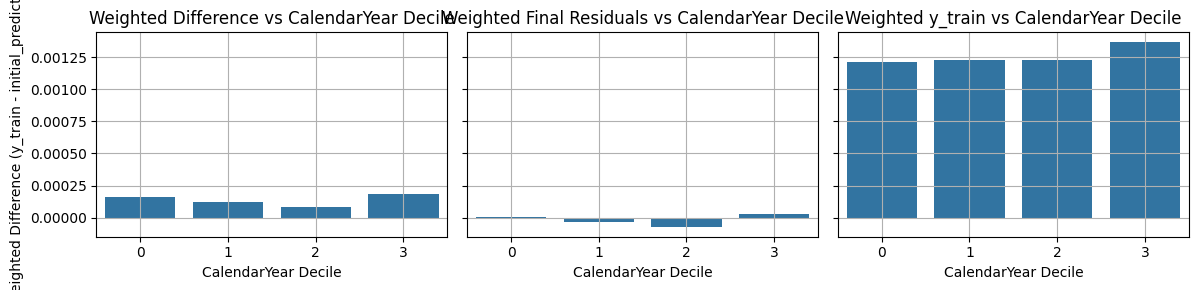

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:239: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:242: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:245: Deprecatio

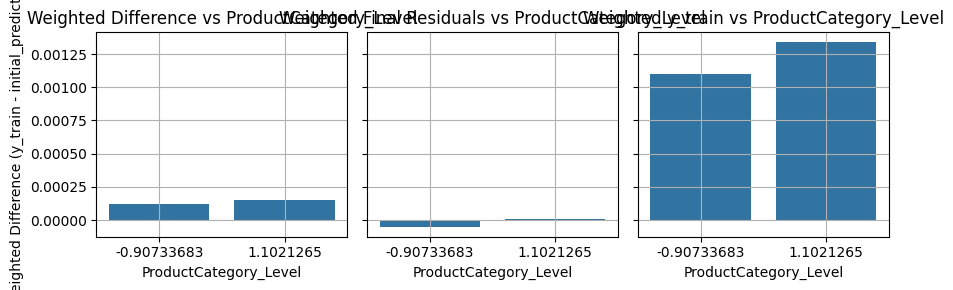

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:239: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:242: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:245: Deprecatio

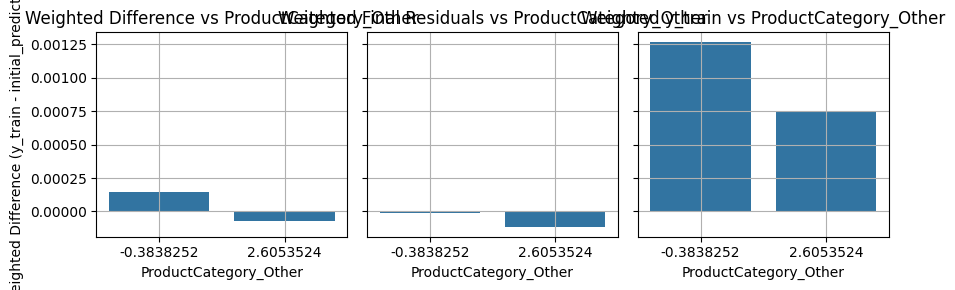

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:239: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:242: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:245: Deprecatio

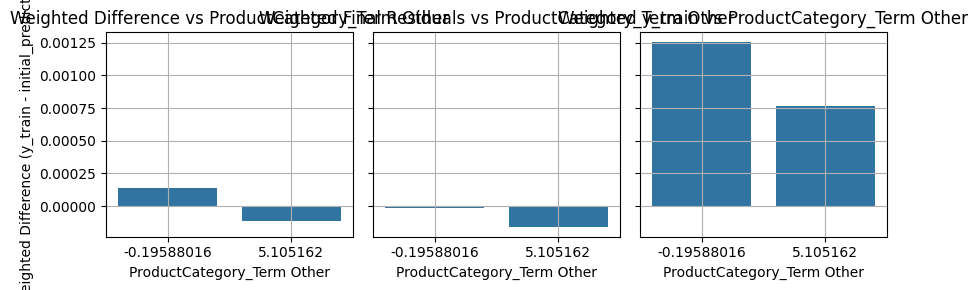

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:239: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:242: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:245: Deprecatio

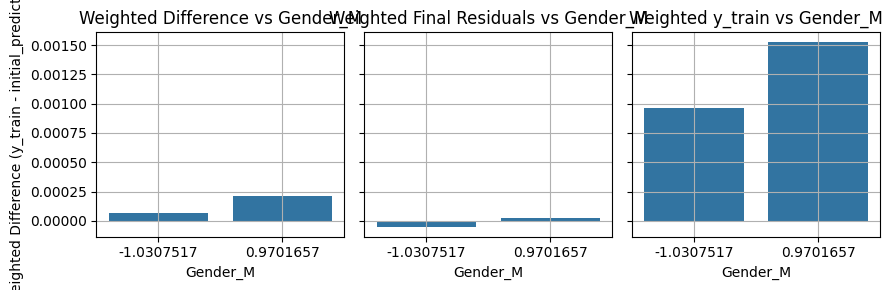

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:239: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:242: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:245: Deprecatio

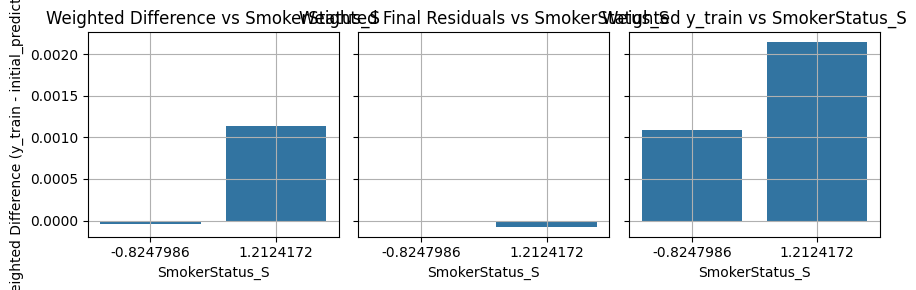

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:239: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:242: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:245: Deprecatio

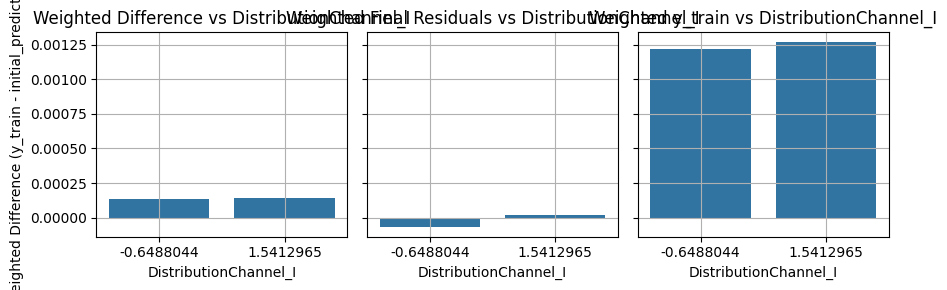

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:239: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:242: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:245: Deprecatio

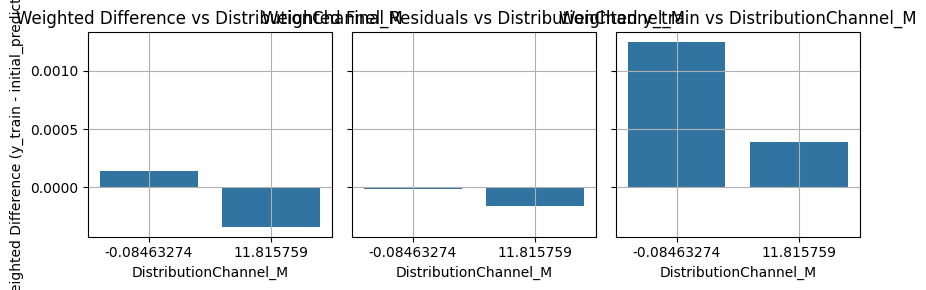

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:239: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:242: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:245: Deprecatio

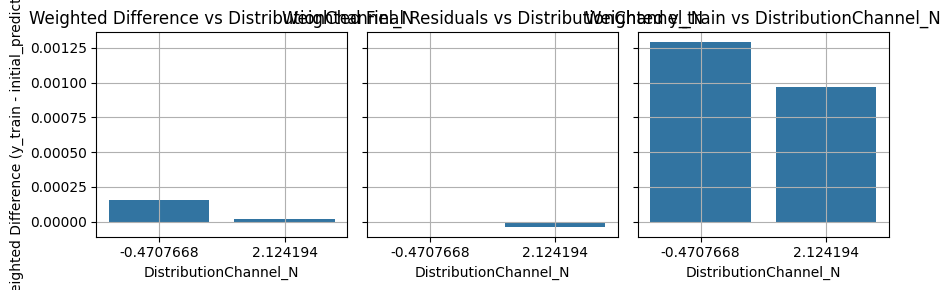

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:239: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:242: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:245: Deprecatio

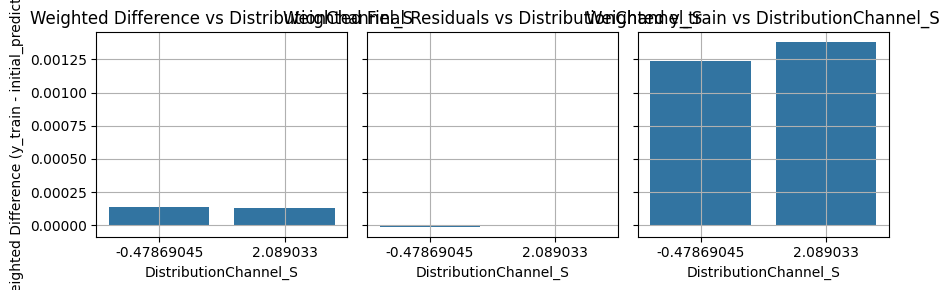

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:239: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:242: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:245: Deprecatio

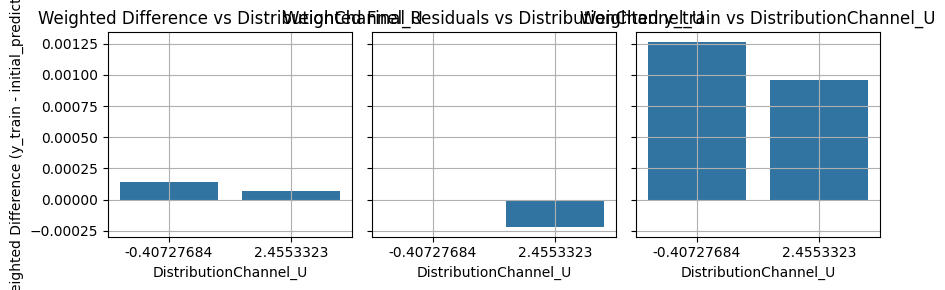

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:239: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:242: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:245: Deprecatio

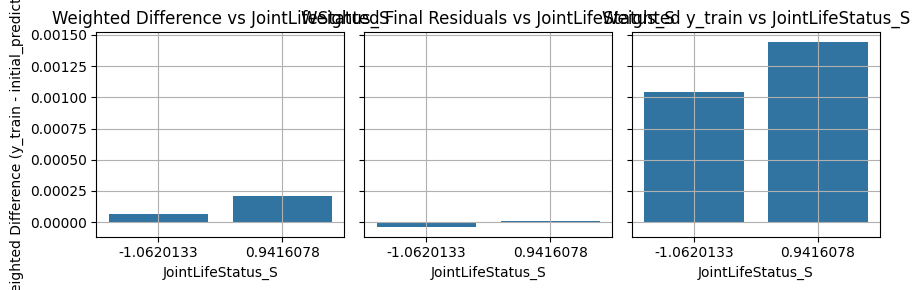

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:239: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:242: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:245: Deprecatio

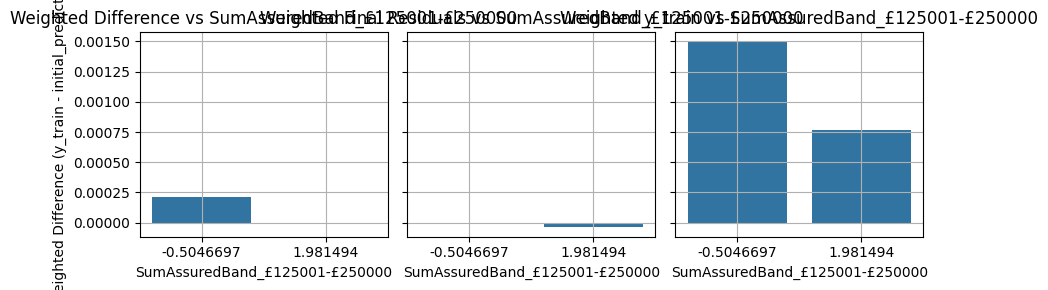

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:239: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:242: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:245: Deprecatio

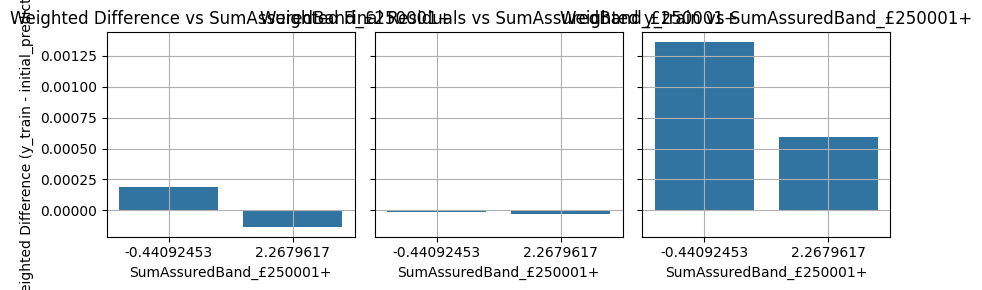

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:239: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:242: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:245: Deprecatio

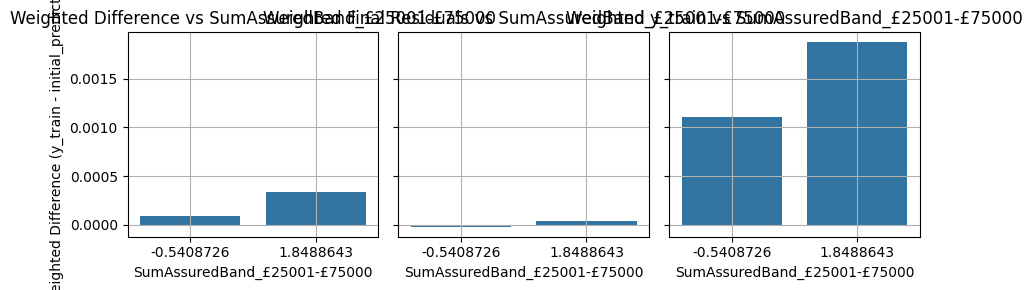

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:239: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:242: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:245: Deprecatio

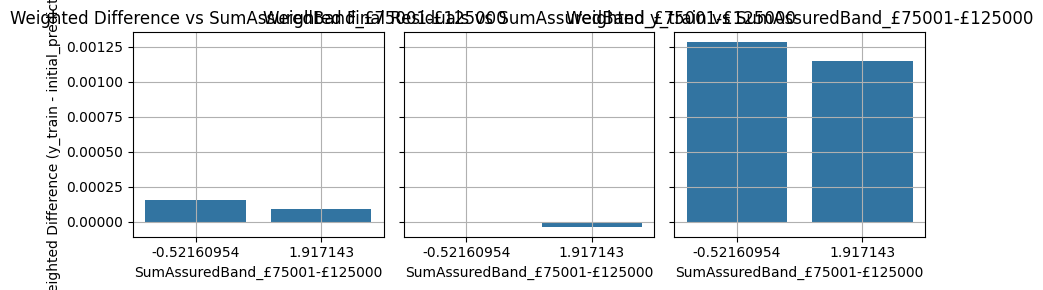

C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:239: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_init = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:242: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_final = df.groupby(feature).apply(
C:\Users\u013709\AppData\Local\Temp\ipykernel_26464\1853913224.py:245: Deprecatio

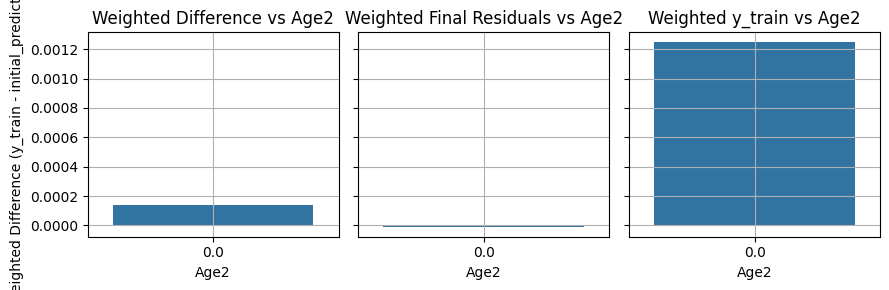

In [61]:
# Summary:
# 1. Define hyperparameters from the previuos fine-tuning.
# 2. Prepare the data by encoding, scaling, and splitting into training and test sets.
# 3. Initialize and train a Poisson regression model using the initial features.
# 4. Get predictions from the Poisson model and use them as initial predictions.
# 5. Prepare additional features for a second Poisson model.
# 6. Initialize and train the second Poisson model using the additional features and initial predictions.
# 7. Evaluate the second model on the test set and calculate the pseudo R-squared value.
# 8. Perform residual analysis by calculating differences between actual and predicted values.
# 9. Plot the residuals against each feature to visualize the model's performance.

other_best_params = {
    "lr": 0.3952587317305519,
    "weight_decay": 0.00031997696382000333,
    "num_epochs": 1064,
    "lambda_l1": 0.0017149814405403587,
    "age_cut": 86,
    "age_power": 3.325562014032768,
    "age_multiplier": 0,
    "saturated_r2": 0.2787781357765198,
}


age_cut = other_best_params["age_cut"]
age_power = other_best_params["age_power"]
weight_decay = other_best_params["weight_decay"]
num_epochs = other_best_params["num_epochs"]
lambda_l1 = other_best_params["lambda_l1"]
lr = other_best_params["lr"]
age_multiplier = other_best_params["age_multiplier"]

# Prepare the data
df = combined_df_encoded.copy()
exclude_features = []
df = df.drop(columns=exclude_features)
df["Age2"] = age_multiplier * np.maximum(df["Age"] - age_cut, 0) ** age_power
df["LivesExposure"] = df["LivesExposure"].clip(lower=1e-6)

train_df = df[df["holdout"] == 0]
test_df = df[df["holdout"] == 1]

train_lives_exposure = train_df["LivesExposure"]
test_lives_exposure = test_df["LivesExposure"]

X_train = train_df.drop(
    [
        "IncurredClaims",
        "LivesExposure",
        "Actual_deaths_lives",
        "holdout",
        "random_fold",
        "CommencementYear",
    ],
    axis=1,
)
y_train = train_df["IncurredClaims"]
X_test = test_df.drop(
    [
        "IncurredClaims",
        "LivesExposure",
        "Actual_deaths_lives",
        "holdout",
        "random_fold",
        "CommencementYear",
    ],
    axis=1,
)
y_test = test_df["IncurredClaims"]

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# Convert data to tensors
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)
lives_exposure_train_tensor = torch.tensor(
    train_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
)
lives_exposure_test_tensor = torch.tensor(
    test_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
)
X_train_initial = X_train_scaled[
    ["Age", "Age2", "Gender_M", "Duration", "CalendarYear"]
]
X_test_initial = X_test_scaled[["Age", "Age2", "Gender_M", "Duration", "CalendarYear"]]

# Convert to tensors
X_train_initial_tensor = torch.tensor(X_train_initial.values, dtype=torch.float32)
X_test_initial_tensor = torch.tensor(X_test_initial.values, dtype=torch.float32)


# Initialize and train the Poisson model
poisson_model = PoissonModel(len(X_train_initial.columns))
optimizer_poisson = optim.Adam(
    poisson_model.parameters(), lr=lr, weight_decay=weight_decay
)

for epoch in range(num_epochs):
    optimizer_poisson.zero_grad()
    poisson_outputs = poisson_model(X_train_initial_tensor, lives_exposure_train_tensor)
    poisson_loss = weighted_poisson_loss(
        poisson_outputs, y_train_tensor, lives_exposure_train_tensor
    )
    poisson_loss.backward()
    optimizer_poisson.step()

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}, Poisson Model Loss: {poisson_loss.item()}")

# Get predictions from the Poisson model
with torch.no_grad():
    poisson_outputs_train = poisson_model(
        X_train_initial_tensor, lives_exposure_train_tensor
    )
    initial_predictions = poisson_outputs_train.detach()


# Prepare features for the second model
features_except_age_sex = [
    f
    for f in X_train_scaled.columns
    if f not in ["Age", "Age2", "Gender_M", "Duration", "CalendarYear"]
]
X_train_second = X_train_scaled[features_except_age_sex]
X_test_second = X_test_scaled[features_except_age_sex]

X_train_second_tensor = torch.tensor(X_train_second.values, dtype=torch.float32)
X_test_second_tensor = torch.tensor(X_test_second.values, dtype=torch.float32)

# Initialize and train the second model
second_model = SecondPoissonModel(len(X_train_second.columns))
optimizer_second = optim.Adam(
    second_model.parameters(), lr=lr, weight_decay=weight_decay
)

for epoch in range(num_epochs):
    optimizer_second.zero_grad()
    second_outputs = second_model(
        X_train_second_tensor, lives_exposure_train_tensor, initial_predictions
    )
    second_loss = weighted_poisson_loss(
        second_outputs, y_train_tensor, lives_exposure_train_tensor
    )
    second_loss.backward()
    optimizer_second.step()

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}, Second Model Loss: {second_loss.item()}")

# Evaluation
second_model.eval()
with torch.no_grad():
    poisson_outputs_test = poisson_model(
        X_test_initial_tensor, lives_exposure_test_tensor
    )
    initial_predictions_test = poisson_outputs_test.detach()
    second_outputs = second_model(
        X_test_second_tensor, lives_exposure_test_tensor, initial_predictions_test
    )
    second_loss = weighted_poisson_loss(
        second_outputs, y_test_tensor, lives_exposure_test_tensor
    )

    y_pred = second_outputs
    y_test_tensor = y_test_tensor + 1e-8
    weighted_mean_target = torch.sum(
        y_test_tensor * lives_exposure_test_tensor
    ) / torch.sum(lives_exposure_test_tensor)
    null_deviance = 2 * torch.sum(
        lives_exposure_test_tensor
        * (
            y_test_tensor * torch.log(y_test_tensor / weighted_mean_target)
            - (y_test_tensor - weighted_mean_target)
        )
    )
    model_deviance = 2 * torch.sum(
        lives_exposure_test_tensor
        * (y_test_tensor * torch.log(y_test_tensor / y_pred) - (y_test_tensor - y_pred))
    )
    pseudo_r2 = 1 - (model_deviance / null_deviance)
    print(f"Pseudo R2: {pseudo_r2.item()}")

difference_init = (y_train_tensor - initial_predictions) / lives_exposure_train_tensor
second_model.eval()
with torch.no_grad():
    second_outputs_train = second_model(
        X_train_second_tensor, lives_exposure_train_tensor, initial_predictions
    )
difference_final = (y_train_tensor - second_outputs_train) / lives_exposure_train_tensor
difference_np = difference_init.detach().numpy().flatten()
difference_fn = difference_final.detach().numpy().flatten()
X_train_np = X_train_tensor.numpy()

# Convert tensors to DataFrame for easier manipulation
df = pd.DataFrame(X_train_np, columns=X_train.columns)
df["difference_init"] = difference_np
df["difference_final"] = difference_fn
df["exposure"] = lives_exposure_train_tensor.numpy().flatten()
df["y_train"] = (y_train_tensor / lives_exposure_train_tensor).numpy().flatten()

# Plot the difference against each feature
for feature in X_train.columns:
    if len(np.unique(df[feature])) > 2:  # Continuous feature
        # Calculate deciles
        df["decile"] = pd.qcut(df[feature], 10, labels=False, duplicates="drop")

        # Calculate weighted average for each decile
        weighted_avg_init = df.groupby("decile").apply(
            lambda x: np.average(x["difference_init"], weights=x["exposure"])
        )
        weighted_avg_final = df.groupby("decile").apply(
            lambda x: np.average(x["difference_final"], weights=x["exposure"])
        )
        weighted_avg_y_train = df.groupby("decile").apply(
            lambda x: np.average(x["y_train"], weights=x["exposure"])
        )

        fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=True)

        sns.barplot(x=weighted_avg_init.index, y=weighted_avg_init.values, ax=axes[0])
        axes[0].set_xlabel(f"{feature} Decile")
        axes[0].set_ylabel("Weighted Difference (y_train - initial_predictions)")
        axes[0].set_title(f"Weighted Difference vs {feature} Decile")
        axes[0].grid(True)

        sns.barplot(x=weighted_avg_final.index, y=weighted_avg_final.values, ax=axes[1])
        axes[1].set_xlabel(f"{feature} Decile")
        axes[1].set_ylabel("Weighted Final Residuals")
        axes[1].set_title(f"Weighted Final Residuals vs {feature} Decile")
        axes[1].grid(True)

        sns.barplot(
            x=weighted_avg_y_train.index, y=weighted_avg_y_train.values, ax=axes[2]
        )
        axes[2].set_xlabel(f"{feature} Decile")
        axes[2].set_ylabel("Weighted y_train")
        axes[2].set_title(f"Weighted y_train vs {feature} Decile")
        axes[2].grid(True)

        plt.tight_layout()
        plt.show()

    else:  # Categorical feature
        categories = np.unique(df[feature])

        # Calculate weighted average for each category
        weighted_avg_init = df.groupby(feature).apply(
            lambda x: np.average(x["difference_init"], weights=x["exposure"])
        )
        weighted_avg_final = df.groupby(feature).apply(
            lambda x: np.average(x["difference_final"], weights=x["exposure"])
        )
        weighted_avg_y_train = df.groupby(feature).apply(
            lambda x: np.average(x["y_train"], weights=x["exposure"])
        )

        fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

        sns.barplot(x=weighted_avg_init.index, y=weighted_avg_init.values, ax=axes[0])
        axes[0].set_xlabel(feature)
        axes[0].set_ylabel("Weighted Difference (y_train - initial_predictions)")
        axes[0].set_title(f"Weighted Difference vs {feature}")
        axes[0].grid(True)

        sns.barplot(x=weighted_avg_final.index, y=weighted_avg_final.values, ax=axes[1])
        axes[1].set_xlabel(feature)
        axes[1].set_ylabel("Weighted Final Residuals")
        axes[1].set_title(f"Weighted Final Residuals vs {feature}")
        axes[1].grid(True)

        sns.barplot(
            x=weighted_avg_y_train.index, y=weighted_avg_y_train.values, ax=axes[2]
        )
        axes[2].set_xlabel(feature)
        axes[2].set_ylabel("Weighted y_train")
        axes[2].set_title(f"Weighted y_train vs {feature}")
        axes[2].grid(True)

        plt.tight_layout()
        plt.show()